# STDP-Based Visual Feature Learning

This code is based on this research paper:
http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.0030031&type=printable


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Simulate the S1 cells in the retina

These cells are purposefully designed to trigger if there is a vertical, horizontal or diagonal edge.

Assume that:
* We are given a 3x3 or 5x5 sample (size doesn't matter, but let's assume it's small to only contain a single 'edge')
* For now we will iterate over the image rather than do any clever manipulation using complex vectors or linear algebra (which can probably be done!)
* We will go with vertical, horizontal and diagonal (-45'c and +45'c) edges
* Assume all images are grey-scale which pixels in the range 0-255

In [14]:
def s1(image_subsample):
    gradients = np.gradient(image_subsample)
    gx = gradients[0]
    gy = gradients[1]
    print ('gradients: {}/{}'.format(gx, gy))
    angles = (np.arctan2(gy,gx) * 180 / np.pi)
    #min_g = np.min(angles)
    #max_g = np.max(angles)
    #angle = [max_g if abs(max_g > abs(min_g)) else min_g][0]
    angle = np.mean(angles)
    # Create output vector
    #print (angle)
    output = np.zeros(8)
    quadrant = int((angle - 22.5) / 45) + 4
    output[quadrant] = 1
    print ('Angle={}'.format(angle))
    return output

* Load the image

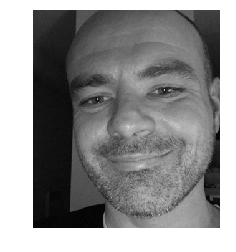

In [3]:
img = cv2.imread('./images/IMG_0827_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

### Process the image 1 stride at a time

* Transpose so that the array is in (x,y) format

(300, 350)


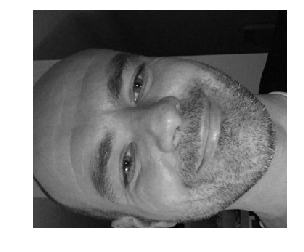

In [4]:
face = np.transpose(img)
print (face.shape)
plt.axis("off")
plt.imshow(face, cmap="gray")
plt.show()

In [5]:
size_x = face.shape[1]
size_y = face.shape[0]
print ('Image dimensions={},{}'.format(size_x, size_y))

Image dimensions=350,300


* Set up convolutions

In [6]:
stride = 5


--------------------------------------------------
gradients: [[ 254.   253.   253.   253.   254. ]
 [   0.   127.   126.5  126.5  126.5]
 [   2.5    1.5    0.5    0.5    0. ]
 [   0.5    0.     0.     0.     0. ]
 [ 254.   254.   255.   255.   255. ]]/[[   1.     0.5  127.5  127.   255. ]
 [   0.     0.   127.5  127.5    0. ]
 [ 255.   127.   127.   127.   255. ]
 [ 254.   126.   126.5  127.   255. ]
 [ 254.   126.5  127.   127.   255. ]]
Angle=50.27706605706066


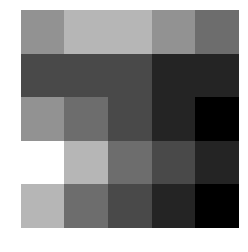

Kernel at coords 0,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.     0.     0.   255. ]
 [   2.5    1.5    0.5    0.5    0. ]
 [   0.5    0.     0.     0.     0. ]
 [ 125.5  126.5  127.   127.5    0. ]
 [ 253.   255.   255.     0.     1. ]]/[[   0.     0.   127.5  127.5    0. ]
 [ 255.   127.   127.   127.   255. ]
 [ 254.   126.   126.5  127.   255. ]
 [ 254.   126.5  127.   127.   255. ]
 [   0.   127.5  127.5    0.     0. ]]
Angle=56.79685942143399


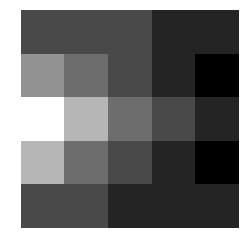

Kernel at coords 1,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.     1.     1.     1. ]
 [   0.5    0.     0.     0.     0. ]
 [ 125.5  126.5  127.   127.5    0. ]
 [ 126.     0.     0.5    0.5    2. ]
 [ 255.     1.     2.     1.     3. ]]/[[ 255.   127.   127.   127.   255. ]
 [ 254.   126.   126.5  127.   255. ]
 [ 254.   126.5  127.   127.   255. ]
 [   0.   127.5  127.5    0.     0. ]
 [   2.     1.   127.5    0.5    2. ]]
Angle=62.41435269649989


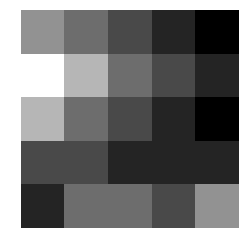

Kernel at coords 2,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   255.   255.   255. ]
 [ 125.5  126.5  127.   127.5    0. ]
 [ 126.     0.     0.5    0.5    2. ]
 [ 127.5    0.5    1.5    1.     1.5]
 [   0.     0.     1.     1.     0. ]]/[[ 254.   126.   126.5  127.   255. ]
 [ 254.   126.5  127.   127.   255. ]
 [   0.   127.5  127.5    0.     0. ]
 [   2.     1.   127.5    0.5    2. ]
 [   2.     1.5    0.     0.     1. ]]
Angle=45.63872811905178


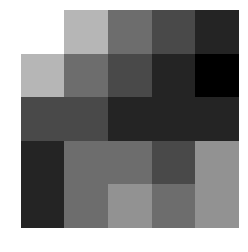

Kernel at coords 3,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   255.   255.     0.     1. ]
 [ 126.     0.     0.5    0.5    2. ]
 [ 127.5    0.5    1.5    1.     1.5]
 [   2.5    1.     1.     0.   125. ]
 [   5.     2.     1.   255.   250. ]]/[[ 254.   126.5  127.   127.   255. ]
 [   0.   127.5  127.5    0.     0. ]
 [   2.     1.   127.5    0.5    2. ]
 [   2.     1.5    0.     0.     1. ]
 [ 255.   127.5  126.5  124.5  252. ]]
Angle=45.00332904741948


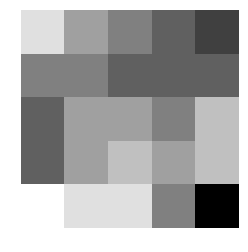

Kernel at coords 4,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     2.     1.     3. ]
 [ 127.5    0.5    1.5    1.     1.5]
 [   2.5    1.     1.     0.   125. ]
 [   2.     0.5    0.5    0.5  127. ]
 [ 255.   255.     0.     2.     4. ]]/[[   0.   127.5  127.5    0.     0. ]
 [   2.     1.   127.5    0.5    2. ]
 [   2.     1.5    0.     0.     1. ]
 [ 255.   127.5  126.5  124.5  252. ]
 [ 255.     0.     0.   126.5  254. ]]
Angle=46.10998029690332


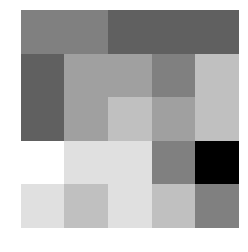

Kernel at coords 5,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     1.     1.     0. ]
 [   2.5    1.     1.     0.   125. ]
 [   2.     0.5    0.5    0.5  127. ]
 [ 127.5    0.     0.5    2.5    4. ]
 [   0.     1.     1.     3.     4. ]]/[[   2.     1.   127.5    0.5    2. ]
 [   2.     1.5    0.     0.     1. ]
 [ 255.   127.5  126.5  124.5  252. ]
 [ 255.     0.     0.   126.5  254. ]
 [   0.     0.5    1.     0.   255. ]]
Angle=52.22933663630924


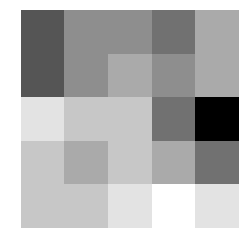

Kernel at coords 6,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     2.     1.   255.   250. ]
 [   2.     0.5    0.5    0.5  127. ]
 [ 127.5    0.     0.5    2.5    4. ]
 [ 127.   127.5  127.5    0.5    2. ]
 [ 254.   254.   254.   254.     0. ]]/[[   2.     1.5    0.     0.     1. ]
 [ 255.   127.5  126.5  124.5  252. ]
 [ 255.     0.     0.   126.5  254. ]
 [   0.     0.5    1.     0.   255. ]
 [   0.     0.5    1.     1.     1. ]]
Angle=36.1284951602246


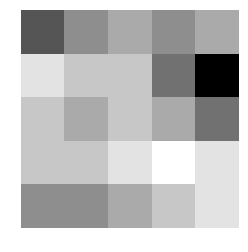

Kernel at coords 7,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     0.     2.     4. ]
 [ 127.5    0.     0.5    2.5    4. ]
 [ 127.   127.5  127.5    0.5    2. ]
 [   0.5    0.5  127.5  127.5    1. ]
 [   3.     3.     1.     1.     2. ]]/[[ 255.   127.5  126.5  124.5  252. ]
 [ 255.     0.     0.   126.5  254. ]
 [   0.     0.5    1.     0.   255. ]
 [   0.     0.5    1.     1.     1. ]
 [   0.   127.5    0.     1.5    2. ]]
Angle=38.0888542167261


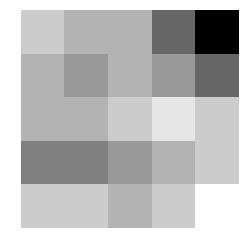

Kernel at coords 8,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     1.     3.     4. ]
 [ 127.   127.5  127.5    0.5    2. ]
 [   0.5    0.5  127.5  127.5    1. ]
 [ 127.5  127.   126.   125.5  126. ]
 [ 252.   251.   251.   250.   250. ]]/[[ 255.     0.     0.   126.5  254. ]
 [   0.     0.5    1.     0.   255. ]
 [   0.     0.5    1.     1.     1. ]
 [   0.   127.5    0.     1.5    2. ]
 [ 255.   127.   127.5    1.     2. ]]
Angle=23.814535644509046


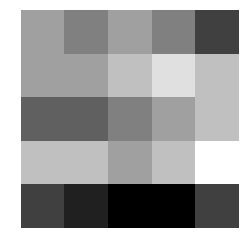

Kernel at coords 9,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   254.   254.     0. ]
 [   0.5    0.5  127.5  127.5    1. ]
 [ 127.5  127.   126.   125.5  126. ]
 [ 125.5  125.5  125.5  125.   125. ]
 [ 255.     0.     0.     0.     0. ]]/[[   0.     0.5    1.     0.   255. ]
 [   0.     0.5    1.     1.     1. ]
 [   0.   127.5    0.     1.5    2. ]
 [ 255.   127.   127.5    1.     2. ]
 [   0.   127.5  127.5    1.     2. ]]
Angle=29.75630797527797


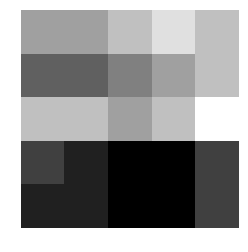

Kernel at coords 10,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.     1.     1.     2. ]
 [ 127.5  127.   126.   125.5  126. ]
 [ 125.5  125.5  125.5  125.   125. ]
 [ 127.5    1.     1.     1.     1. ]
 [   0.     2.     2.     2.     2. ]]/[[   0.     0.5    1.     1.     1. ]
 [   0.   127.5    0.     1.5    2. ]
 [ 255.   127.   127.5    1.     2. ]
 [   0.   127.5  127.5    1.     2. ]
 [   2.     0.5  127.5    1.     2. ]]
Angle=35.23747180911652


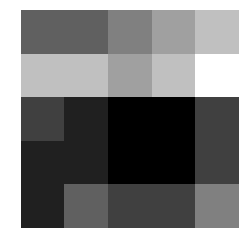

Kernel at coords 11,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   251.   251.   250.   250. ]
 [ 125.5  125.5  125.5  125.   125. ]
 [ 127.5    1.     1.     1.     1. ]
 [   0.     1.     1.5    0.5  127.5]
 [   0.     0.     1.   255.   253. ]]/[[   0.   127.5    0.     1.5    2. ]
 [ 255.   127.   127.5    1.     2. ]
 [   0.   127.5  127.5    1.     2. ]
 [   2.     0.5  127.5    1.     2. ]
 [   2.     1.   127.   127.     0. ]]
Angle=41.49919782932825


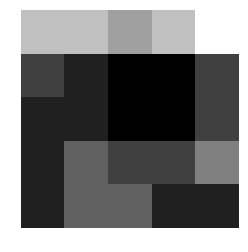

Kernel at coords 12,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     0.     0.     0. ]
 [ 127.5    1.     1.     1.     1. ]
 [   0.     1.     1.5    0.5  127.5]
 [   2.     0.5    1.     1.   127.5]
 [   4.     1.     1.     3.     2. ]]/[[ 255.   127.   127.5    1.     2. ]
 [   0.   127.5  127.5    1.     2. ]
 [   2.     0.5  127.5    1.     2. ]
 [   2.     1.   127.   127.     0. ]
 [ 255.   127.5    0.   127.5  255. ]]
Angle=64.28592874317017


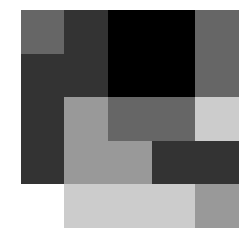

Kernel at coords 13,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     2.     2.     2.     2. ]
 [   0.     1.     1.5    0.5  127.5]
 [   2.     0.5    1.     1.   127.5]
 [   2.5    0.     0.     2.     2. ]
 [   1.   255.   255.     1.     2. ]]/[[   0.   127.5  127.5    1.     2. ]
 [   2.     0.5  127.5    1.     2. ]
 [   2.     1.   127.   127.     0. ]
 [ 255.   127.5    0.   127.5  255. ]
 [ 253.   126.5    1.     1.     0. ]]
Angle=53.07993942845389


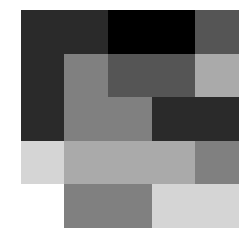

Kernel at coords 14,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     1.   255.   253. ]
 [   2.     0.5    1.     1.   127.5]
 [   2.5    0.     0.     2.     2. ]
 [   0.     0.     0.     0.5    0.5]
 [ 255.     1.     1.     0.   255. ]]/[[   2.     0.5  127.5    1.     2. ]
 [   2.     1.   127.   127.     0. ]
 [ 255.   127.5    0.   127.5  255. ]
 [ 253.   126.5    1.     1.     0. ]
 [ 255.   127.5    0.5    0.   255. ]]
Angle=58.21607136954019


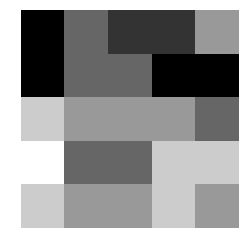

Kernel at coords 15,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     1.     1.     3.     2. ]
 [   2.5    0.     0.     2.     2. ]
 [   0.     0.     0.     0.5    0.5]
 [ 127.5    2.     1.5  127.   126. ]
 [   0.     3.     2.   254.   253. ]]/[[   2.     1.   127.   127.     0. ]
 [ 255.   127.5    0.   127.5  255. ]
 [ 253.   126.5    1.     1.     0. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   2.     0.5  126.   125.5  254. ]]
Angle=57.43688038553114


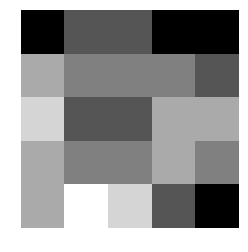

Kernel at coords 16,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   255.     1.     2. ]
 [   0.     0.     0.     0.5    0.5]
 [ 127.5    2.     1.5  127.   126. ]
 [ 126.5    0.5    0.5  126.5  126. ]
 [ 253.   254.   255.   255.   255. ]]/[[ 255.   127.5    0.   127.5  255. ]
 [ 253.   126.5    1.     1.     0. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   2.     0.5  126.   125.5  254. ]
 [   3.     1.5  126.5  125.5  254. ]]
Angle=48.24457382064328


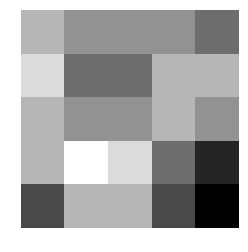

Kernel at coords 17,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     1.     0.   255. ]
 [ 127.5    2.     1.5  127.   126. ]
 [ 126.5    0.5    0.5  126.5  126. ]
 [ 126.5  126.   126.5    0.     1. ]
 [   0.   254.   254.     1.     3. ]]/[[ 253.   126.5    1.     1.     0. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   2.     0.5  126.   125.5  254. ]
 [   3.     1.5  126.5  125.5  254. ]
 [   1.     0.5    0.     0.     0. ]]
Angle=42.599699807393954


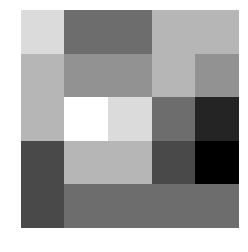

Kernel at coords 18,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     3.     2.   254.   253. ]
 [ 126.5    0.5    0.5  126.5  126. ]
 [ 126.5  126.   126.5    0.     1. ]
 [   3.     0.   127.5    1.5    2.5]
 [   6.     2.     1.     2.     2. ]]/[[ 255.   127.5    0.5    0.   255. ]
 [   2.     0.5  126.   125.5  254. ]
 [   3.     1.5  126.5  125.5  254. ]
 [   1.     0.5    0.     0.     0. ]
 [ 253.   126.     0.     0.5    0. ]]
Angle=40.35995924272042


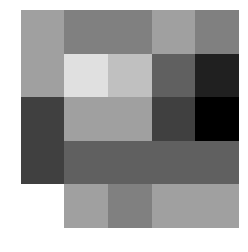

Kernel at coords 19,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   254.   255.   255.   255. ]
 [ 126.5  126.   126.5    0.     1. ]
 [   3.     0.   127.5    1.5    2.5]
 [   1.     1.     1.     1.     1.5]
 [ 252.     0.     1.     0.     1. ]]/[[   2.     0.5  126.   125.5  254. ]
 [   3.     1.5  126.5  125.5  254. ]
 [   1.     0.5    0.     0.     0. ]
 [ 253.   126.     0.     0.5    0. ]
 [   1.     0.5    0.     0.5    1. ]]
Angle=34.572542433999935


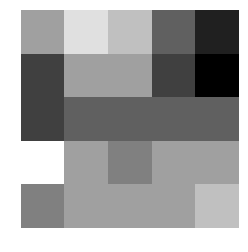

Kernel at coords 20,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   254.   254.     1.     3. ]
 [   3.     0.   127.5    1.5    2.5]
 [   1.     1.     1.     1.     1.5]
 [ 125.5  127.5  127.5  127.   127.5]
 [ 255.   255.   254.   254.   254. ]]/[[   3.     1.5  126.5  125.5  254. ]
 [   1.     0.5    0.     0.     0. ]
 [ 253.   126.     0.     0.5    0. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.     0.   127.5    0.5    1. ]]
Angle=25.542924873785672


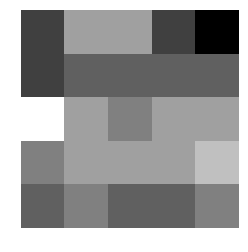

Kernel at coords 21,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     2.     1.     2.     2. ]
 [   1.     1.     1.     1.     1.5]
 [ 125.5  127.5  127.5  127.   127.5]
 [   0.5    0.     0.     0.     0. ]
 [   2.     1.     2.     2.     2. ]]/[[   1.     0.5    0.     0.     0. ]
 [ 253.   126.     0.     0.5    0. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.     0.   127.5    0.5    1. ]
 [   0.     0.     0.     0.5    1. ]]
Angle=24.190993516759512


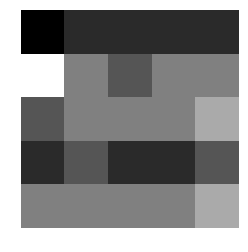

Kernel at coords 22,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     0.     1.     0.     1. ]
 [ 125.5  127.5  127.5  127.   127.5]
 [   0.5    0.     0.     0.     0. ]
 [   0.     0.     1.     1.     0.5]
 [ 254.   255.     0.     0.   255. ]]/[[ 253.   126.     0.     0.5    0. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.     0.   127.5    0.5    1. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     1.     0.5    0.     0. ]]
Angle=29.614193097003444


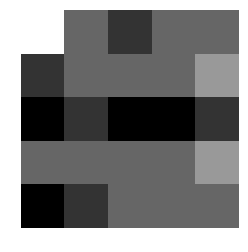

Kernel at coords 23,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.   254.   254.   254. ]
 [   0.5    0.     0.     0.     0. ]
 [   0.     0.     1.     1.     0.5]
 [   0.     0.5    1.     0.5    0.5]
 [   2.     2.     2.     1.     2. ]]/[[   1.     0.5    0.     0.5    1. ]
 [   1.     0.   127.5    0.5    1. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     1.     0.5    0.     0. ]
 [   1.     1.     0.     0.     1. ]]
Angle=27.35221978588051


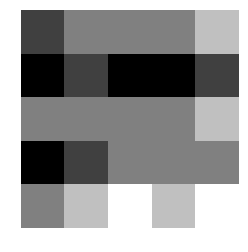

Kernel at coords 24,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.     2.     2.     2. ]
 [   0.     0.     1.     1.     0.5]
 [   0.     0.5    1.     0.5    0.5]
 [ 127.5  127.5  127.   127.   127.5]
 [ 253.   253.   252.   253.   253. ]]/[[   1.     0.   127.5    0.5    1. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     1.     0.5    0.     0. ]
 [   1.     1.     0.     0.     1. ]
 [   1.     0.5    0.     0.5    1. ]]
Angle=17.131806579559523


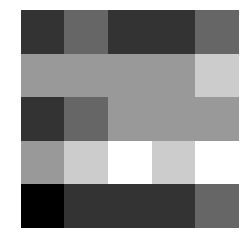

Kernel at coords 25,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.     0.     0.   255. ]
 [   0.     0.5    1.     0.5    0.5]
 [ 127.5  127.5  127.   127.   127.5]
 [ 127.   127.5  127.   127.5  127. ]
 [   1.     2.     2.     2.     1. ]]/[[ 0.   0.   0.   0.5  1. ]
 [ 1.   1.   0.5  0.   0. ]
 [ 1.   1.   0.   0.   1. ]
 [ 1.   0.5  0.   0.5  1. ]
 [ 2.   1.   0.   0.   0. ]]
Angle=14.516977999142878


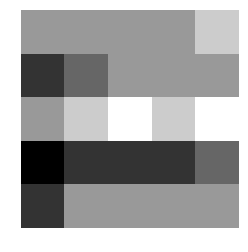

Kernel at coords 26,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     2.     1.     2. ]
 [ 127.5  127.5  127.   127.   127.5]
 [ 127.   127.5  127.   127.5  127. ]
 [   0.     1.     1.5    2.     1. ]
 [ 255.     0.     1.     2.     1. ]]/[[   1.     1.     0.5    0.     0. ]
 [   1.     1.     0.     0.     1. ]
 [   1.     0.5    0.     0.5    1. ]
 [   2.     1.     0.     0.     0. ]
 [   3.     2.     1.     0.   255. ]]
Angle=17.2126182535756


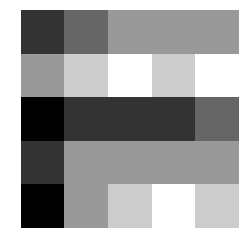

Kernel at coords 27,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   253.   252.   253.   253. ]
 [ 127.   127.5  127.   127.5  127. ]
 [   0.     1.     1.5    2.     1. ]
 [   1.   127.     0.     1.   127. ]
 [   3.   254.   255.     0.   253. ]]/[[   1.     1.     0.     0.     1. ]
 [   1.     0.5    0.     0.5    1. ]
 [   2.     1.     0.     0.     0. ]
 [   3.     2.     1.     0.   255. ]
 [ 254.     0.     2.   127.   252. ]]
Angle=23.507297445749877


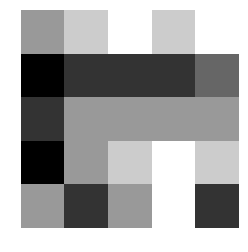

Kernel at coords 28,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     2.     2.     2.     1. ]
 [   0.     1.     1.5    2.     1. ]
 [   1.   127.     0.     1.   127. ]
 [   3.     0.5  127.   127.   127. ]
 [   3.     3.   255.   254.     1. ]]/[[   1.     0.5    0.     0.5    1. ]
 [   2.     1.     0.     0.     0. ]
 [   3.     2.     1.     0.   255. ]
 [ 254.     0.     2.   127.   252. ]
 [ 254.   126.   127.5    0.   255. ]]
Angle=38.87373106301627


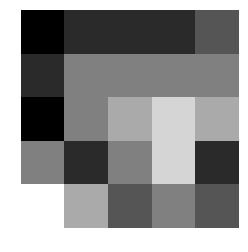

Kernel at coords 29,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     1.     2.     1. ]
 [   1.   127.     0.     1.   127. ]
 [   3.     0.5  127.   127.   127. ]
 [ 127.5    0.5  126.5  126.5    2.5]
 [ 252.   254.   254.   255.     4. ]]/[[   2.     1.     0.     0.     0. ]
 [   3.     2.     1.     0.   255. ]
 [ 254.     0.     2.   127.   252. ]
 [ 254.   126.   127.5    0.   255. ]
 [   0.   127.     0.     3.     4. ]]
Angle=34.9976318711256


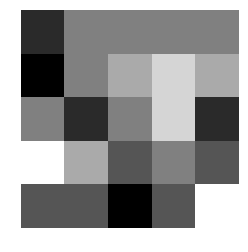

Kernel at coords 30,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.   254.   255.     0.   253. ]
 [   3.     0.5  127.   127.   127. ]
 [ 127.5    0.5  126.5  126.5    2.5]
 [ 125.   126.   126.5  127.5    2. ]
 [ 254.   254.   255.     0.     0. ]]/[[   3.     2.     1.     0.   255. ]
 [ 254.     0.     2.   127.   252. ]
 [ 254.   126.   127.5    0.   255. ]
 [   0.   127.     0.     3.     4. ]
 [   0.   127.5    1.     3.5    4. ]]
Angle=35.76203078819522


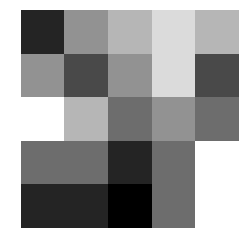

Kernel at coords 31,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.   255.   254.     1. ]
 [ 127.5    0.5  126.5  126.5    2.5]
 [ 125.   126.   126.5  127.5    2. ]
 [ 126.5  125.5  127.   127.5  126. ]
 [ 255.   253.   255.   255.   252. ]]/[[ 254.     0.     2.   127.   252. ]
 [ 254.   126.   127.5    0.   255. ]
 [   0.   127.     0.     3.     4. ]
 [   0.   127.5    1.     3.5    4. ]
 [ 254.   127.5    2.     2.     1. ]]
Angle=29.038209188972395


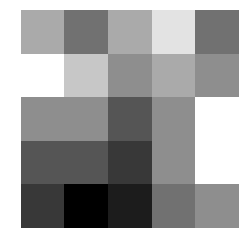

Kernel at coords 32,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   254.   254.   255.     4. ]
 [ 125.   126.   126.5  127.5    2. ]
 [ 126.5  125.5  127.   127.5  126. ]
 [   1.   127.5    0.5  127.5  125. ]
 [   3.     2.     2.     0.   254. ]]/[[ 254.   126.   127.5    0.   255. ]
 [   0.   127.     0.     3.     4. ]
 [   0.   127.5    1.     3.5    4. ]
 [ 254.   127.5    2.     2.     1. ]
 [ 253.   127.     1.     0.   255. ]]
Angle=32.354505870875194


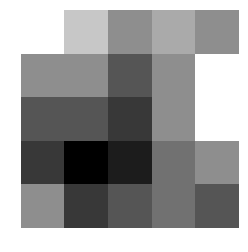

Kernel at coords 33,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   255.     0.     0. ]
 [ 126.5  125.5  127.   127.5  126. ]
 [   1.   127.5    0.5  127.5  125. ]
 [   4.     4.     2.5    0.   127. ]
 [   5.     6.     3.     0.     0. ]]/[[   0.   127.     0.     3.     4. ]
 [   0.   127.5    1.     3.5    4. ]
 [ 254.   127.5    2.     2.     1. ]
 [ 253.   127.     1.     0.   255. ]
 [ 254.   126.   126.   126.5  255. ]]
Angle=47.01414515090022


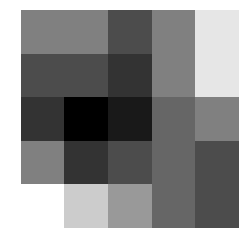

Kernel at coords 34,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   253.   255.   255.   252. ]
 [   1.   127.5    0.5  127.5  125. ]
 [   4.     4.     2.5    0.   127. ]
 [ 127.5    2.     0.   126.5    0.5]
 [ 250.   254.   253.   253.     1. ]]/[[   0.   127.5    1.     3.5    4. ]
 [ 254.   127.5    2.     2.     1. ]
 [ 253.   127.     1.     0.   255. ]
 [ 254.   126.   126.   126.5  255. ]
 [   2.   127.5  125.5    0.5    3. ]]
Angle=40.235064930129475


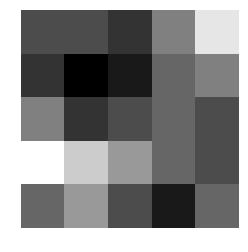

Kernel at coords 35,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.     2.     0.   254. ]
 [   4.     4.     2.5    0.   127. ]
 [ 127.5    2.     0.   126.5    0.5]
 [ 125.5  124.5  125.5    0.     0. ]
 [   1.   251.   254.     3.   255. ]]/[[ 254.   127.5    2.     2.     1. ]
 [ 253.   127.     1.     0.   255. ]
 [ 254.   126.   126.   126.5  255. ]
 [   2.   127.5  125.5    0.5    3. ]
 [ 252.   126.     1.5    1.   255. ]]
Angle=56.21548317394328


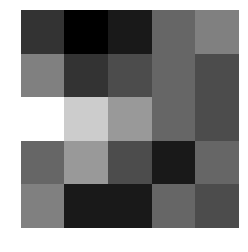

Kernel at coords 36,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     6.     3.     0.     0. ]
 [ 127.5    2.     0.   126.5    0.5]
 [ 125.5  124.5  125.5    0.     0. ]
 [   1.5  126.5  127.   127.5  126.5]
 [   2.     2.     0.   252.   254. ]]/[[ 253.   127.     1.     0.   255. ]
 [ 254.   126.   126.   126.5  255. ]
 [   2.   127.5  125.5    0.5    3. ]
 [ 252.   126.     1.5    1.   255. ]
 [ 252.   125.   126.5    0.     1. ]]
Angle=56.066270543515536


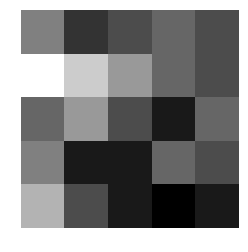

Kernel at coords 37,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 250.   254.   253.   253.     1. ]
 [ 125.5  124.5  125.5    0.     0. ]
 [   1.5  126.5  127.   127.5  126.5]
 [ 126.5    0.5    0.5  126.5    0. ]
 [ 251.   255.     1.     1.     2. ]]/[[ 254.   126.   126.   126.5  255. ]
 [   2.   127.5  125.5    0.5    3. ]
 [ 252.   126.     1.5    1.   255. ]
 [ 252.   125.   126.5    0.     1. ]
 [   0.     0.   127.5    0.5    2. ]]
Angle=47.181580003039144


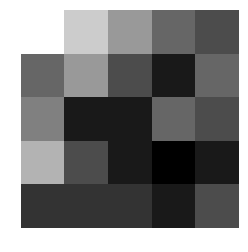

Kernel at coords 38,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   251.   254.     3.   255. ]
 [   1.5  126.5  127.   127.5  126.5]
 [ 126.5    0.5    0.5  126.5    0. ]
 [ 127.5    1.     1.5    0.5  126.5]
 [   4.     3.     2.     0.   251. ]]/[[   2.   127.5  125.5    0.5    3. ]
 [ 252.   126.     1.5    1.   255. ]
 [ 252.   125.   126.5    0.     1. ]
 [   0.     0.   127.5    0.5    2. ]
 [ 255.   127.   126.   125.   253. ]]
Angle=47.85067912149779


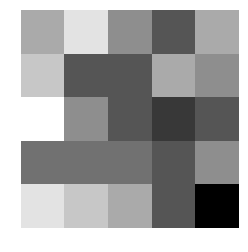

Kernel at coords 39,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     0.   252.   254. ]
 [ 126.5    0.5    0.5  126.5    0. ]
 [ 127.5    1.     1.5    0.5  126.5]
 [   0.5    0.     0.5    1.5  127. ]
 [ 253.   253.   255.     3.     3. ]]/[[ 252.   126.     1.5    1.   255. ]
 [ 252.   125.   126.5    0.     1. ]
 [   0.     0.   127.5    0.5    2. ]
 [ 255.   127.   126.   125.   253. ]
 [ 255.     0.     1.   127.   253. ]]
Angle=57.1132368952787


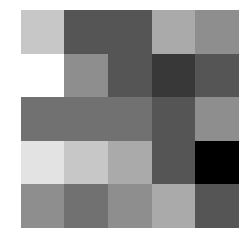

Kernel at coords 40,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   255.     1.     1.     2. ]
 [ 127.5    1.     1.5    0.5  126.5]
 [   0.5    0.     0.5    1.5  127. ]
 [   0.   126.   125.5    0.     2. ]
 [   3.   255.   252.   253.     1. ]]/[[ 252.   125.   126.5    0.     1. ]
 [   0.     0.   127.5    0.5    2. ]
 [ 255.   127.   126.   125.   253. ]
 [ 255.     0.     1.   127.   253. ]
 [ 251.   124.5    0.     1.5    1. ]]
Angle=47.02282796446843


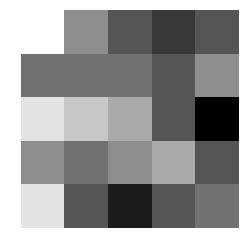

Kernel at coords 41,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     3.     2.     0.   251. ]
 [   0.5    0.     0.5    1.5  127. ]
 [   0.   126.   125.5    0.     2. ]
 [   1.5    0.5  127.5  127.     0.5]
 [   0.     2.     3.     1.     0. ]]/[[   0.     0.   127.5    0.5    2. ]
 [ 255.   127.   126.   125.   253. ]
 [ 255.     0.     1.   127.   253. ]
 [ 251.   124.5    0.     1.5    1. ]
 [ 253.   126.   127.5    0.     0. ]]
Angle=55.3264213635092


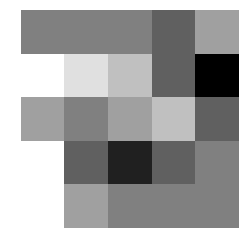

Kernel at coords 42,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   253.   255.     3.     3. ]
 [   0.   126.   125.5    0.     2. ]
 [   1.5    0.5  127.5  127.     0.5]
 [ 125.5    0.5    1.   126.5  125. ]
 [ 251.   255.   255.   252.   250. ]]/[[ 255.   127.   126.   125.   253. ]
 [ 255.     0.     1.   127.   253. ]
 [ 251.   124.5    0.     1.5    1. ]
 [ 253.   126.   127.5    0.     0. ]
 [   1.     0.   126.   125.5  254. ]]
Angle=45.24223839639844


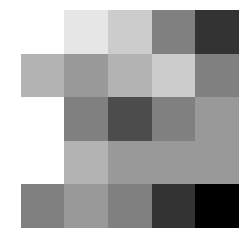

Kernel at coords 43,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.   255.   252.   253.     1. ]
 [   1.5    0.5  127.5  127.     0.5]
 [ 125.5    0.5    1.   126.5  125. ]
 [ 127.   127.5  127.5  127.   126. ]
 [   3.     0.     0.     2.     2. ]]/[[ 255.     0.     1.   127.   253. ]
 [ 251.   124.5    0.     1.5    1. ]
 [ 253.   126.   127.5    0.     0. ]
 [   1.     0.   126.   125.5  254. ]
 [ 254.   126.5  127.   126.5  254. ]]
Angle=51.752602488096656


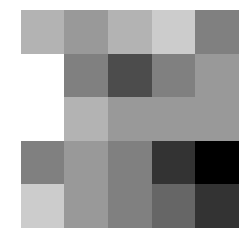

Kernel at coords 44,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     2.     3.     1.     0. ]
 [ 125.5    0.5    1.   126.5  125. ]
 [ 127.   127.5  127.5  127.   126. ]
 [ 127.   126.5    0.     2.5    1. ]
 [ 251.   253.     0.     3.     0. ]]/[[ 251.   124.5    0.     1.5    1. ]
 [ 253.   126.   127.5    0.     0. ]
 [   1.     0.   126.   125.5  254. ]
 [ 254.   126.5  127.   126.5  254. ]
 [   0.     1.     2.   126.5  251. ]]
Angle=54.706473337593145


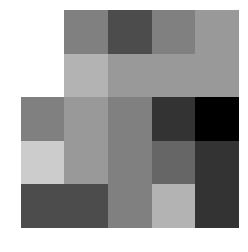

Kernel at coords 45,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   255.   255.   252.   250. ]
 [ 127.   127.5  127.5  127.   126. ]
 [ 127.   126.5    0.     2.5    1. ]
 [   0.5    0.     0.5    0.5  127. ]
 [   6.     3.     1.   254.   254. ]]/[[ 253.   126.   127.5    0.     0. ]
 [   1.     0.   126.   125.5  254. ]
 [ 254.   126.5  127.   126.5  254. ]
 [   0.     1.     2.   126.5  251. ]
 [ 253.   126.5  127.5  125.   251. ]]
Angle=51.405879817546335


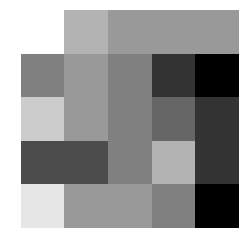

Kernel at coords 46,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     0.     0.     2.     2. ]
 [ 127.   126.5    0.     2.5    1. ]
 [   0.5    0.     0.5    0.5  127. ]
 [   0.   125.   123.5  123.5  125. ]
 [ 250.   247.   246.   249.   252. ]]/[[   1.     0.   126.   125.5  254. ]
 [ 254.   126.5  127.   126.5  254. ]
 [   0.     1.     2.   126.5  251. ]
 [ 253.   126.5  127.5  125.   251. ]
 [ 250.   124.5    0.5    0.   254. ]]
Angle=55.61068466584139


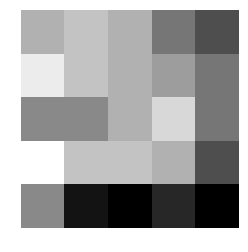

Kernel at coords 47,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   253.     0.     3.     0. ]
 [   0.5    0.     0.5    0.5  127. ]
 [   0.   125.   123.5  123.5  125. ]
 [   0.   125.   123.   123.5  126. ]
 [   6.     3.     0.   254.     0. ]]/[[ 254.   126.5  127.   126.5  254. ]
 [   0.     1.     2.   126.5  251. ]
 [ 253.   126.5  127.5  125.   251. ]
 [ 250.   124.5    0.5    0.   254. ]
 [ 247.   121.5  126.     0.     0. ]]
Angle=56.62002318599279


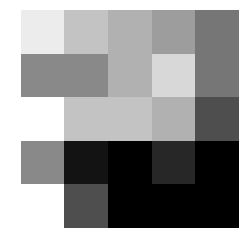

Kernel at coords 48,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     3.     1.   254.   254. ]
 [   0.   125.   123.5  123.5  125. ]
 [   0.   125.   123.   123.5  126. ]
 [   3.5    2.   127.   125.5  126.5]
 [   1.     1.   254.   253.   253. ]]/[[   0.     1.     2.   126.5  251. ]
 [ 253.   126.5  127.5  125.   251. ]
 [ 250.   124.5    0.5    0.   254. ]
 [ 247.   121.5  126.     0.     0. ]
 [ 247.   120.   124.   127.5    0. ]]
Angle=43.87764992662165


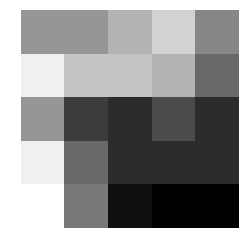

Kernel at coords 49,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 250.   247.   246.   249.   252. ]
 [   0.   125.   123.   123.5  126. ]
 [   3.5    2.   127.   125.5  126.5]
 [ 122.   125.   126.5  127.   127. ]
 [ 243.   249.   255.     1.     1. ]]/[[ 253.   126.5  127.5  125.   251. ]
 [ 250.   124.5    0.5    0.   254. ]
 [ 247.   121.5  126.     0.     0. ]
 [ 247.   120.   124.   127.5    0. ]
 [ 253.   126.     0.     0.5    0. ]]
Angle=35.59199508319693


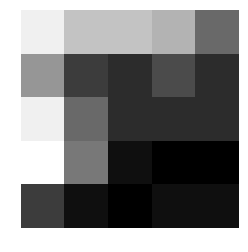

Kernel at coords 50,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     3.     0.   254.     0. ]
 [   3.5    2.   127.   125.5  126.5]
 [ 122.   125.   126.5  127.   127. ]
 [ 122.   126.     0.5  127.5  126. ]
 [   1.     3.     2.   254.   251. ]]/[[ 250.   124.5    0.5    0.   254. ]
 [ 247.   121.5  126.     0.     0. ]
 [ 247.   120.   124.   127.5    0. ]
 [ 253.   126.     0.     0.5    0. ]
 [ 255.   126.5  125.5  125.   253. ]]
Angle=49.03055628187981


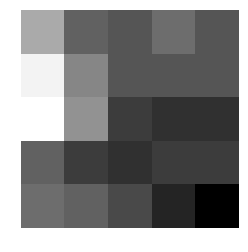

Kernel at coords 51,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     1.   254.   253.   253. ]
 [ 122.   125.   126.5  127.   127. ]
 [ 122.   126.     0.5  127.5  126. ]
 [   0.5    1.5    0.5  125.5  126.5]
 [   0.     0.   255.   253.     2. ]]/[[ 247.   121.5  126.     0.     0. ]
 [ 247.   120.   124.   127.5    0. ]
 [ 253.   126.     0.     0.5    0. ]
 [ 255.   126.5  125.5  125.   253. ]
 [ 255.   126.   124.   126.5    2. ]]
Angle=46.68180918877953


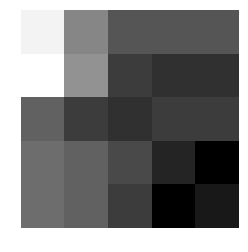

Kernel at coords 52,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 243.   249.   255.     1.     1. ]
 [ 122.   126.     0.5  127.5  126. ]
 [   0.5    1.5    0.5  125.5  126.5]
 [ 125.5  124.5  125.5  126.5    0. ]
 [ 251.   249.   252.     0.   254. ]]/[[ 247.   120.   124.   127.5    0. ]
 [ 253.   126.     0.     0.5    0. ]
 [ 255.   126.5  125.5  125.   253. ]
 [ 255.   126.   124.   126.5    2. ]
 [ 253.   126.5  127.5  127.5    0. ]]
Angle=46.050146557176255


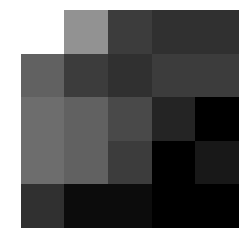

Kernel at coords 53,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     3.     2.   254.   251. ]
 [   0.5    1.5    0.5  125.5  126.5]
 [ 125.5  124.5  125.5  126.5    0. ]
 [ 124.5  122.5  125.     1.5  127. ]
 [ 254.   252.   254.     3.     0. ]]/[[ 253.   126.     0.     0.5    0. ]
 [ 255.   126.5  125.5  125.   253. ]
 [ 255.   126.   124.   126.5    2. ]
 [ 253.   126.5  127.5  127.5    0. ]
 [ 251.   126.5    3.     0.5  253. ]]
Angle=50.42735116880545


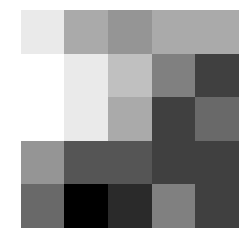

Kernel at coords 54,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.   255.   253.     2. ]
 [ 125.5  124.5  125.5  126.5    0. ]
 [ 124.5  122.5  125.     1.5  127. ]
 [ 127.   126.   127.     2.5    0. ]
 [   0.     0.     0.     2.     0. ]]/[[ 255.   126.5  125.5  125.   253. ]
 [ 255.   126.   124.   126.5    2. ]
 [ 253.   126.5  127.5  127.5    0. ]
 [ 251.   126.5    3.     0.5  253. ]
 [ 251.   126.5    4.     0.5  251. ]]
Angle=57.61699437506474


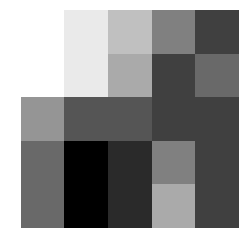

Kernel at coords 55,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   249.   252.     0.   254. ]
 [ 124.5  122.5  125.     1.5  127. ]
 [ 127.   126.   127.     2.5    0. ]
 [ 127.     0.5  127.5  127.5  127. ]
 [ 254.     1.   255.   253.   254. ]]/[[ 255.   126.   124.   126.5    2. ]
 [ 253.   126.5  127.5  127.5    0. ]
 [ 251.   126.5    3.     0.5  253. ]
 [ 251.   126.5    4.     0.5  251. ]
 [ 254.   127.     2.     0.   252. ]]
Angle=41.69540897570786


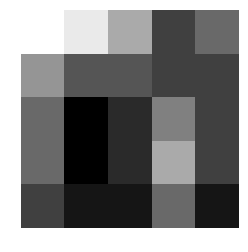

Kernel at coords 56,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   252.   254.     3.     0. ]
 [ 127.   126.   127.     2.5    0. ]
 [ 127.     0.5  127.5  127.5  127. ]
 [ 126.     1.     0.   125.   127.5]
 [ 254.     1.     1.   253.     1. ]]/[[ 253.   126.5  127.5  127.5    0. ]
 [ 251.   126.5    3.     0.5  253. ]
 [ 251.   126.5    4.     0.5  251. ]
 [ 254.   127.     2.     0.   252. ]
 [   1.     0.5    0.     0.     0. ]]
Angle=37.96099790861503


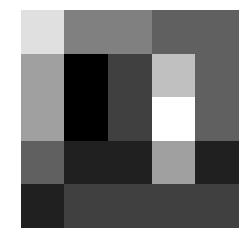

Kernel at coords 57,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     0.     2.     0. ]
 [ 127.     0.5  127.5  127.5  127. ]
 [ 126.     1.     0.   125.   127.5]
 [   0.     0.5    1.   126.5    1. ]
 [   2.     0.     1.     0.     1. ]]/[[ 251.   126.5    3.     0.5  253. ]
 [ 251.   126.5    4.     0.5  251. ]
 [ 254.   127.     2.     0.   252. ]
 [   1.     0.5    0.     0.     0. ]
 [ 255.     0.     0.     0.     1. ]]
Angle=46.721307945878436


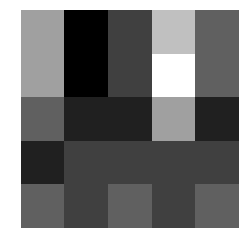

Kernel at coords 58,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     1.   255.   253.   254. ]
 [ 126.     1.     0.   125.   127.5]
 [   0.     0.5    1.   126.5    1. ]
 [   1.   127.5    0.5    0.     0.5]
 [   0.   255.     0.     0.     0. ]]/[[ 251.   126.5    4.     0.5  251. ]
 [ 254.   127.     2.     0.   252. ]
 [   1.     0.5    0.     0.     0. ]
 [ 255.     0.     0.     0.     1. ]
 [ 254.     0.     0.5    0.     1. ]]
Angle=41.776633467247464


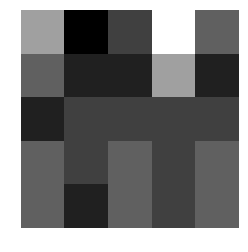

Kernel at coords 59,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     1.     1.   253.     1. ]
 [   0.     0.5    1.   126.5    1. ]
 [   1.   127.5    0.5    0.     0.5]
 [   1.5    3.     1.5    0.   126.5]
 [   3.     7.     3.     0.   253. ]]/[[ 254.   127.     2.     0.   252. ]
 [   1.     0.5    0.     0.     0. ]
 [ 255.     0.     0.     0.     1. ]
 [ 254.     0.     0.5    0.     1. ]
 [   2.     0.   125.   125.   254. ]]
Angle=37.67777853667883


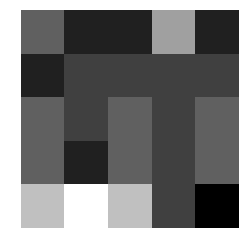

Kernel at coords 60,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.     1.     0.     1. ]
 [   1.   127.5    0.5    0.     0.5]
 [   1.5    3.     1.5    0.   126.5]
 [   2.     3.5    2.     1.   127. ]
 [   1.     0.     1.     2.     1. ]]/[[   1.     0.5    0.     0.     0. ]
 [ 255.     0.     0.     0.     1. ]
 [ 254.     0.     0.5    0.     1. ]
 [   2.     0.   125.   125.   254. ]
 [   1.     0.   126.   125.   253. ]]
Angle=39.151477037644405


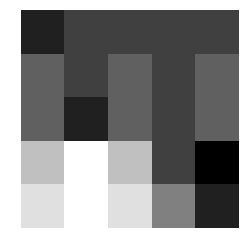

Kernel at coords 61,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   255.     0.     0.     0. ]
 [   1.5    3.     1.5    0.   126.5]
 [   2.     3.5    2.     1.   127. ]
 [ 126.5  125.5  127.     1.5    2. ]
 [ 252.   251.   253.     1.     3. ]]/[[ 255.     0.     0.     0.     1. ]
 [ 254.     0.     0.5    0.     1. ]
 [   2.     0.   125.   125.   254. ]
 [   1.     0.   126.   125.   253. ]
 [   0.     0.5    1.     0.   255. ]]
Angle=35.57448132826046


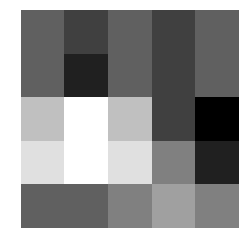

Kernel at coords 62,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     7.     3.     0.   253. ]
 [   2.     3.5    2.     1.   127. ]
 [ 126.5  125.5  127.     1.5    2. ]
 [ 126.5  123.5  124.   126.5    0. ]
 [   1.   252.   251.   252.   253. ]]/[[ 254.     0.     0.5    0.     1. ]
 [   2.     0.   125.   125.   254. ]
 [   1.     0.   126.   125.   253. ]
 [   0.     0.5    1.     0.   255. ]
 [ 251.   125.5    1.     1.     0. ]]
Angle=32.70213872563173


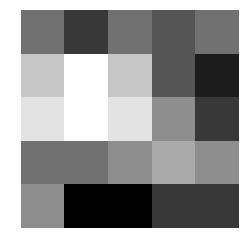

Kernel at coords 63,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     1.     2.     1. ]
 [ 126.5  125.5  127.     1.5    2. ]
 [ 126.5  123.5  124.   126.5    0. ]
 [   1.5  127.5  127.     0.5    1.5]
 [   2.     3.     3.     5.     6. ]]/[[   2.     0.   125.   125.   254. ]
 [   1.     0.   126.   125.   253. ]
 [   0.     0.5    1.     0.   255. ]
 [ 251.   125.5    1.     1.     0. ]
 [ 252.   126.     2.     2.5    1. ]]
Angle=43.70415848329735


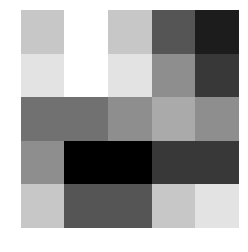

Kernel at coords 64,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   251.   253.     1.     3. ]
 [ 126.5  123.5  124.   126.5    0. ]
 [   1.5  127.5  127.     0.5    1.5]
 [  11.    12.    11.5   12.5   14. ]
 [  20.    21.    20.    20.    22. ]]/[[   1.     0.   126.   125.   253. ]
 [   0.     0.5    1.     0.   255. ]
 [ 251.   125.5    1.     1.     0. ]
 [ 252.   126.     2.     2.5    1. ]
 [ 253.   126.     1.5    3.5    3. ]]
Angle=35.186750168195864


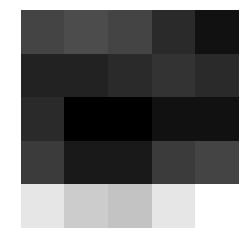

Kernel at coords 65,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   252.   251.   252.   253. ]
 [   1.5  127.5  127.     0.5    1.5]
 [  11.    12.    11.5   12.5   14. ]
 [  20.5   22.5   23.    21.    20. ]
 [  21.    24.    26.    22.    18. ]]/[[   0.     0.5    1.     0.   255. ]
 [ 251.   125.5    1.     1.     0. ]
 [ 252.   126.     2.     2.5    1. ]
 [ 253.   126.     1.5    3.5    3. ]
 [   0.     0.5    0.5  127.5  255. ]]
Angle=31.856593472231417


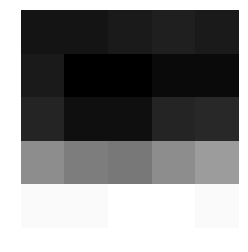

Kernel at coords 66,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[  2.    3.    3.    5.    6. ]
 [ 11.   12.   11.5  12.5  14. ]
 [ 20.5  22.5  23.   21.   20. ]
 [ 11.   14.   15.   12.    9.5]
 [  1.    4.    4.    2.    1. ]]/[[ 251.   125.5    1.     1.     0. ]
 [ 252.   126.     2.     2.5    1. ]
 [ 253.   126.     1.5    3.5    3. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   3.     2.   127.5  126.   254. ]]
Angle=45.354020141445474


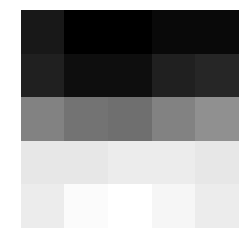

Kernel at coords 67,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[  20.    21.    20.    20.    22. ]
 [  20.5   22.5   23.    21.    20. ]
 [  11.    14.    15.    12.     9.5]
 [   0.     0.5    2.5    3.     2. ]
 [ 255.   253.     1.     4.     3. ]]/[[ 252.   126.     2.     2.5    1. ]
 [ 253.   126.     1.5    3.5    3. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   3.     2.   127.5  126.   254. ]
 [   1.     3.     3.   127.   253. ]]
Angle=49.114435704603984


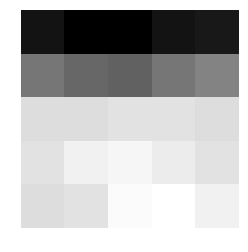

Kernel at coords 68,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[  21.    24.    26.    22.    18. ]
 [  11.    14.    15.    12.     9.5]
 [   0.     0.5    2.5    3.     2. ]
 [   0.   126.5    1.     3.     4. ]
 [   1.     0.     1.     2.     5. ]]/[[ 253.   126.     1.5    3.5    3. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   3.     2.   127.5  126.   254. ]
 [   1.     3.     3.   127.   253. ]
 [   0.     3.     4.     1.     0. ]]
Angle=53.157502948785194


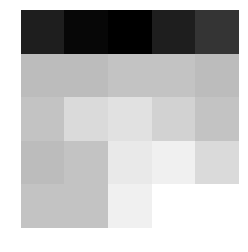

Kernel at coords 69,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     4.     4.     2.     1. ]
 [   0.     0.5    2.5    3.     2. ]
 [   0.   126.5    1.     3.     4. ]
 [   0.   126.5  126.   126.     0. ]
 [ 255.   253.   251.   250.   251. ]]/[[   0.     0.5    0.5  127.5  255. ]
 [   3.     2.   127.5  126.   254. ]
 [   1.     3.     3.   127.   253. ]
 [   0.     3.     4.     1.     0. ]
 [ 254.     1.     2.5    1.     1. ]]
Angle=40.66360904672294


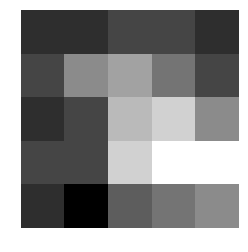

Kernel at coords 70,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   253.     1.     4.     3. ]
 [   0.   126.5    1.     3.     4. ]
 [   0.   126.5  126.   126.     0. ]
 [   0.   127.   125.   124.   124. ]
 [   1.     1.   255.   254.   253. ]]/[[   3.     2.   127.5  126.   254. ]
 [   1.     3.     3.   127.   253. ]
 [   0.     3.     4.     1.     0. ]
 [ 254.     1.     2.5    1.     1. ]
 [ 254.     0.     1.     0.     0. ]]
Angle=31.799955579070975


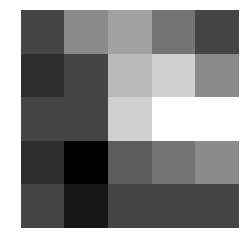

Kernel at coords 71,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     1.     2.     5. ]
 [   0.   126.5  126.   126.     0. ]
 [   0.   127.   125.   124.   124. ]
 [   0.     1.5    1.5    0.   127. ]
 [ 255.     2.     4.     2.     1. ]]/[[   1.     3.     3.   127.   253. ]
 [   0.     3.     4.     1.     0. ]
 [ 254.     1.     2.5    1.     1. ]
 [ 254.     0.     1.     0.     0. ]
 [   1.     2.5    1.   126.5  255. ]]
Angle=33.95375732048605


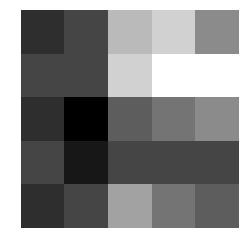

Kernel at coords 72,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   253.   251.   250.   251. ]
 [   0.   127.   125.   124.   124. ]
 [   0.     1.5    1.5    0.   127. ]
 [ 127.     1.     1.5    0.   127. ]
 [ 255.     0.   255.   254.   253. ]]/[[   0.     3.     4.     1.     0. ]
 [ 254.     1.     2.5    1.     1. ]
 [ 254.     0.     1.     0.     0. ]
 [   1.     2.5    1.   126.5  255. ]
 [   2.     2.5    0.   125.5  254. ]]
Angle=25.430136710486963


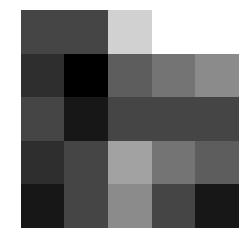

Kernel at coords 73,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     1.   255.   254.   253. ]
 [   0.     1.5    1.5    0.   127. ]
 [ 127.     1.     1.5    0.   127. ]
 [   1.5    1.   127.5  127.   127. ]
 [   4.     2.     0.     0.     1. ]]/[[ 254.     1.     2.5    1.     1. ]
 [ 254.     0.     1.     0.     0. ]
 [   1.     2.5    1.   126.5  255. ]
 [   2.     2.5    0.   125.5  254. ]
 [   0.     0.5  127.   126.   255. ]]
Angle=41.143110353620656


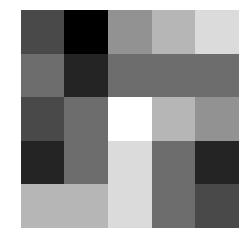

Kernel at coords 74,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     2.     4.     2.     1. ]
 [ 127.     1.     1.5    0.   127. ]
 [   1.5    1.   127.5  127.   127. ]
 [   1.5    0.5    0.5    1.5    3. ]
 [ 255.   255.     1.     3.     5. ]]/[[ 254.     0.     1.     0.     0. ]
 [   1.     2.5    1.   126.5  255. ]
 [   2.     2.5    0.   125.5  254. ]
 [   0.     0.5  127.   126.   255. ]
 [   0.     1.5    1.     0.     1. ]]
Angle=36.57107748380076


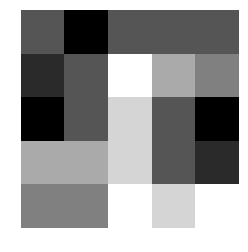

Kernel at coords 75,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.   255.   254.   253. ]
 [   1.5    1.   127.5  127.   127. ]
 [   1.5    0.5    0.5    1.5    3. ]
 [   1.     0.5    0.     1.     1.5]
 [   3.     2.   255.   255.   254. ]]/[[   1.     2.5    1.   126.5  255. ]
 [   2.     2.5    0.   125.5  254. ]
 [   0.     0.5  127.   126.   255. ]
 [   0.     1.5    1.     0.     1. ]
 [ 255.   127.5  127.5  127.5    0. ]]
Angle=45.27215219634819


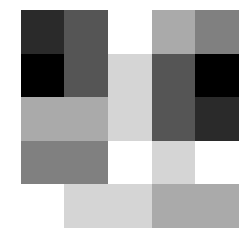

Kernel at coords 76,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     2.     0.     0.     1. ]
 [   1.5    0.5    0.5    1.5    3. ]
 [   1.     0.5    0.     1.     1.5]
 [   0.     0.5  127.   127.5  127. ]
 [ 253.   255.   255.     0.     0. ]]/[[   2.     2.5    0.   125.5  254. ]
 [   0.     0.5  127.   126.   255. ]
 [   0.     1.5    1.     0.     1. ]
 [ 255.   127.5  127.5  127.5    0. ]
 [   1.     0.5    0.     0.     0. ]]
Angle=41.46319218909578


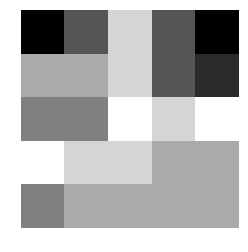

Kernel at coords 77,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     1.     3.     5. ]
 [   1.     0.5    0.     1.     1.5]
 [   0.     0.5  127.   127.5  127. ]
 [ 126.   127.   127.5    0.5    1. ]
 [ 255.   255.     0.     1.     2. ]]/[[   0.     0.5  127.   126.   255. ]
 [   0.     1.5    1.     0.     1. ]
 [ 255.   127.5  127.5  127.5    0. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     1.     1.     1. ]]
Angle=35.80046762630717


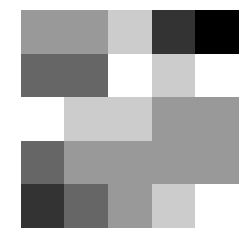

Kernel at coords 78,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.   255.   255.   254. ]
 [   0.     0.5  127.   127.5  127. ]
 [ 126.   127.   127.5    0.5    1. ]
 [   2.5    1.     0.   127.5    0.5]
 [   6.     3.     0.   254.   255. ]]/[[   0.     1.5    1.     0.     1. ]
 [ 255.   127.5  127.5  127.5    0. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     1.     1.     1. ]
 [ 254.   126.   126.5    0.5    2. ]]
Angle=31.856763673091844


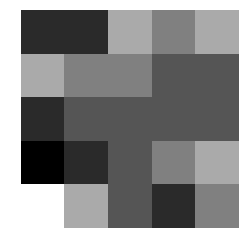

Kernel at coords 79,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   255.   255.     0.     0. ]
 [ 126.   127.   127.5    0.5    1. ]
 [   2.5    1.     0.   127.5    0.5]
 [   0.5    1.     1.     1.5    1. ]
 [ 251.   255.     2.     5.     3. ]]/[[ 255.   127.5  127.5  127.5    0. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     1.     1.     1. ]
 [ 254.   126.   126.5    0.5    2. ]
 [   2.     1.5    1.5    1.     0. ]]
Angle=32.3817822196099


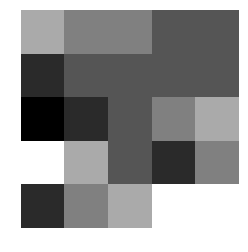

Kernel at coords 80,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     0.     1.     2. ]
 [   2.5    1.     0.   127.5    0.5]
 [   0.5    1.     1.     1.5    1. ]
 [ 126.     0.     1.5    1.5  126.5]
 [   1.     1.     1.   254.   250. ]]/[[   1.     0.5    0.     0.     0. ]
 [   1.     1.     1.     1.     1. ]
 [ 254.   126.   126.5    0.5    2. ]
 [   2.     1.5    1.5    1.     0. ]
 [   2.     1.5    0.   125.5  252. ]]
Angle=37.30954209767811


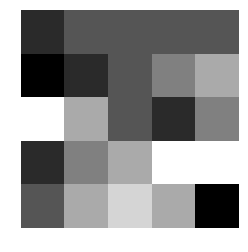

Kernel at coords 81,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     3.     0.   254.   255. ]
 [   0.5    1.     1.     1.5    1. ]
 [ 126.     0.     1.5    1.5  126.5]
 [ 127.5    0.5    1.   127.5  125.5]
 [ 254.     0.     1.     1.     1. ]]/[[   1.     1.     1.     1.     1. ]
 [ 254.   126.   126.5    0.5    2. ]
 [   2.     1.5    1.5    1.     0. ]
 [   2.     1.5    0.   125.5  252. ]
 [   4.     3.     0.5  125.5  252. ]]
Angle=44.64466436142622


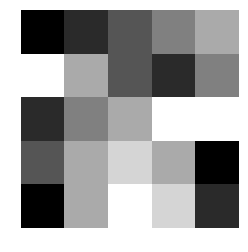

Kernel at coords 82,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   255.     2.     5.     3. ]
 [ 126.     0.     1.5    1.5  126.5]
 [ 127.5    0.5    1.   127.5  125.5]
 [   0.   127.5    0.     0.5    2. ]
 [   2.   255.   255.     0.     3. ]]/[[ 254.   126.   126.5    0.5    2. ]
 [   2.     1.5    1.5    1.     0. ]
 [   2.     1.5    0.   125.5  252. ]
 [   4.     3.     0.5  125.5  252. ]
 [   1.     1.5    1.   127.5  255. ]]
Angle=44.69535564012006


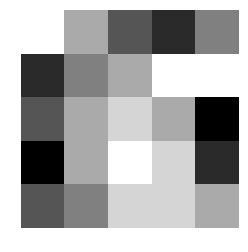

Kernel at coords 83,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     1.     1.   254.   250. ]
 [ 127.5    0.5    1.   127.5  125.5]
 [   0.   127.5    0.     0.5    2. ]
 [ 126.   125.   126.   127.     0. ]
 [ 250.   251.   253.   254.   253. ]]/[[   2.     1.5    1.5    1.     0. ]
 [   2.     1.5    0.   125.5  252. ]
 [   4.     3.     0.5  125.5  252. ]
 [   1.     1.5    1.   127.5  255. ]
 [   2.     3.     2.5  127.5  254. ]]
Angle=37.10676334447839


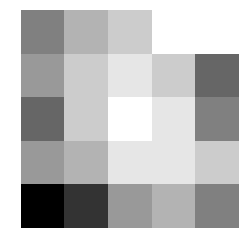

Kernel at coords 84,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     0.     1.     1.     1. ]
 [   0.   127.5    0.     0.5    2. ]
 [ 126.   125.   126.   127.     0. ]
 [ 126.   125.5  126.   127.   127.5]
 [   2.     0.   255.     0.     2. ]]/[[   2.     1.5    0.   125.5  252. ]
 [   4.     3.     0.5  125.5  252. ]
 [   1.     1.5    1.   127.5  255. ]
 [   2.     3.     2.5  127.5  254. ]
 [   0.     1.5    2.5    1.     0. ]]
Angle=42.38304546709197


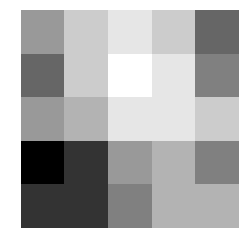

Kernel at coords 85,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.   255.   255.     0.     3. ]
 [ 126.   125.   126.   127.     0. ]
 [ 126.   125.5  126.   127.   127.5]
 [   2.     0.   126.5  126.5  127.5]
 [   2.     0.   254.   253.   253. ]]/[[   4.     3.     0.5  125.5  252. ]
 [   1.     1.5    1.   127.5  255. ]
 [   2.     3.     2.5  127.5  254. ]
 [   0.     1.5    2.5    1.     0. ]
 [ 254.   127.5    1.     0.5    0. ]]
Angle=30.54377300918043


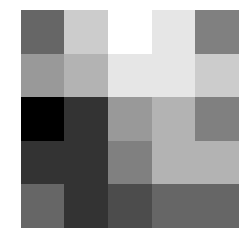

Kernel at coords 86,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 250.   251.   253.   254.   253. ]
 [ 126.   125.5  126.   127.   127.5]
 [   2.     0.   126.5  126.5  127.5]
 [   2.     1.   127.5  127.   127.5]
 [   2.     2.     1.     1.     2. ]]/[[   1.     1.5    1.   127.5  255. ]
 [   2.     3.     2.5  127.5  254. ]
 [   0.     1.5    2.5    1.     0. ]
 [ 254.   127.5    1.     0.5    0. ]
 [ 254.   127.     0.5    1.     1. ]]
Angle=29.307515031051445


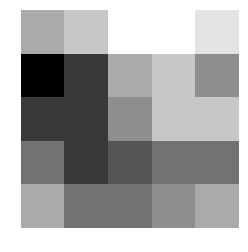

Kernel at coords 87,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.   255.     0.     2. ]
 [   2.     0.   126.5  126.5  127.5]
 [   2.     1.   127.5  127.   127.5]
 [   4.5    4.5    4.     3.     1.5]
 [   7.     7.     7.     5.     1. ]]/[[   2.     3.     2.5  127.5  254. ]
 [   0.     1.5    2.5    1.     0. ]
 [ 254.   127.5    1.     0.5    0. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 254.   127.   127.5  126.   253. ]]
Angle=50.492038878289094


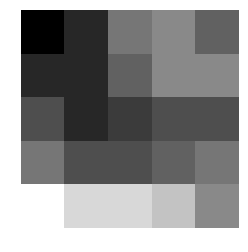

Kernel at coords 88,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.   254.   253.   253. ]
 [   2.     1.   127.5  127.   127.5]
 [   4.5    4.5    4.     3.     1.5]
 [   1.     1.5    2.5    2.     0.5]
 [ 251.   252.   254.   255.     0. ]]/[[   0.     1.5    2.5    1.     0. ]
 [ 254.   127.5    1.     0.5    0. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 254.   127.   127.5  126.   253. ]
 [ 255.     0.5    1.   127.   254. ]]
Angle=44.639586295186085


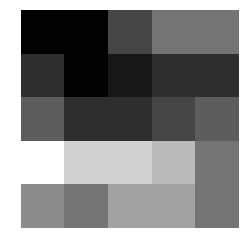

Kernel at coords 89,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     1.     1.     2. ]
 [   4.5    4.5    4.     3.     1.5]
 [   1.     1.5    2.5    2.     0.5]
 [ 126.   126.5  127.     0.     0.5]
 [   1.     1.     0.     1.     1. ]]/[[ 254.   127.5    1.     0.5    0. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 254.   127.   127.5  126.   253. ]
 [ 255.     0.5    1.   127.   254. ]
 [ 255.     0.     1.   127.5  254. ]]
Angle=61.46972741881831


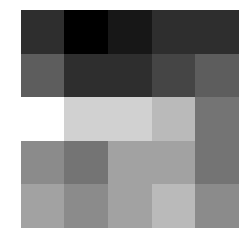

Kernel at coords 90,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   7.     7.     7.     5.     1. ]
 [   1.     1.5    2.5    2.     0.5]
 [ 126.   126.5  127.     0.     0.5]
 [ 127.5  127.5  127.   127.5    0. ]
 [ 254.   254.   254.   254.   255. ]]/[[ 254.   127.     0.5    1.     1. ]
 [ 254.   127.   127.5  126.   253. ]
 [ 255.     0.5    1.   127.   254. ]
 [ 255.     0.     1.   127.5  254. ]
 [ 255.     0.     1.     0.   255. ]]
Angle=48.64432643634582


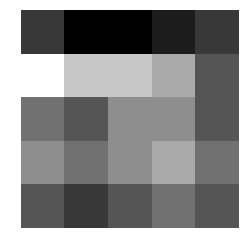

Kernel at coords 91,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   252.   254.   255.     0. ]
 [ 126.   126.5  127.     0.     0.5]
 [ 127.5  127.5  127.   127.5    0. ]
 [   0.   125.5  126.5  125.5  127. ]
 [   2.   253.   255.   253.   255. ]]/[[ 254.   127.   127.5  126.   253. ]
 [ 255.     0.5    1.   127.   254. ]
 [ 255.     0.     1.   127.5  254. ]
 [ 255.     0.     1.     0.   255. ]
 [ 250.   126.5    1.     0.     1. ]]
Angle=37.14908086019013


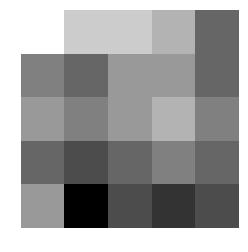

Kernel at coords 92,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     1.     0.     1.     1. ]
 [ 127.5  127.5  127.   127.5    0. ]
 [   0.   125.5  126.5  125.5  127. ]
 [   0.     1.     0.5  127.5    1.5]
 [ 254.     5.     2.     2.     4. ]]/[[ 255.     0.5    1.   127.   254. ]
 [ 255.     0.     1.   127.5  254. ]
 [ 255.     0.     1.     0.   255. ]
 [ 250.   126.5    1.     0.     1. ]
 [   1.     0.5  127.5    1.     3. ]]
Angle=46.94688326146657


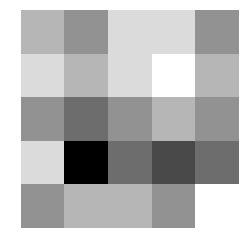

Kernel at coords 93,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   254.   254.   255. ]
 [   0.   125.5  126.5  125.5  127. ]
 [   0.     1.     0.5  127.5    1.5]
 [ 126.     2.   127.     0.   127. ]
 [ 254.   255.   252.   254.   250. ]]/[[ 255.     0.     1.   127.5  254. ]
 [ 255.     0.     1.     0.   255. ]
 [ 250.   126.5    1.     0.     1. ]
 [   1.     0.5  127.5    1.     3. ]
 [   2.   127.5  127.     0.   255. ]]
Angle=31.91270092639809


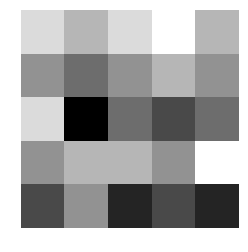

Kernel at coords 94,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.   253.   255.   253.   255. ]
 [   0.     1.     0.5  127.5    1.5]
 [ 126.     2.   127.     0.   127. ]
 [ 127.5  126.   125.5  127.5  121. ]
 [   1.   253.   255.     1.   248. ]]/[[ 255.     0.     1.     0.   255. ]
 [ 250.   126.5    1.     0.     1. ]
 [   1.     0.5  127.5    1.     3. ]
 [   2.   127.5  127.     0.   255. ]
 [ 254.   126.5    1.   124.5  246. ]]
Angle=38.77877655533288


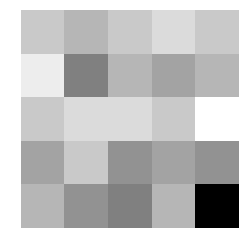

Kernel at coords 95,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     5.     2.     2.     4. ]
 [ 126.     2.   127.     0.   127. ]
 [ 127.5  126.   125.5  127.5  121. ]
 [ 126.5  127.   127.5  125.   119.5]
 [ 252.     1.     0.   249.   247. ]]/[[ 250.   126.5    1.     0.     1. ]
 [   1.     0.5  127.5    1.     3. ]
 [   2.   127.5  127.     0.   255. ]
 [ 254.   126.5    1.   124.5  246. ]
 [   3.     0.5  125.   120.   244. ]]
Angle=35.41993716424007


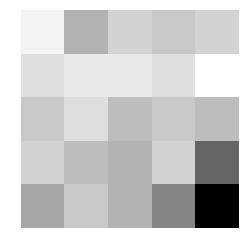

Kernel at coords 96,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.   252.   254.   250. ]
 [ 127.5  126.   125.5  127.5  121. ]
 [ 126.5  127.   127.5  125.   119.5]
 [ 126.5    2.5  126.   116.5  119. ]
 [   1.     4.   252.   240.   247. ]]/[[   1.     0.5  127.5    1.     3. ]
 [   2.   127.5  127.     0.   255. ]
 [ 254.   126.5    1.   124.5  246. ]
 [   3.     0.5  125.   120.   244. ]
 [   6.   126.   115.   117.5  251. ]]
Angle=33.368127170923756


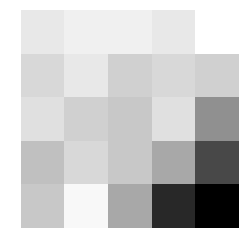

Kernel at coords 97,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   253.   255.     1.   248. ]
 [ 126.5  127.   127.5  125.   119.5]
 [ 126.5    2.5  126.   116.5  119. ]
 [   3.5    0.   123.   118.5  123.5]
 [   6.   252.   250.   253.     0. ]]/[[   2.   127.5  127.     0.   255. ]
 [ 254.   126.5    1.   124.5  246. ]
 [   3.     0.5  125.   120.   244. ]
 [   6.   126.   115.   117.5  251. ]
 [ 252.   120.   115.5  120.5  254. ]]
Angle=44.13285100472789


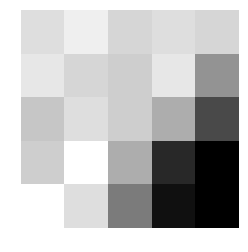

Kernel at coords 98,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     1.     0.   249.   247. ]
 [ 126.5    2.5  126.   116.5  119. ]
 [   3.5    0.   123.   118.5  123.5]
 [   3.   119.   121.5    1.     2.5]
 [   0.   242.   249.     5.     5. ]]/[[ 254.   126.5    1.   124.5  246. ]
 [   3.     0.5  125.   120.   244. ]
 [   6.   126.   115.   117.5  251. ]
 [ 252.   120.   115.5  120.5  254. ]
 [ 238.   116.5  125.   126.5  254. ]]
Angle=57.63715787507126


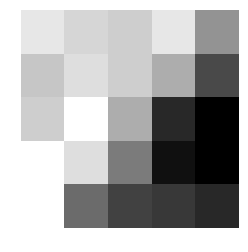

Kernel at coords 99,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     4.   252.   240.   247. ]
 [   3.5    0.   123.   118.5  123.5]
 [   3.   119.   121.5    1.     2.5]
 [ 126.   121.5  123.     1.     2. ]
 [ 252.     1.   253.   253.   255. ]]/[[   3.     0.5  125.   120.   244. ]
 [   6.   126.   115.   117.5  251. ]
 [ 252.   120.   115.5  120.5  254. ]
 [ 238.   116.5  125.   126.5  254. ]
 [ 243.   117.   123.   127.5    0. ]]
Angle=54.05328774927397


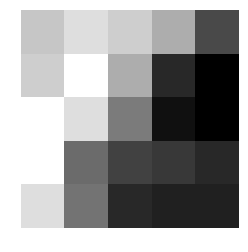

Kernel at coords 100,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.   252.   250.   253.     0. ]
 [   3.   119.   121.5    1.     2.5]
 [ 126.   121.5  123.     1.     2. ]
 [ 120.   124.5  124.5  125.5  127. ]
 [ 244.   248.   252.   254.   255. ]]/[[   6.   126.   115.   117.5  251. ]
 [ 252.   120.   115.5  120.5  254. ]
 [ 238.   116.5  125.   126.5  254. ]
 [ 243.   117.   123.   127.5    0. ]
 [ 247.   121.   126.     1.     1. ]]
Angle=47.76491687387303


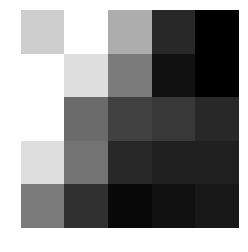

Kernel at coords 101,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   242.   249.     5.     5. ]
 [ 126.   121.5  123.     1.     2. ]
 [ 120.   124.5  124.5  125.5  127. ]
 [ 117.5  121.5  126.     0.     0. ]
 [ 247.   251.     0.     2.     1. ]]/[[ 252.   120.   115.5  120.5  254. ]
 [ 238.   116.5  125.   126.5  254. ]
 [ 243.   117.   123.   127.5    0. ]
 [ 247.   121.   126.     1.     1. ]
 [ 251.   125.5    1.5    1.5    0. ]]
Angle=55.14379553770591


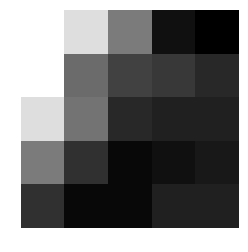

Kernel at coords 102,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     1.   253.   253.   255. ]
 [ 120.   124.5  124.5  125.5  127. ]
 [ 117.5  121.5  126.     0.     0. ]
 [ 123.   126.     1.     1.5    1. ]
 [ 255.     1.     2.     1.     1. ]]/[[ 238.   116.5  125.   126.5  254. ]
 [ 243.   117.   123.   127.5    0. ]
 [ 247.   121.   126.     1.     1. ]
 [ 251.   125.5    1.5    1.5    0. ]
 [ 253.   127.     1.5    1.     0. ]]
Angle=47.535431124959885


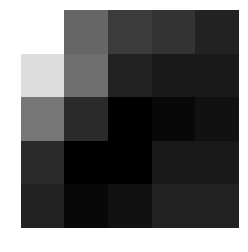

Kernel at coords 103,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 244.   248.   252.   254.   255. ]
 [ 117.5  121.5  126.     0.     0. ]
 [ 123.   126.     1.     1.5    1. ]
 [   0.     1.5    1.5    0.   127.5]
 [   1.     2.     1.   255.   254. ]]/[[ 243.   117.   123.   127.5    0. ]
 [ 247.   121.   126.     1.     1. ]
 [ 251.   125.5    1.5    1.5    0. ]
 [ 253.   127.     1.5    1.     0. ]
 [ 254.   127.     0.   127.5  255. ]]
Angle=49.28858270338101


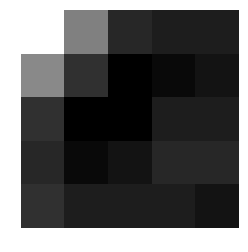

Kernel at coords 104,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 247.   251.     0.     2.     1. ]
 [ 123.   126.     1.     1.5    1. ]
 [   0.     1.5    1.5    0.   127.5]
 [   1.5    2.     1.     0.   127.5]
 [   2.     2.     1.     1.     1. ]]/[[ 247.   121.   126.     1.     1. ]
 [ 251.   125.5    1.5    1.5    0. ]
 [ 253.   127.     1.5    1.     0. ]
 [ 254.   127.     0.   127.5  255. ]
 [ 254.   126.5  127.5  127.5  255. ]]
Angle=61.45716439593418


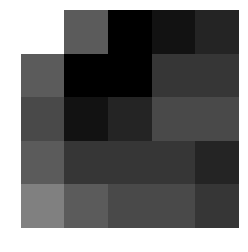

Kernel at coords 105,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     2.     1.     1. ]
 [   0.     1.5    1.5    0.   127.5]
 [   1.5    2.     1.     0.   127.5]
 [   0.5    1.5    1.5    1.     1. ]
 [ 255.     1.     2.     1.     1. ]]/[[ 251.   125.5    1.5    1.5    0. ]
 [ 253.   127.     1.5    1.     0. ]
 [ 254.   127.     0.   127.5  255. ]
 [ 254.   126.5  127.5  127.5  255. ]
 [   0.     0.   127.5  127.   255. ]]
Angle=63.60293207911428


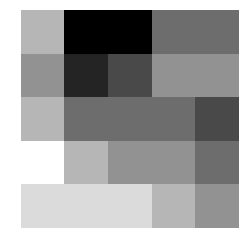

Kernel at coords 106,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     2.     1.   255.   254. ]
 [   1.5    2.     1.     0.   127.5]
 [   0.5    1.5    1.5    1.     1. ]
 [ 126.5    0.     1.     0.5    0.5]
 [ 254.   255.     0.     0.     0. ]]/[[ 253.   127.     1.5    1.     0. ]
 [ 254.   127.     0.   127.5  255. ]
 [ 254.   126.5  127.5  127.5  255. ]
 [   0.     0.   127.5  127.   255. ]
 [   1.     1.     0.   127.   255. ]]
Angle=58.60492135749744


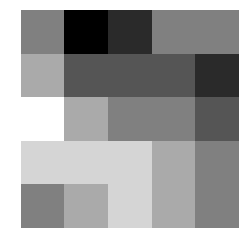

Kernel at coords 107,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     1.     1.     1. ]
 [   0.5    1.5    1.5    1.     1. ]
 [ 126.5    0.     1.     0.5    0.5]
 [ 127.5  126.   126.     0.     1.5]
 [   1.   253.   252.     0.     3. ]]/[[ 254.   127.     0.   127.5  255. ]
 [ 254.   126.5  127.5  127.5  255. ]
 [   0.     0.   127.5  127.   255. ]
 [   1.     1.     0.   127.   255. ]
 [ 253.   126.5    1.5    2.5    2. ]]
Angle=59.83927218598985


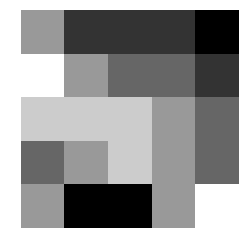

Kernel at coords 108,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     2.     1.     1. ]
 [ 126.5    0.     1.     0.5    0.5]
 [ 127.5  126.   126.     0.     1.5]
 [   0.5    0.5  127.5  126.5  127. ]
 [   0.     4.     3.   253.   251. ]]/[[ 254.   126.5  127.5  127.5  255. ]
 [   0.     0.   127.5  127.   255. ]
 [   1.     1.     0.   127.   255. ]
 [ 253.   126.5    1.5    2.5    2. ]
 [   1.     0.   126.   126.5    0. ]]
Angle=49.60845633417894


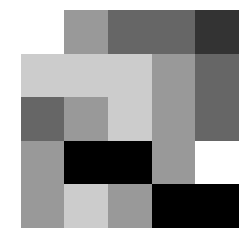

Kernel at coords 109,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.     0.     0.     0. ]
 [ 127.5  126.   126.     0.     1.5]
 [   0.5    0.5  127.5  126.5  127. ]
 [ 127.5    4.5    5.     1.5  127.5]
 [ 255.     5.     7.     6.     4. ]]/[[   0.     0.   127.5  127.   255. ]
 [   1.     1.     0.   127.   255. ]
 [ 253.   126.5    1.5    2.5    2. ]
 [   1.     0.   126.   126.5    0. ]
 [   7.     4.   126.5  125.   254. ]]
Angle=44.55391986415667


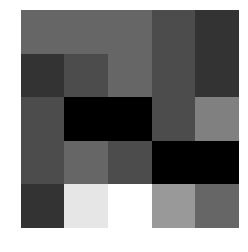

Kernel at coords 110,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   253.   252.     0.     3. ]
 [   0.5    0.5  127.5  126.5  127. ]
 [ 127.5    4.5    5.     1.5  127.5]
 [ 124.   127.5    2.     2.     2. ]
 [ 249.   250.   253.   254.     0. ]]/[[   1.     1.     0.   127.   255. ]
 [ 253.   126.5    1.5    2.5    2. ]
 [   1.     0.   126.   126.5    0. ]
 [   7.     4.   126.5  125.   254. ]
 [   8.     6.     0.5  126.5    0. ]]
Angle=35.479043708751085


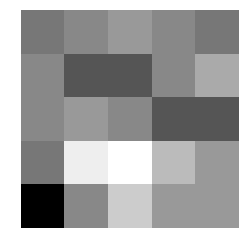

Kernel at coords 111,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     4.     3.   253.   251. ]
 [ 127.5    4.5    5.     1.5  127.5]
 [ 124.   127.5    2.     2.     2. ]
 [ 127.5  125.5  126.   127.5    1. ]
 [   6.     1.   255.     1.     2. ]]/[[ 253.   126.5    1.5    2.5    2. ]
 [   1.     0.   126.   126.5    0. ]
 [   7.     4.   126.5  125.   254. ]
 [   8.     6.     0.5  126.5    0. ]
 [   3.     2.5    0.5    0.     1. ]]
Angle=33.15195293641454


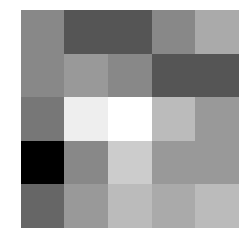

Kernel at coords 112,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     5.     7.     6.     4. ]
 [ 124.   127.5    2.     2.     2. ]
 [ 127.5  125.5  126.   127.5    1. ]
 [   4.     1.   127.5    1.5    2. ]
 [   2.     1.     0.     2.     2. ]]/[[   1.     0.   126.   126.5    0. ]
 [   7.     4.   126.5  125.   254. ]
 [   8.     6.     0.5  126.5    0. ]
 [   3.     2.5    0.5    0.     1. ]
 [   2.     1.5    1.     1.     1. ]]
Angle=34.988447761569475


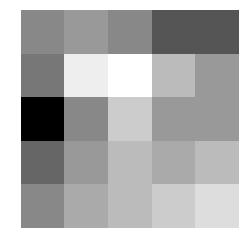

Kernel at coords 113,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 249.   250.   253.   254.     0. ]
 [ 127.5  125.5  126.   127.5    1. ]
 [   4.     1.   127.5    1.5    2. ]
 [   0.     0.     0.5    1.5    1. ]
 [ 254.   255.     1.     1.     0. ]]/[[   7.     4.   126.5  125.   254. ]
 [   8.     6.     0.5  126.5    0. ]
 [   3.     2.5    0.5    0.     1. ]
 [   2.     1.5    1.     1.     1. ]
 [   3.     3.     2.     0.5    0. ]]
Angle=29.678329745827046


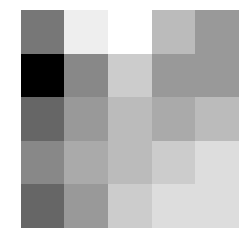

Kernel at coords 114,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     1.   255.     1.     2. ]
 [   4.     1.   127.5    1.5    2. ]
 [   0.     0.     0.5    1.5    1. ]
 [ 126.5    0.     0.   126.5  126.5]
 [ 255.     1.   255.   252.   253. ]]/[[   8.     6.     0.5  126.5    0. ]
 [   3.     2.5    0.5    0.     1. ]
 [   2.     1.5    1.     1.     1. ]
 [   3.     3.     2.     0.5    0. ]
 [   5.     3.   127.5  127.5    1. ]]
Angle=39.408502292831635


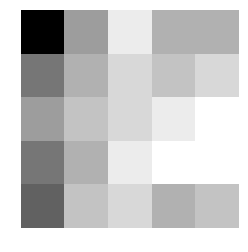

Kernel at coords 115,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.     0.     2.     2. ]
 [   0.     0.     0.5    1.5    1. ]
 [ 126.5    0.     0.   126.5  126.5]
 [   1.5  127.5  126.5  126.5  127.5]
 [   4.   254.   254.     1.     2. ]]/[[   3.     2.5    0.5    0.     1. ]
 [   2.     1.5    1.     1.     1. ]
 [   3.     3.     2.     0.5    0. ]
 [   5.     3.   127.5  127.5    1. ]
 [ 255.     0.     1.     1.5    2. ]]
Angle=44.03878292244589


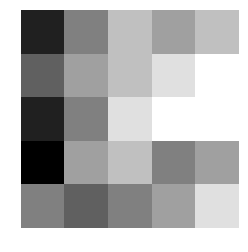

Kernel at coords 116,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.     1.     1.     0. ]
 [ 126.5    0.     0.   126.5  126.5]
 [   1.5  127.5  126.5  126.5  127.5]
 [   3.5    0.   127.5    1.     1.5]
 [   3.     2.     1.     1.     1. ]]/[[   2.     1.5    1.     1.     1. ]
 [   3.     3.     2.     0.5    0. ]
 [   5.     3.   127.5  127.5    1. ]
 [ 255.     0.     1.     1.5    2. ]
 [ 254.   127.     0.5    1.5    2. ]]
Angle=42.07025566194442


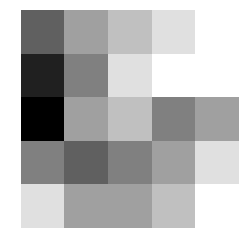

Kernel at coords 117,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.   255.   252.   253. ]
 [   1.5  127.5  126.5  126.5  127.5]
 [   3.5    0.   127.5    1.     1.5]
 [   1.     1.     1.     1.5    1.5]
 [ 255.     0.     1.     2.     2. ]]/[[   3.     3.     2.     0.5    0. ]
 [   5.     3.   127.5  127.5    1. ]
 [ 255.     0.     1.     1.5    2. ]
 [ 254.   127.     0.5    1.5    2. ]
 [ 255.     0.     1.5    2.     2. ]]
Angle=37.311308527799426


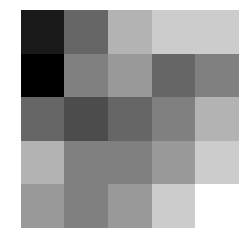

Kernel at coords 118,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.   254.   254.     1.     2. ]
 [   3.5    0.   127.5    1.     1.5]
 [   1.     1.     1.     1.5    1.5]
 [ 126.     0.     1.5    2.5    2. ]
 [ 253.     0.     2.     3.     2. ]]/[[   5.     3.   127.5  127.5    1. ]
 [ 255.     0.     1.     1.5    2. ]
 [ 254.   127.     0.5    1.5    2. ]
 [ 255.     0.     1.5    2.     2. ]
 [   2.     2.5    3.     2.     1. ]]
Angle=43.89168990799119


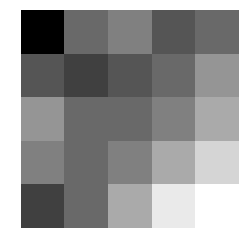

Kernel at coords 119,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.     1.     1.     1. ]
 [   1.     1.     1.     1.5    1.5]
 [ 126.     0.     1.5    2.5    2. ]
 [ 127.     1.     2.     2.     1. ]
 [   1.     2.     2.     1.     0. ]]/[[ 255.     0.     1.     1.5    2. ]
 [ 254.   127.     0.5    1.5    2. ]
 [ 255.     0.     1.5    2.     2. ]
 [   2.     2.5    3.     2.     1. ]
 [   3.     3.     2.5    1.     0. ]]
Angle=47.60320897373933


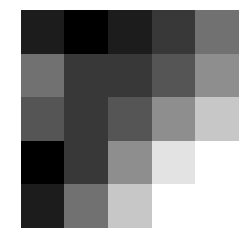

Kernel at coords 120,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     1.     2.     2. ]
 [ 126.     0.     1.5    2.5    2. ]
 [ 127.     1.     2.     2.     1. ]
 [   3.     2.5    2.     0.5  127. ]
 [   5.     3.     2.     0.   254. ]]/[[ 254.   127.     0.5    1.5    2. ]
 [ 255.     0.     1.5    2.     2. ]
 [   2.     2.5    3.     2.     1. ]
 [   3.     3.     2.5    1.     0. ]
 [   1.     1.5    1.   127.   254. ]]
Angle=42.42031000892193


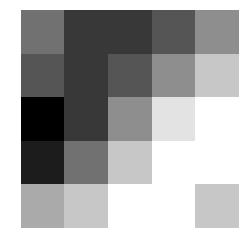

Kernel at coords 121,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.     0.     2.     3.     2. ]
 [ 127.     1.     2.     2.     1. ]
 [   3.     2.5    2.     0.5  127. ]
 [   4.     2.     1.     0.   127.5]
 [   3.     1.     0.     0.     1. ]]/[[ 255.     0.     1.5    2.     2. ]
 [   2.     2.5    3.     2.     1. ]
 [   3.     3.     2.5    1.     0. ]
 [   1.     1.5    1.   127.   254. ]
 [ 255.     0.     0.5  127.5  255. ]]
Angle=47.78072231670778


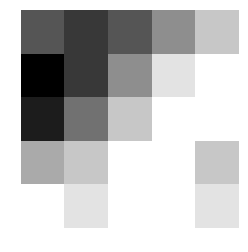

Kernel at coords 122,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     2.     2.     1.     0. ]
 [   3.     2.5    2.     0.5  127. ]
 [   4.     2.     1.     0.   127.5]
 [   0.5    0.   127.5    0.     1.5]
 [ 254.   255.   255.     0.     2. ]]/[[   2.     2.5    3.     2.     1. ]
 [   3.     3.     2.5    1.     0. ]
 [   1.     1.5    1.   127.   254. ]
 [ 255.     0.     0.5  127.5  255. ]
 [   0.     0.5    1.     1.     1. ]]
Angle=46.81671680787561


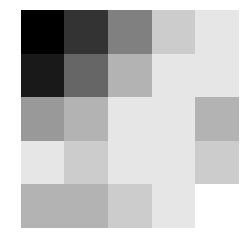

Kernel at coords 123,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     3.     2.     0.   254. ]
 [   4.     2.     1.     0.   127.5]
 [   0.5    0.   127.5    0.     1.5]
 [ 126.     0.     0.   127.5    0.5]
 [ 254.     1.     1.   255.   255. ]]/[[   3.     3.     2.5    1.     0. ]
 [   1.     1.5    1.   127.   254. ]
 [ 255.     0.     0.5  127.5  255. ]
 [   0.     0.5    1.     1.     1. ]
 [   3.     2.     0.     0.     1. ]]
Angle=41.782033554742014


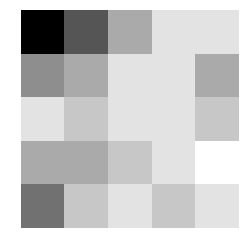

Kernel at coords 124,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     1.     0.     0.     1. ]
 [   0.5    0.   127.5    0.     1.5]
 [ 126.     0.     0.   127.5    0.5]
 [ 127.     0.5    0.5    1.     2. ]
 [   0.     0.     0.     3.     5. ]]/[[   1.     1.5    1.   127.   254. ]
 [ 255.     0.     0.5  127.5  255. ]
 [   0.     0.5    1.     1.     1. ]
 [   3.     2.     0.     0.     1. ]
 [   3.     2.     1.5    2.5    3. ]]
Angle=52.113210705369546


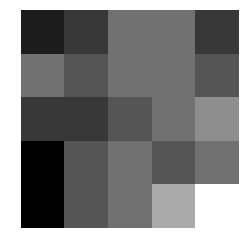

Kernel at coords 125,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.   255.     0.     2. ]
 [ 126.     0.     0.   127.5    0.5]
 [ 127.     0.5    0.5    1.     2. ]
 [   1.   127.   127.     1.     2.5]
 [   2.   254.   254.   255.     0. ]]/[[ 255.     0.     0.5  127.5  255. ]
 [   0.     0.5    1.     1.     1. ]
 [   3.     2.     0.     0.     1. ]
 [   3.     2.     1.5    2.5    3. ]
 [ 255.     0.     2.     3.5    4. ]]
Angle=37.7946789089989


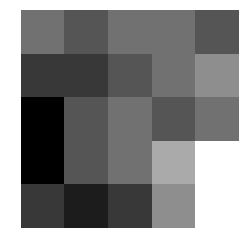

Kernel at coords 126,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     1.     1.   255.   255. ]
 [ 127.     0.5    0.5    1.     2. ]
 [   1.   127.   127.     1.     2.5]
 [   3.5    1.   127.5    0.     0. ]
 [   5.     4.     1.     1.     0. ]]/[[   0.     0.5    1.     1.     1. ]
 [   3.     2.     0.     0.     1. ]
 [   3.     2.     1.5    2.5    3. ]
 [ 255.     0.     2.     3.5    4. ]
 [ 254.   126.     0.5    3.     3. ]]
Angle=40.109192200096004


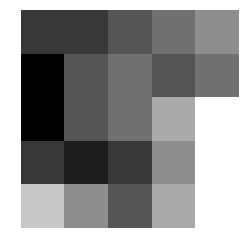

Kernel at coords 127,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     0.     3.     5. ]
 [   1.   127.   127.     1.     2.5]
 [   3.5    1.   127.5    0.     0. ]
 [   2.5    2.     1.     1.   127.5]
 [   0.     0.     1.     1.   255. ]]/[[   3.     2.     0.     0.     1. ]
 [   3.     2.     1.5    2.5    3. ]
 [ 255.     0.     2.     3.5    4. ]
 [ 254.   126.     0.5    3.     3. ]
 [ 254.   126.5    1.     2.     1. ]]
Angle=48.78494257890661


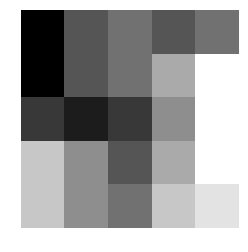

Kernel at coords 128,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.   254.   254.   255.     0. ]
 [   3.5    1.   127.5    0.     0. ]
 [   2.5    2.     1.     1.   127.5]
 [ 125.   127.     0.5    0.5  127.5]
 [ 250.   254.     0.     0.     0. ]]/[[   3.     2.     1.5    2.5    3. ]
 [ 255.     0.     2.     3.5    4. ]
 [ 254.   126.     0.5    3.     3. ]
 [ 254.   126.5    1.     2.     1. ]
 [   2.     1.5    2.     2.     1. ]]
Angle=48.60427711244556


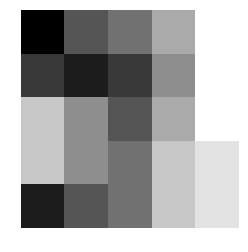

Kernel at coords 129,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     4.     1.     1.     0. ]
 [   2.5    2.     1.     1.   127.5]
 [ 125.   127.     0.5    0.5  127.5]
 [ 126.     0.5    2.     1.     1.5]
 [   2.     3.     4.     2.     3. ]]/[[ 255.     0.     2.     3.5    4. ]
 [ 254.   126.     0.5    3.     3. ]
 [ 254.   126.5    1.     2.     1. ]
 [   2.     1.5    2.     2.     1. ]
 [   3.     2.5    1.5    1.5    2. ]]
Angle=49.78935891452014


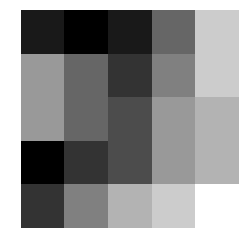

Kernel at coords 130,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     1.     1.   255. ]
 [ 125.   127.     0.5    0.5  127.5]
 [ 126.     0.5    2.     1.     1.5]
 [   2.5    3.     2.5    0.5    0. ]
 [   3.     3.     1.   255.   253. ]]/[[ 254.   126.     0.5    3.     3. ]
 [ 254.   126.5    1.     2.     1. ]
 [   2.     1.5    2.     2.     1. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   3.     1.5  127.5  127.5    0. ]]
Angle=48.485807840293


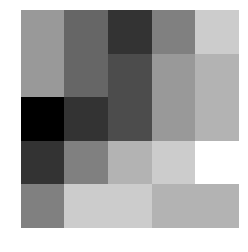

Kernel at coords 131,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 250.   254.     0.     0.     0. ]
 [ 126.     0.5    2.     1.     1.5]
 [   2.5    3.     2.5    0.5    0. ]
 [   1.5    1.5    0.5    0.5    0.5]
 [   0.     0.     0.     2.     4. ]]/[[ 254.   126.5    1.     2.     1. ]
 [   2.     1.5    2.     2.     1. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   3.     1.5  127.5  127.5    0. ]
 [   3.     1.5    0.5    1.5    2. ]]
Angle=58.419129856301254


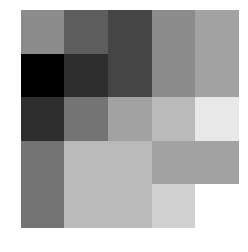

Kernel at coords 132,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     3.     4.     2.     3. ]
 [   2.5    3.     2.5    0.5    0. ]
 [   1.5    1.5    0.5    0.5    0.5]
 [ 126.   124.5  127.     1.5    1.5]
 [ 252.   249.   254.     1.   255. ]]/[[   2.     1.5    2.     2.     1. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   3.     1.5  127.5  127.5    0. ]
 [   3.     1.5    0.5    1.5    2. ]
 [   0.     2.5    4.5    2.     0. ]]
Angle=35.90057904210987


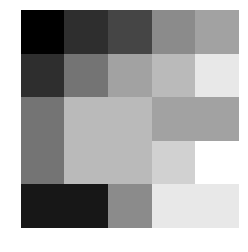

Kernel at coords 133,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.     1.   255.   253. ]
 [   1.5    1.5    0.5    0.5    0.5]
 [ 126.   124.5  127.     1.5    1.5]
 [   0.5  126.5    0.     0.   126.5]
 [   5.     4.     2.   255.   254. ]]/[[   3.     2.5    1.5    1.5    2. ]
 [   3.     1.5  127.5  127.5    0. ]
 [   3.     1.5    0.5    1.5    2. ]
 [   0.     2.5    4.5    2.     0. ]
 [ 255.     1.     2.     0.   255. ]]
Angle=36.17834375553357


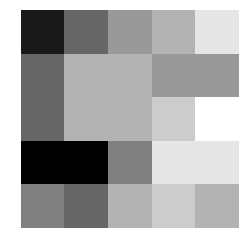

Kernel at coords 134,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     0.     2.     4. ]
 [ 126.   124.5  127.     1.5    1.5]
 [   0.5  126.5    0.     0.   126.5]
 [   3.     3.5    0.   126.     0. ]
 [   1.     3.   254.   253.     2. ]]/[[   3.     1.5  127.5  127.5    0. ]
 [   3.     1.5    0.5    1.5    2. ]
 [   0.     2.5    4.5    2.     0. ]
 [ 255.     1.     2.     0.   255. ]
 [   1.   127.5  127.     2.     4. ]]
Angle=46.00079079437409


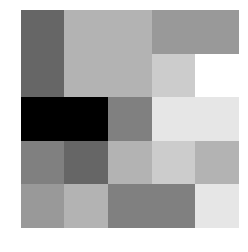

Kernel at coords 135,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   249.   254.     1.   255. ]
 [   0.5  126.5    0.     0.   126.5]
 [   3.     3.5    0.   126.     0. ]
 [   2.     2.   127.5    0.5    2. ]
 [   3.     1.     1.     4.     2. ]]/[[   3.     1.5    0.5    1.5    2. ]
 [   0.     2.5    4.5    2.     0. ]
 [ 255.     1.     2.     0.   255. ]
 [   1.   127.5  127.     2.     4. ]
 [ 255.   126.5    0.5    2.5    2. ]]
Angle=44.267952922849084


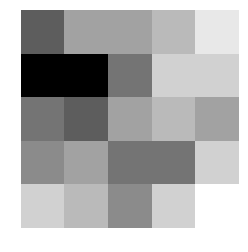

Kernel at coords 136,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     4.     2.   255.   254. ]
 [   3.     3.5    0.   126.     0. ]
 [   2.     2.   127.5    0.5    2. ]
 [   0.5  126.     1.     4.     2. ]
 [ 254.   251.     1.     4.     2. ]]/[[   0.     2.5    4.5    2.     0. ]
 [ 255.     1.     2.     0.   255. ]
 [   1.   127.5  127.     2.     4. ]
 [ 255.   126.5    0.5    2.5    2. ]
 [ 252.     0.     5.     3.     0. ]]
Angle=43.304847115316555


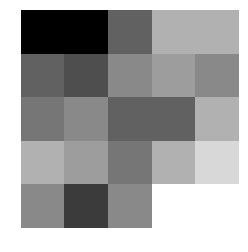

Kernel at coords 137,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     3.   254.   253.     2. ]
 [   2.     2.   127.5    0.5    2. ]
 [   0.5  126.     1.     4.     2. ]
 [   0.5  127.5    2.     2.     0.5]
 [   3.     4.     3.     0.   255. ]]/[[ 255.     1.     2.     0.   255. ]
 [   1.   127.5  127.     2.     4. ]
 [ 255.   126.5    0.5    2.5    2. ]
 [ 252.     0.     5.     3.     0. ]
 [ 253.     0.     3.     1.   255. ]]
Angle=48.81806241595322


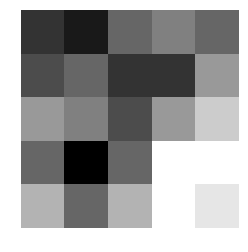

Kernel at coords 138,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     1.     1.     4.     2. ]
 [   0.5  126.     1.     4.     2. ]
 [   0.5  127.5    2.     2.     0.5]
 [ 127.     3.     0.   125.     0. ]
 [ 251.     2.   253.   250.     1. ]]/[[   1.   127.5  127.     2.     4. ]
 [ 255.   126.5    0.5    2.5    2. ]
 [ 252.     0.     5.     3.     0. ]
 [ 253.     0.     3.     1.   255. ]
 [   4.     1.   127.     3.     6. ]]
Angle=44.78649732859355


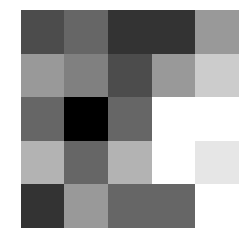

Kernel at coords 139,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   251.     1.     4.     2. ]
 [   0.5  127.5    2.     2.     0.5]
 [ 127.     3.     0.   125.     0. ]
 [ 125.5  127.5    0.5  127.5  127.5]
 [   0.   253.     4.     5.   254. ]]/[[ 255.   126.5    0.5    2.5    2. ]
 [ 252.     0.     5.     3.     0. ]
 [ 253.     0.     3.     1.   255. ]
 [   4.     1.   127.     3.     6. ]
 [   1.     3.     3.     0.   255. ]]
Angle=36.09525382329242


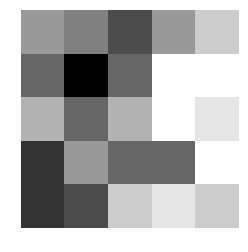

Kernel at coords 140,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     4.     3.     0.   255. ]
 [ 127.     3.     0.   125.     0. ]
 [ 125.5  127.5    0.5  127.5  127.5]
 [   2.5  127.5    3.5    4.   126. ]
 [   5.     2.     3.     3.   254. ]]/[[ 252.     0.     5.     3.     0. ]
 [ 253.     0.     3.     1.   255. ]
 [   4.     1.   127.     3.     6. ]
 [   1.     3.     3.     0.   255. ]
 [ 254.     2.     3.5  125.5  250. ]]
Angle=40.88604754781453


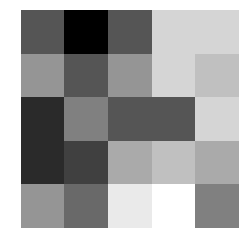

Kernel at coords 141,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.     2.   253.   250.     1. ]
 [ 125.5  127.5    0.5  127.5  127.5]
 [   2.5  127.5    3.5    4.   126. ]
 [   2.5    1.     0.5    0.   127. ]
 [   0.     0.   254.   253.     0. ]]/[[ 253.     0.     3.     1.   255. ]
 [   4.     1.   127.     3.     6. ]
 [   1.     3.     3.     0.   255. ]
 [ 254.     2.     3.5  125.5  250. ]
 [ 254.     1.     2.   126.5  253. ]]
Angle=41.77140333646561


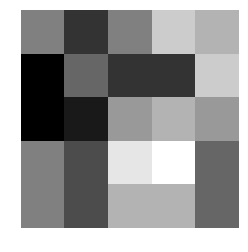

Kernel at coords 142,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   253.     4.     5.   254. ]
 [   2.5  127.5    3.5    4.   126. ]
 [   2.5    1.     0.5    0.   127. ]
 [ 126.     0.   124.5  124.     2.5]
 [ 252.     0.   251.   251.     5. ]]/[[   4.     1.   127.     3.     6. ]
 [   1.     3.     3.     0.   255. ]
 [ 254.     2.     3.5  125.5  250. ]
 [ 254.     1.     2.   126.5  253. ]
 [   2.     0.5  127.5    3.5    7. ]]
Angle=47.52769234004597


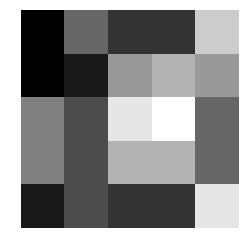

Kernel at coords 143,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     2.     3.     3.   254. ]
 [   2.5    1.     0.5    0.   127. ]
 [ 126.     0.   124.5  124.     2.5]
 [ 127.     0.5  125.5  125.5    2.5]
 [   2.     1.     0.     0.     0. ]]/[[   1.     3.     3.     0.   255. ]
 [ 254.     2.     3.5  125.5  250. ]
 [ 254.     1.     2.   126.5  253. ]
 [   2.     0.5  127.5    3.5    7. ]
 [   1.   127.5  127.     3.5    7. ]]
Angle=55.379957756231576


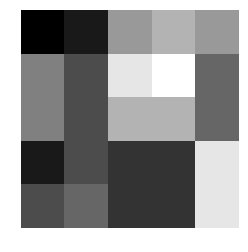

Kernel at coords 144,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.   254.   253.     0. ]
 [ 126.     0.   124.5  124.     2.5]
 [ 127.     0.5  125.5  125.5    2.5]
 [   3.     0.5    2.5    2.   125.5]
 [   4.     0.     5.     4.   251. ]]/[[ 254.     2.     3.5  125.5  250. ]
 [ 254.     1.     2.   126.5  253. ]
 [   2.     0.5  127.5    3.5    7. ]
 [   1.   127.5  127.     3.5    7. ]
 [ 253.     0.     1.   126.5  254. ]]
Angle=49.77908171513111


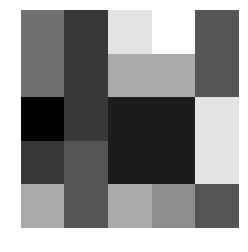

Kernel at coords 145,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     0.   251.   251.     5. ]
 [ 127.     0.5  125.5  125.5    2.5]
 [   3.     0.5    2.5    2.   125.5]
 [   2.     0.     3.     3.   125.5]
 [   0.     0.     1.     2.     0. ]]/[[ 254.     1.     2.   126.5  253. ]
 [   2.     0.5  127.5    3.5    7. ]
 [   1.   127.5  127.     3.5    7. ]
 [ 253.     0.     1.   126.5  254. ]
 [ 253.     0.5    2.   126.   252. ]]
Angle=54.319297874819675


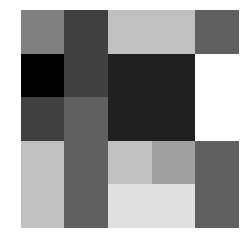

Kernel at coords 146,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.     0.     0.     0. ]
 [   3.     0.5    2.5    2.   125.5]
 [   2.     0.     3.     3.   125.5]
 [ 126.5    0.     0.5    1.     3.5]
 [ 253.     0.     0.     0.     7. ]]/[[   2.     0.5  127.5    3.5    7. ]
 [   1.   127.5  127.     3.5    7. ]
 [ 253.     0.     1.   126.5  254. ]
 [ 253.     0.5    2.   126.   252. ]
 [   0.     2.     2.     1.5    3. ]]
Angle=62.550871906944394


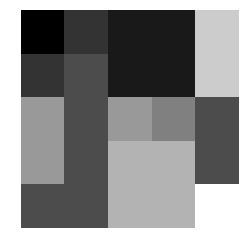

Kernel at coords 147,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     0.     5.     4.   251. ]
 [   2.     0.     3.     3.   125.5]
 [ 126.5    0.     0.5    1.     3.5]
 [   0.     1.5    0.     1.5    5. ]
 [   3.     3.     0.     3.     3. ]]/[[   1.   127.5  127.     3.5    7. ]
 [ 253.     0.     1.   126.5  254. ]
 [ 253.     0.5    2.   126.   252. ]
 [   0.     2.     2.     1.5    3. ]
 [   0.     0.5    2.     3.     3. ]]
Angle=52.46397116034626


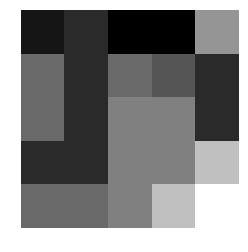

Kernel at coords 148,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     1.     2.     0. ]
 [ 126.5    0.     0.5    1.     3.5]
 [   0.     1.5    0.     1.5    5. ]
 [   2.     3.5    1.     1.5    1. ]
 [   1.     4.     2.     0.   255. ]]/[[ 253.     0.     1.   126.5  254. ]
 [ 253.     0.5    2.   126.   252. ]
 [   0.     2.     2.     1.5    3. ]
 [   0.     0.5    2.     3.     3. ]
 [   3.     1.     0.     1.5    2. ]]
Angle=52.9580820174989


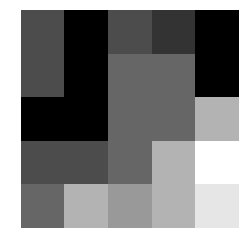

Kernel at coords 149,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.     0.     0.     0.     7. ]
 [   0.     1.5    0.     1.5    5. ]
 [   2.     3.5    1.     1.5    1. ]
 [   1.5    3.5    1.5  127.5  127.5]
 [   2.     3.     1.   255.     0. ]]/[[ 253.     0.5    2.   126.   252. ]
 [   0.     2.     2.     1.5    3. ]
 [   0.     0.5    2.     3.     3. ]
 [   3.     1.     0.     1.5    2. ]
 [   4.     0.5  126.     1.     3. ]]
Angle=46.50752301534238


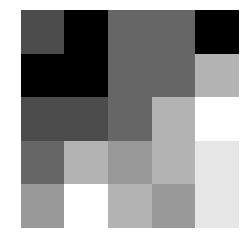

Kernel at coords 150,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.     0.     3.     3. ]
 [   2.     3.5    1.     1.5    1. ]
 [   1.5    3.5    1.5  127.5  127.5]
 [   1.     1.     0.5  127.5  127.5]
 [   0.   255.     0.     0.   255. ]]/[[   0.     2.     2.     1.5    3. ]
 [   0.     0.5    2.     3.     3. ]
 [   3.     1.     0.     1.5    2. ]
 [   4.     0.5  126.     1.     3. ]
 [   3.     0.5  126.5    0.5    2. ]]
Angle=37.89734602080859


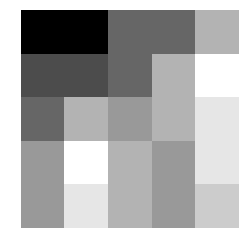

Kernel at coords 151,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     4.     2.     0.   255. ]
 [   1.5    3.5    1.5  127.5  127.5]
 [   1.     1.     0.5  127.5  127.5]
 [   0.   125.5  127.5    0.   126.5]
 [   0.   252.   255.     0.   254. ]]/[[   0.     0.5    2.     3.     3. ]
 [   3.     1.     0.     1.5    2. ]
 [   4.     0.5  126.     1.     3. ]
 [   3.     0.5  126.5    0.5    2. ]
 [ 255.     0.     0.5    0.     0. ]]
Angle=29.354865886355487


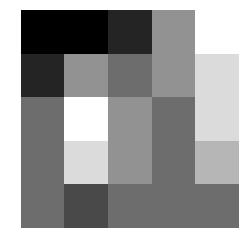

Kernel at coords 152,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     3.     1.   255.     0. ]
 [   1.     1.     0.5  127.5  127.5]
 [   0.   125.5  127.5    0.   126.5]
 [   0.   125.   126.5    0.   126.5]
 [   0.   254.   254.     0.   255. ]]/[[   3.     1.     0.     1.5    2. ]
 [   4.     0.5  126.     1.     3. ]
 [   3.     0.5  126.5    0.5    2. ]
 [ 255.     0.     0.5    0.     0. ]
 [ 253.   127.     1.5    0.5  255. ]]
Angle=37.08875872212728


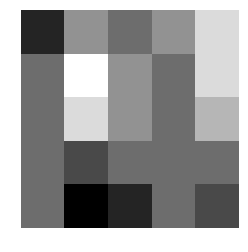

Kernel at coords 153,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   255.     0.     0.   255. ]
 [   0.   125.5  127.5    0.   126.5]
 [   0.   125.   126.5    0.   126.5]
 [ 127.5  127.5  127.   127.5    0. ]
 [ 255.     1.     0.   255.     1. ]]/[[   4.     0.5  126.     1.     3. ]
 [   3.     0.5  126.5    0.5    2. ]
 [ 255.     0.     0.5    0.     0. ]
 [ 253.   127.     1.5    0.5  255. ]
 [ 255.   127.5    0.5    1.     1. ]]
Angle=42.229580939648166


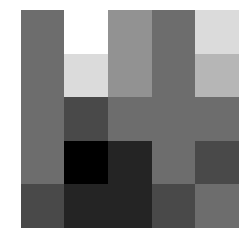

Kernel at coords 154,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   252.   255.     0.   254. ]
 [   0.   125.   126.5    0.   126.5]
 [ 127.5  127.5  127.   127.5    0. ]
 [ 127.     1.5    0.5  127.     1. ]
 [ 255.     2.     1.   255.     1. ]]/[[   3.     0.5  126.5    0.5    2. ]
 [ 255.     0.     0.5    0.     0. ]
 [ 253.   127.     1.5    0.5  255. ]
 [ 255.   127.5    0.5    1.     1. ]
 [   2.     0.5  127.     1.     3. ]]
Angle=36.6138155768473


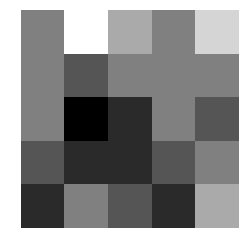

Kernel at coords 155,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   254.   254.     0.   255. ]
 [ 127.5  127.5  127.   127.5    0. ]
 [ 127.     1.5    0.5  127.     1. ]
 [   0.     1.     0.5    0.5    2. ]
 [   1.     0.     0.     2.     3. ]]/[[ 255.     0.     0.5    0.     0. ]
 [ 253.   127.     1.5    0.5  255. ]
 [ 255.   127.5    0.5    1.     1. ]
 [   2.     0.5  127.     1.     3. ]
 [   1.     0.     0.     2.5    4. ]]
Angle=40.320492542816645


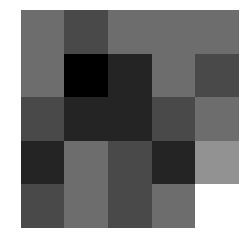

Kernel at coords 156,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     0.   255.     1. ]
 [ 127.     1.5    0.5  127.     1. ]
 [   0.     1.     0.5    0.5    2. ]
 [ 127.5    0.     0.5    1.     1. ]
 [ 254.     0.     1.     0.   255. ]]/[[ 253.   127.     1.5    0.5  255. ]
 [ 255.   127.5    0.5    1.     1. ]
 [   2.     0.5  127.     1.     3. ]
 [   1.     0.     0.     2.5    4. ]
 [   3.     1.5    0.     1.5    3. ]]
Angle=48.38238980557103


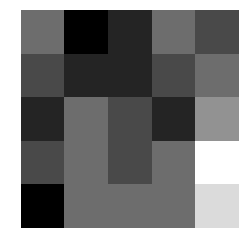

Kernel at coords 157,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     2.     1.   255.     1. ]
 [   0.     1.     0.5    0.5    2. ]
 [ 127.5    0.     0.5    1.     1. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 255.     0.     1.     1.     0. ]]/[[ 255.   127.5    0.5    1.     1. ]
 [   2.     0.5  127.     1.     3. ]
 [   1.     0.     0.     2.5    4. ]
 [   3.     1.5    0.     1.5    3. ]
 [   4.     2.5    0.5    1.     2. ]]
Angle=43.73289374911734


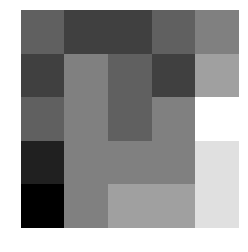

Kernel at coords 158,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     0.     2.     3. ]
 [ 127.5    0.     0.5    1.     1. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 127.5    0.     1.     1.     0.5]
 [   0.     0.     1.     1.     1. ]]/[[   2.     0.5  127.     1.     3. ]
 [   1.     0.     0.     2.5    4. ]
 [   3.     1.5    0.     1.5    3. ]
 [   4.     2.5    0.5    1.     2. ]
 [   4.     3.     1.     1.     2. ]]
Angle=47.865755011781445


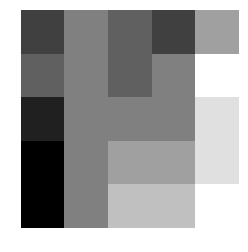

Kernel at coords 159,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     0.     1.     0.   255. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 127.5    0.     1.     1.     0.5]
 [   1.5    0.5    1.     1.     1. ]
 [   3.     1.     1.     1.     1. ]]/[[ 1.   0.   0.   2.5  4. ]
 [ 3.   1.5  0.   1.5  3. ]
 [ 4.   2.5  0.5  1.   2. ]
 [ 4.   3.   1.   1.   2. ]
 [ 2.   2.   1.   1.   2. ]]
Angle=41.94792051738773


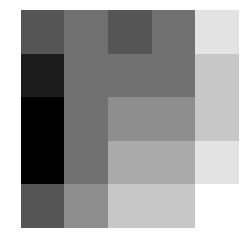

Kernel at coords 160,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     1.     1.     0. ]
 [ 127.5    0.     1.     1.     0.5]
 [   1.5    0.5    1.     1.     1. ]
 [   4.5    1.5    0.5    1.     0.5]
 [   6.     2.     0.     1.     0. ]]/[[   3.     1.5    0.     1.5    3. ]
 [   4.     2.5    0.5    1.     2. ]
 [   4.     3.     1.     1.     2. ]
 [   2.     2.     1.     1.     2. ]
 [ 254.   127.     0.5    1.     1. ]]
Angle=57.7584866927034


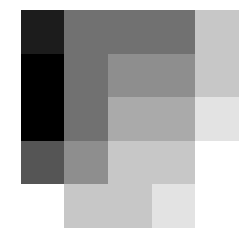

Kernel at coords 161,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 0.   0.   1.   1.   1. ]
 [ 1.5  0.5  1.   1.   1. ]
 [ 4.5  1.5  0.5  1.   0.5]
 [ 3.5  1.   0.5  1.   0. ]
 [ 1.   0.   1.   1.   0. ]]/[[   4.     2.5    0.5    1.     2. ]
 [   4.     3.     1.     1.     2. ]
 [   2.     2.     1.     1.     2. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 253.   127.     1.     0.5    0. ]]
Angle=59.60023470191632


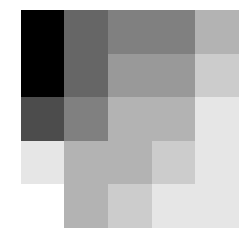

Kernel at coords 162,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     1.     1.     1.     1. ]
 [   4.5    1.5    0.5    1.     0.5]
 [   3.5    1.     0.5    1.     0. ]
 [   0.   127.5    0.5    1.   127.5]
 [ 255.   255.     0.     1.   255. ]]/[[   4.     3.     1.     1.     2. ]
 [   2.     2.     1.     1.     2. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 253.   127.     1.     0.5    0. ]
 [ 253.   127.5    2.     0.   254. ]]
Angle=53.17980598459261


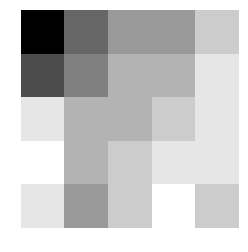

Kernel at coords 163,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.     2.     0.     1.     0. ]
 [   3.5    1.     0.5    1.     0. ]
 [   0.   127.5    0.5    1.   127.5]
 [ 127.     0.   127.   127.     0. ]
 [ 255.     1.   254.   253.     1. ]]/[[   2.     2.     1.     1.     2. ]
 [ 254.   127.     0.5    1.     1. ]
 [ 253.   127.     1.     0.5    0. ]
 [ 253.   127.5    2.     0.   254. ]
 [ 255.   127.     0.     1.5    2. ]]
Angle=52.58607784893399


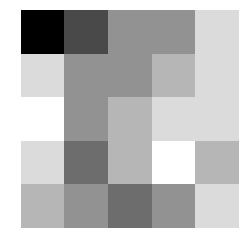

Kernel at coords 164,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     1.     1.     0. ]
 [   0.   127.5    0.5    1.   127.5]
 [ 127.     0.   127.   127.     0. ]
 [ 125.   126.5  126.   126.     0.5]
 [ 251.   252.   254.   255.     0. ]]/[[ 254.   127.     0.5    1.     1. ]
 [ 253.   127.     1.     0.5    0. ]
 [ 253.   127.5    2.     0.   254. ]
 [ 255.   127.     0.     1.5    2. ]
 [   0.     0.5    1.5    2.5    3. ]]
Angle=43.485289056024506


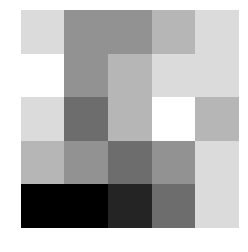

Kernel at coords 165,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     0.     1.   255. ]
 [ 127.     0.   127.   127.     0. ]
 [ 125.   126.5  126.   126.     0.5]
 [ 127.   127.5    0.   127.5  127. ]
 [   3.     3.     2.     0.   254. ]]/[[ 253.   127.     1.     0.5    0. ]
 [ 253.   127.5    2.     0.   254. ]
 [ 255.   127.     0.     1.5    2. ]
 [   0.     0.5    1.5    2.5    3. ]
 [   0.     0.     0.     0.5    1. ]]
Angle=32.02531631889934


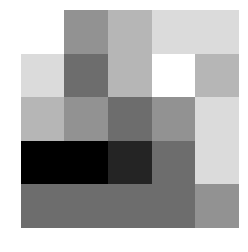

Kernel at coords 166,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.   254.   253.     1. ]
 [ 125.   126.5  126.   126.     0.5]
 [ 127.   127.5    0.   127.5  127. ]
 [   0.5    1.     0.5  127.5  126. ]
 [ 254.   255.   255.   255.   254. ]]/[[ 253.   127.5    2.     0.   254. ]
 [ 255.   127.     0.     1.5    2. ]
 [   0.     0.5    1.5    2.5    3. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     0.5    0.     0.     0. ]]
Angle=20.156561772577387


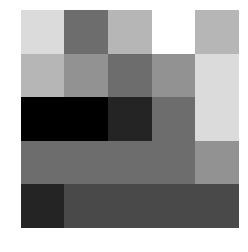

Kernel at coords 167,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   252.   254.   255.     0. ]
 [ 127.   127.5    0.   127.5  127. ]
 [   0.5    1.     0.5  127.5  126. ]
 [ 126.   126.5  127.   127.   127.5]
 [ 254.   254.   255.   255.     1. ]]/[[ 255.   127.     0.     1.5    2. ]
 [   0.     0.5    1.5    2.5    3. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     0.5    1.     2. ]]
Angle=12.832860223151224


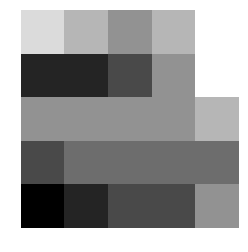

Kernel at coords 168,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.     2.     0.   254. ]
 [   0.5    1.     0.5  127.5  126. ]
 [ 126.   126.5  127.   127.   127.5]
 [   1.     0.5    0.     0.     0.5]
 [   4.     3.     1.     1.     0. ]]/[[   0.     0.5    1.5    2.5    3. ]
 [   0.     0.     0.     0.5    1. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     0.5    1.     2. ]
 [   0.   127.5  127.5    0.5    1. ]]
Angle=31.901440010106718


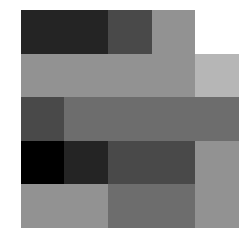

Kernel at coords 169,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.   255.   255.   254. ]
 [ 126.   126.5  127.   127.   127.5]
 [   1.     0.5    0.     0.     0.5]
 [   0.5    0.5    0.     0.5    0.5]
 [ 253.   254.   255.     0.     1. ]]/[[   0.     0.     0.     0.5    1. ]
 [   1.     0.5    0.     0.     0. ]
 [   1.     1.     0.5    1.     2. ]
 [   0.   127.5  127.5    0.5    1. ]
 [   1.     0.5    0.5    1.5    2. ]]
Angle=32.30058444090236


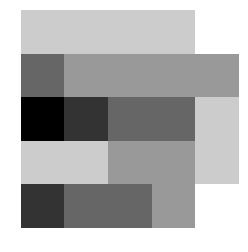

Kernel at coords 170,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   255.   255.     1. ]
 [   1.     0.5    0.     0.     0.5]
 [   0.5    0.5    0.     0.5    0.5]
 [ 125.5  126.   126.5  127.5    0.5]
 [ 254.   254.   254.   255.     0. ]]/[[   1.     0.5    0.     0.     0. ]
 [   1.     1.     0.5    1.     2. ]
 [   0.   127.5  127.5    0.5    1. ]
 [   1.     0.5    0.5    1.5    2. ]
 [   1.     0.5    1.     2.5    3. ]]
Angle=32.86484457963901


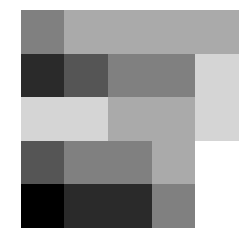

Kernel at coords 171,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     3.     1.     1.     0. ]
 [   0.5    0.5    0.     0.5    0.5]
 [ 125.5  126.   126.5  127.5    0.5]
 [ 127.5  126.5  127.   127.5  127. ]
 [   1.   255.     0.     0.   254. ]]/[[   1.     1.     0.5    1.     2. ]
 [   0.   127.5  127.5    0.5    1. ]
 [   1.     0.5    0.5    1.5    2. ]
 [   1.     0.5    1.     2.5    3. ]
 [ 255.     0.     1.5    1.5    1. ]]
Angle=33.33596027697656


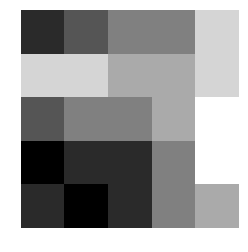

Kernel at coords 172,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   254.   255.     0.     1. ]
 [ 125.5  126.   126.5  127.5    0.5]
 [ 127.5  126.5  127.   127.5  127. ]
 [ 127.5    0.5    2.     2.   127.5]
 [ 254.     2.     4.     4.     1. ]]/[[   0.   127.5  127.5    0.5    1. ]
 [   1.     0.5    0.5    1.5    2. ]
 [   1.     0.5    1.     2.5    3. ]
 [ 255.     0.     1.5    1.5    1. ]
 [   3.     3.     2.5    0.   254. ]]
Angle=23.430497036080624


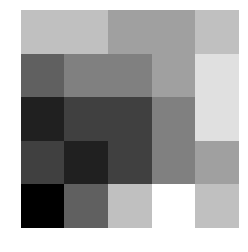

Kernel at coords 173,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   254.   255.     0. ]
 [ 127.5  126.5  127.   127.5  127. ]
 [ 127.5    0.5    2.     2.   127.5]
 [ 127.     1.5    3.5    3.     1.5]
 [   0.     1.     3.     2.     2. ]]/[[   1.     0.5    0.5    1.5    2. ]
 [   1.     0.5    1.     2.5    3. ]
 [ 255.     0.     1.5    1.5    1. ]
 [   3.     3.     2.5    0.   254. ]
 [   4.     4.5    3.   127.5  254. ]]
Angle=32.52498355299841


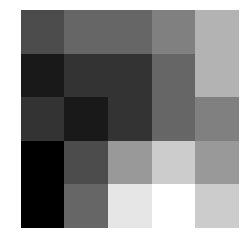

Kernel at coords 174,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.     0.     0.   254. ]
 [ 127.5    0.5    2.     2.   127.5]
 [ 127.     1.5    3.5    3.     1.5]
 [   1.     1.     0.5    0.     2. ]
 [   2.     1.   254.   254.     2. ]]/[[   1.     0.5    1.     2.5    3. ]
 [ 255.     0.     1.5    1.5    1. ]
 [   3.     3.     2.5    0.   254. ]
 [   4.     4.5    3.   127.5  254. ]
 [   3.     2.5    1.5    1.5    2. ]]
Angle=45.48429340076209


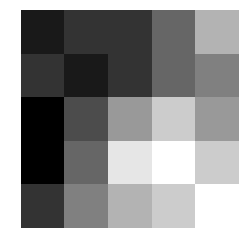

Kernel at coords 175,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     2.     4.     4.     1. ]
 [ 127.     1.5    3.5    3.     1.5]
 [   1.     1.     0.5    0.     2. ]
 [   2.     0.5  126.5  126.     0.5]
 [   2.     0.   255.   254.   255. ]]/[[ 255.     0.     1.5    1.5    1. ]
 [   3.     3.     2.5    0.   254. ]
 [   4.     4.5    3.   127.5  254. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   1.     1.     0.5    1.5    3. ]]
Angle=42.58994306363134


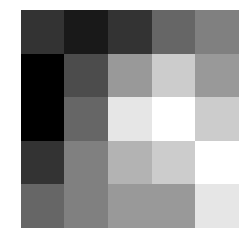

Kernel at coords 176,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     3.     2.     2. ]
 [   1.     1.     0.5    0.     2. ]
 [   2.     0.5  126.5  126.     0.5]
 [   1.     0.5  127.5  127.   126.5]
 [   0.     1.     0.     0.   254. ]]/[[   3.     3.     2.5    0.   254. ]
 [   4.     4.5    3.   127.5  254. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   1.     1.     0.5    1.5    3. ]
 [   2.     1.     0.     0.5    1. ]]
Angle=50.10746368487587


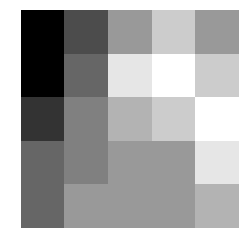

Kernel at coords 177,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.   254.   254.     2. ]
 [   2.     0.5  126.5  126.     0.5]
 [   1.     0.5  127.5  127.   126.5]
 [   0.5    0.5    0.     0.   127. ]
 [   1.     0.     0.     0.     0. ]]/[[   4.     4.5    3.   127.5  254. ]
 [   3.     2.5    1.5    1.5    2. ]
 [   1.     1.     0.5    1.5    3. ]
 [   2.     1.     0.     0.5    1. ]
 [   1.     0.5    0.     0.5    1. ]]
Angle=45.02627176225333


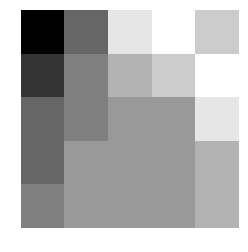

Kernel at coords 178,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.   255.   254.   255. ]
 [   1.     0.5  127.5  127.   126.5]
 [   0.5    0.5    0.     0.   127. ]
 [   1.   127.5  127.5  127.5    0. ]
 [   1.   255.   255.   255.     0. ]]/[[   3.     2.5    1.5    1.5    2. ]
 [   1.     1.     0.5    1.5    3. ]
 [   2.     1.     0.     0.5    1. ]
 [   1.     0.5    0.     0.5    1. ]
 [ 255.   127.5    0.     1.     2. ]]
Angle=33.19975305283389


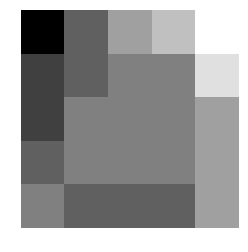

Kernel at coords 179,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     0.     0.   254. ]
 [   0.5    0.5    0.     0.   127. ]
 [   1.   127.5  127.5  127.5    0. ]
 [ 127.   125.5  127.     1.     1.5]
 [ 253.   252.   255.     3.     3. ]]/[[   1.     1.     0.5    1.5    3. ]
 [   2.     1.     0.     0.5    1. ]
 [   1.     0.5    0.     0.5    1. ]
 [ 255.   127.5    0.     1.     2. ]
 [ 254.     0.5    3.5    3.     2. ]]
Angle=40.51147806613412


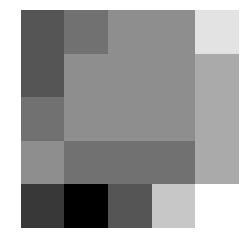

Kernel at coords 180,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     0.     0.     0. ]
 [   1.   127.5  127.5  127.5    0. ]
 [ 127.   125.5  127.     1.     1.5]
 [ 127.5    0.     1.5    2.5    1.5]
 [   2.     4.     4.     2.     0. ]]/[[   2.     1.     0.     0.5    1. ]
 [   1.     0.5    0.     0.5    1. ]
 [ 255.   127.5    0.     1.     2. ]
 [ 254.     0.5    3.5    3.     2. ]
 [   0.     1.5    2.5    1.     0. ]]
Angle=43.143578194411546


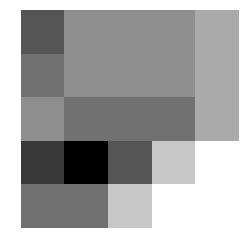

Kernel at coords 181,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   255.   255.     0. ]
 [ 127.   125.5  127.     1.     1.5]
 [ 127.5    0.     1.5    2.5    1.5]
 [   3.5    4.5    3.5    1.5    0. ]
 [   5.     5.     3.     1.     0. ]]/[[   1.     0.5    0.     0.5    1. ]
 [ 255.   127.5    0.     1.     2. ]
 [ 254.     0.5    3.5    3.     2. ]
 [   0.     1.5    2.5    1.     0. ]
 [   0.     0.5    0.5  127.5  255. ]]
Angle=37.92758316618153


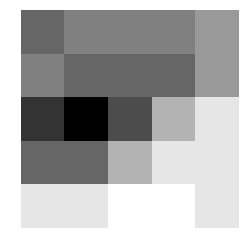

Kernel at coords 182,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   252.   255.     3.     3. ]
 [ 127.5    0.     1.5    2.5    1.5]
 [   3.5    4.5    3.5    1.5    0. ]
 [   2.     2.     0.5    0.     0.5]
 [ 255.   255.   254.   255.     1. ]]/[[ 255.   127.5    0.     1.     2. ]
 [ 254.     0.5    3.5    3.     2. ]
 [   0.     1.5    2.5    1.     0. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   0.     0.     0.5    1.     1. ]]
Angle=32.783305055018275


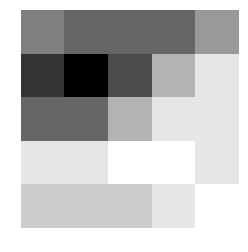

Kernel at coords 183,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     4.     4.     2.     0. ]
 [   3.5    4.5    3.5    1.5    0. ]
 [   2.     2.     0.5    0.     0.5]
 [ 126.5  126.5  126.5  127.     1. ]
 [ 254.   254.   255.   255.     1. ]]/[[ 254.     0.5    3.5    3.     2. ]
 [   0.     1.5    2.5    1.     0. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   0.     0.     0.5    1.     1. ]
 [   0.     0.5    1.     2.     3. ]]
Angle=29.15143308221249


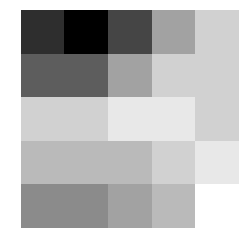

Kernel at coords 184,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.     5.     3.     1.     0. ]
 [   2.     2.     0.5    0.     0.5]
 [ 126.5  126.5  126.5  127.     1. ]
 [   1.     1.     2.     1.     0. ]
 [   4.     4.     5.     3.   255. ]]/[[   0.     1.5    2.5    1.     0. ]
 [   0.     0.5    0.5  127.5  255. ]
 [   0.     0.     0.5    1.     1. ]
 [   0.     0.5    1.     2.     3. ]
 [   0.     1.     0.5  127.   255. ]]
Angle=29.842600520012088


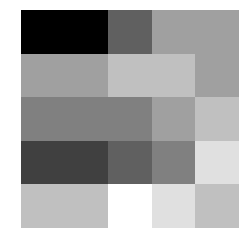

Kernel at coords 185,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.   254.   255.     1. ]
 [ 126.5  126.5  126.5  127.     1. ]
 [   1.     1.     2.     1.     0. ]
 [   2.5    3.     3.     2.5    0. ]
 [   1.     2.     1.     2.     1. ]]/[[   0.     0.5    0.5  127.5  255. ]
 [   0.     0.     0.5    1.     1. ]
 [   0.     0.5    1.     2.     3. ]
 [   0.     1.     0.5  127.   255. ]
 [   1.     1.     0.5  127.   254. ]]
Angle=34.10320015381356


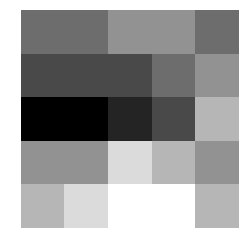

Kernel at coords 186,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   255.   255.     1. ]
 [   1.     1.     2.     1.     0. ]
 [   2.5    3.     3.     2.5    0. ]
 [ 126.5  126.   126.     0.5    1. ]
 [ 252.   250.   251.   255.     1. ]]/[[   0.     0.     0.5    1.     1. ]
 [   0.     0.5    1.     2.     3. ]
 [   0.     1.     0.5  127.   255. ]
 [   1.     1.     0.5  127.   254. ]
 [ 255.     0.5    3.     2.     0. ]]
Angle=27.437730061292424


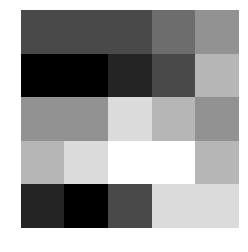

Kernel at coords 187,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     4.     5.     3.   255. ]
 [   2.5    3.     3.     2.5    0. ]
 [ 126.5  126.   126.     0.5    1. ]
 [ 125.5  126.   124.   127.     1. ]
 [ 255.     2.   253.   255.     1. ]]/[[   0.     0.5    1.     2.     3. ]
 [   0.     1.     0.5  127.   255. ]
 [   1.     1.     0.5  127.   254. ]
 [ 255.     0.5    3.     2.     0. ]
 [   2.   127.5    1.5    4.     2. ]]
Angle=26.43150204877082


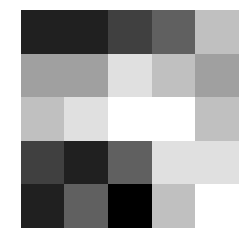

Kernel at coords 188,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     2.     1.     2.     1. ]
 [ 126.5  126.   126.     0.5    1. ]
 [ 125.5  126.   124.   127.     1. ]
 [ 127.     0.5    1.   127.5  127.5]
 [ 255.   255.     5.     0.   254. ]]/[[   0.     1.     0.5  127.   255. ]
 [   1.     1.     0.5  127.   254. ]
 [ 255.     0.5    3.     2.     0. ]
 [   2.   127.5    1.5    4.     2. ]
 [   2.     2.5    2.     0.5    0. ]]
Angle=29.659747600333603


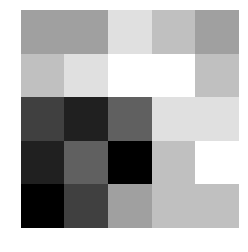

Kernel at coords 189,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   250.   251.   255.     1. ]
 [ 125.5  126.   124.   127.     1. ]
 [ 127.     0.5    1.   127.5  127.5]
 [   0.   127.     3.   126.   125. ]
 [   1.   255.     1.   252.   252. ]]/[[   1.     1.     0.5  127.   254. ]
 [ 255.     0.5    3.     2.     0. ]
 [   2.   127.5    1.5    4.     2. ]
 [   2.     2.5    2.     0.5    0. ]
 [   0.     2.5    0.5  126.     0. ]]
Angle=20.462053159691028


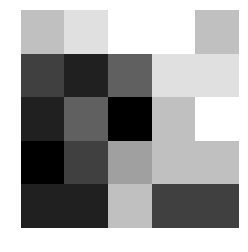

Kernel at coords 190,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     2.   253.   255.     1. ]
 [ 127.     0.5    1.   127.5  127.5]
 [   0.   127.     3.   126.   125. ]
 [   2.5    0.5  127.5  124.5  125. ]
 [   4.     2.   254.   253.   254. ]]/[[ 255.     0.5    3.     2.     0. ]
 [   2.   127.5    1.5    4.     2. ]
 [   2.     2.5    2.     0.5    0. ]
 [   0.     2.5    0.5  126.     0. ]
 [ 254.   127.5  126.   126.     1. ]]
Angle=27.6173766417284


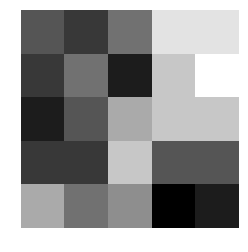

Kernel at coords 191,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     5.     0.   254. ]
 [   0.   127.     3.   126.   125. ]
 [   2.5    0.5  127.5  124.5  125. ]
 [   2.5    3.5  126.5    0.     0. ]
 [   1.     5.   255.     3.     2. ]]/[[   2.   127.5    1.5    4.     2. ]
 [   2.     2.5    2.     0.5    0. ]
 [   0.     2.5    0.5  126.     0. ]
 [ 254.   127.5  126.   126.     1. ]
 [   2.   126.5  125.   127.5    0. ]]
Angle=42.08621965087341


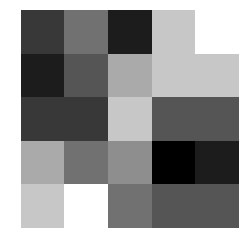

Kernel at coords 192,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.     1.   252.   252. ]
 [   2.5    0.5  127.5  124.5  125. ]
 [   2.5    3.5  126.5    0.     0. ]
 [ 126.5    2.     0.     3.     2. ]
 [ 252.   255.     1.     3.     2. ]]/[[   2.     2.5    2.     0.5    0. ]
 [   0.     2.5    0.5  126.     0. ]
 [ 254.   127.5  126.   126.     1. ]
 [   2.   126.5  125.   127.5    0. ]
 [   5.     1.   127.     0.   255. ]]
Angle=44.146651436849204


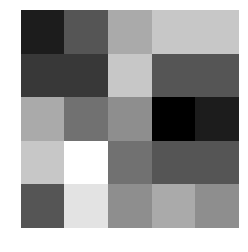

Kernel at coords 193,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     2.   254.   253.   254. ]
 [   2.5    3.5  126.5    0.     0. ]
 [ 126.5    2.     0.     3.     2. ]
 [ 126.   126.     0.5    1.5    1.5]
 [   0.   253.     0.     0.     1. ]]/[[   0.     2.5    0.5  126.     0. ]
 [ 254.   127.5  126.   126.     1. ]
 [   2.   126.5  125.   127.5    0. ]
 [   5.     1.   127.     0.   255. ]
 [   2.     1.     0.5    0.5    0. ]]
Angle=48.06882843327165


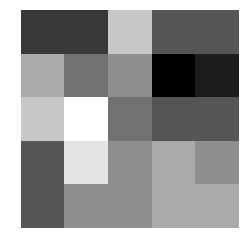

Kernel at coords 194,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     5.   255.     3.     2. ]
 [ 126.5    2.     0.     3.     2. ]
 [ 126.   126.     0.5    1.5    1.5]
 [   2.5  125.5    0.   127.5    2. ]
 [   5.   254.     0.   255.     3. ]]/[[ 254.   127.5  126.   126.     1. ]
 [   2.   126.5  125.   127.5    0. ]
 [   5.     1.   127.     0.   255. ]
 [   2.     1.     0.5    0.5    0. ]
 [ 251.   126.5    1.     2.     4. ]]
Angle=46.323813071412744


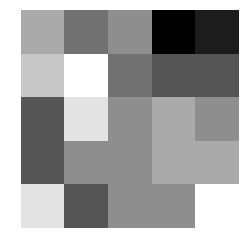

Kernel at coords 195,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   255.     1.     3.     2. ]
 [ 126.   126.     0.5    1.5    1.5]
 [   2.5  125.5    0.   127.5    2. ]
 [   1.5    1.   127.     1.5    2. ]
 [ 254.     4.   254.     4.     1. ]]/[[   2.   126.5  125.   127.5    0. ]
 [   5.     1.   127.     0.   255. ]
 [   2.     1.     0.5    0.5    0. ]
 [ 251.   126.5    1.     2.     4. ]
 [   1.   126.5    1.     3.5    1. ]]
Angle=39.503436104464164


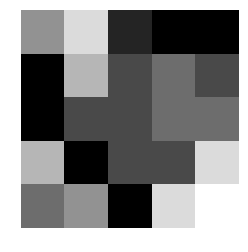

Kernel at coords 196,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   253.     0.     0.     1. ]
 [   2.5  125.5    0.   127.5    2. ]
 [   1.5    1.   127.     1.5    2. ]
 [ 125.5    2.   127.5    1.   127.5]
 [ 253.     0.     1.   254.   254. ]]/[[   5.     1.   127.     0.   255. ]
 [   2.     1.     0.5    0.5    0. ]
 [ 251.   126.5    1.     2.     4. ]
 [   1.   126.5    1.     3.5    1. ]
 [   4.     0.5    0.     2.     1. ]]
Angle=38.066010194467815


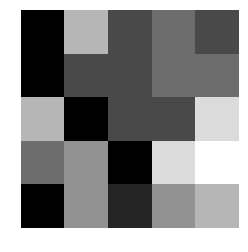

Kernel at coords 197,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   5.   254.     0.   255.     3. ]
 [   1.5    1.   127.     1.5    2. ]
 [ 125.5    2.   127.5    1.   127.5]
 [ 126.5  127.     1.     0.     0. ]
 [   0.   254.     1.     2.     2. ]]/[[   2.     1.     0.5    0.5    0. ]
 [ 251.   126.5    1.     2.     4. ]
 [   1.   126.5    1.     3.5    1. ]
 [   4.     0.5    0.     2.     1. ]
 [   2.     1.     2.     2.5    1. ]]
Angle=39.45866954878895


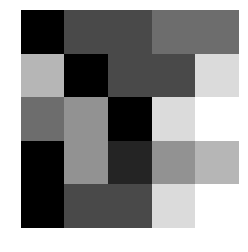

Kernel at coords 198,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     4.   254.     4.     1. ]
 [ 125.5    2.   127.5    1.   127.5]
 [ 126.5  127.     1.     0.     0. ]
 [   2.   127.     0.5    3.     3. ]
 [   4.     0.     0.     4.     4. ]]/[[ 251.   126.5    1.     2.     4. ]
 [   1.   126.5    1.     3.5    1. ]
 [   4.     0.5    0.     2.     1. ]
 [   2.     1.     2.     2.5    1. ]
 [ 254.   127.     4.     4.5    1. ]]
Angle=43.731982839970314


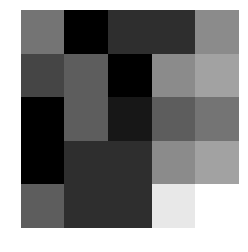

Kernel at coords 199,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.     0.     1.   254.   254. ]
 [ 126.5  127.     1.     0.     0. ]
 [   2.   127.     0.5    3.     3. ]
 [   3.5    1.     1.     2.     2. ]
 [   3.     2.     2.     0.     0. ]]/[[   1.   126.5    1.     3.5    1. ]
 [   4.     0.5    0.     2.     1. ]
 [   2.     1.     2.     2.5    1. ]
 [ 254.   127.     4.     4.5    1. ]
 [ 253.   126.5    3.     3.5    1. ]]
Angle=50.399364276963134


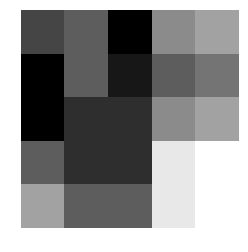

Kernel at coords 200,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   254.     1.     2.     2. ]
 [   2.   127.     0.5    3.     3. ]
 [   3.5    1.     1.     2.     2. ]
 [   0.5    2.     2.5  126.5  126.5]
 [ 254.     2.     3.   253.   253. ]]/[[   4.     0.5    0.     2.     1. ]
 [   2.     1.     2.     2.5    1. ]
 [ 254.   127.     4.     4.5    1. ]
 [ 253.   126.5    3.     3.5    1. ]
 [   1.     1.     0.5    0.5    1. ]]
Angle=38.258592125936204


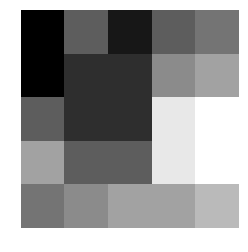

Kernel at coords 201,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.     0.     0.     4.     4. ]
 [   3.5    1.     1.     2.     2. ]
 [   0.5    2.     2.5  126.5  126.5]
 [ 127.     1.5    2.   126.   126. ]
 [   0.     1.     1.   255.   255. ]]/[[   2.     1.     2.     2.5    1. ]
 [ 254.   127.     4.     4.5    1. ]
 [ 253.   126.5    3.     3.5    1. ]
 [   1.     1.     0.5    0.5    1. ]
 [   2.     1.5  127.5  127.5    1. ]]
Angle=45.70621674713597


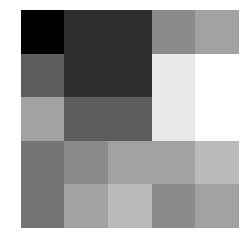

Kernel at coords 202,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.     2.     0.     0. ]
 [   0.5    2.     2.5  126.5  126.5]
 [ 127.     1.5    2.   126.   126. ]
 [   1.     0.     0.5    1.     1. ]
 [   2.   255.     0.     3.     3. ]]/[[ 254.   127.     4.     4.5    1. ]
 [ 253.   126.5    3.     3.5    1. ]
 [   1.     1.     0.5    0.5    1. ]
 [   2.     1.5  127.5  127.5    1. ]
 [ 255.     0.5    1.5    1.     1. ]]
Angle=51.848900731966744


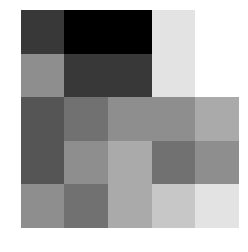

Kernel at coords 203,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     2.     3.   253.   253. ]
 [ 127.     1.5    2.   126.   126. ]
 [   1.     0.     0.5    1.     1. ]
 [   0.   127.5  126.5    0.5    0.5]
 [ 254.     0.   253.   254.   254. ]]/[[ 253.   126.5    3.     3.5    1. ]
 [   1.     1.     0.5    0.5    1. ]
 [   2.     1.5  127.5  127.5    1. ]
 [ 255.     0.5    1.5    1.     1. ]
 [   1.     0.     0.5    1.5    1. ]]
Angle=33.01189422119787


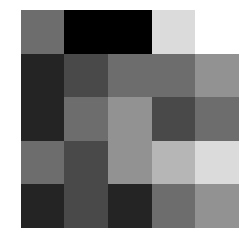

Kernel at coords 204,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     1.   255.   255. ]
 [   1.     0.     0.5    1.     1. ]
 [   0.   127.5  126.5    0.5    0.5]
 [   0.     0.   127.     0.5    0.5]
 [   2.     0.     1.     3.     3. ]]/[[   1.     1.     0.5    0.5    1. ]
 [   2.     1.5  127.5  127.5    1. ]
 [ 255.     0.5    1.5    1.     1. ]
 [   1.     0.     0.5    1.5    1. ]
 [ 255.   127.5    2.     2.5    1. ]]
Angle=51.35554390851989


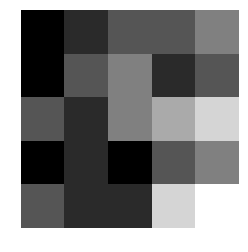

Kernel at coords 205,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.   255.     0.     3.     3. ]
 [   0.   127.5  126.5    0.5    0.5]
 [   0.     0.   127.     0.5    0.5]
 [   1.5    0.     0.     2.5    2.5]
 [   1.     0.   255.     2.     2. ]]/[[   2.     1.5  127.5  127.5    1. ]
 [ 255.     0.5    1.5    1.     1. ]
 [   1.     0.     0.5    1.5    1. ]
 [ 255.   127.5    2.     2.5    1. ]
 [ 254.   126.5    3.     4.     1. ]]
Angle=51.69345834031974


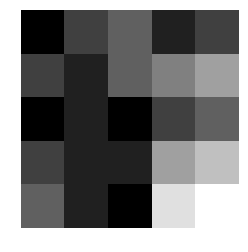

Kernel at coords 206,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     0.   253.   254.   254. ]
 [   0.     0.   127.     0.5    0.5]
 [   1.5    0.     0.     2.5    2.5]
 [   0.     0.   127.5    0.5    1. ]
 [ 255.     0.     0.   255.     0. ]]/[[ 255.     0.5    1.5    1.     1. ]
 [   1.     0.     0.5    1.5    1. ]
 [ 255.   127.5    2.     2.5    1. ]
 [ 254.   126.5    3.     4.     1. ]
 [ 255.   127.     2.5    4.     2. ]]
Angle=52.90859647168259


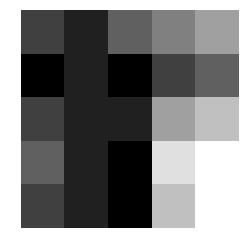

Kernel at coords 207,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.     1.     3.     3. ]
 [   1.5    0.     0.     2.5    2.5]
 [   0.     0.   127.5    0.5    1. ]
 [ 127.5    1.     1.   126.5  127.5]
 [   0.     2.     2.   254.   255. ]]/[[   1.     0.     0.5    1.5    1. ]
 [ 255.   127.5    2.     2.5    1. ]
 [ 254.   126.5    3.     4.     1. ]
 [ 255.   127.     2.5    4.     2. ]
 [   1.     0.     0.5    2.5    3. ]]
Angle=42.91935019435691


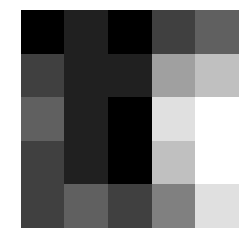

Kernel at coords 208,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.   255.     2.     2. ]
 [   0.     0.   127.5    0.5    1. ]
 [ 127.5    1.     1.   126.5  127.5]
 [ 127.5    1.5    1.5  127.   126.5]
 [ 255.     1.     1.     0.   254. ]]/[[ 255.   127.5    2.     2.5    1. ]
 [ 254.   126.5    3.     4.     1. ]
 [ 255.   127.     2.5    4.     2. ]
 [   1.     0.     0.5    2.5    3. ]
 [   3.     1.     0.     1.     1. ]]
Angle=37.9406076331699


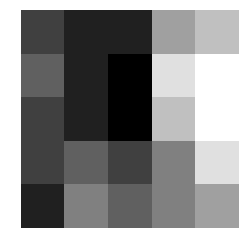

Kernel at coords 209,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     0.   255.     0. ]
 [ 127.5    1.     1.   126.5  127.5]
 [ 127.5    1.5    1.5  127.   126.5]
 [ 126.5  127.5    0.5    1.     0. ]
 [ 254.   254.     0.     2.     2. ]]/[[ 254.   126.5    3.     4.     1. ]
 [ 255.   127.     2.5    4.     2. ]
 [   1.     0.     0.5    2.5    3. ]
 [   3.     1.     0.     1.     1. ]
 [   3.     2.     2.     2.     1. ]]
Angle=34.421987698903614


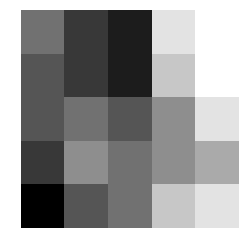

Kernel at coords 210,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     2.     2.   254.   255. ]
 [ 127.5    1.5    1.5  127.   126.5]
 [ 126.5  127.5    0.5    1.     0. ]
 [ 126.   125.5    0.     2.     2. ]
 [ 254.   253.     0.     2.     2. ]]/[[ 255.   127.     2.5    4.     2. ]
 [   1.     0.     0.5    2.5    3. ]
 [   3.     1.     0.     1.     1. ]
 [   3.     2.     2.     2.     1. ]
 [   2.     3.     4.5    3.     1. ]]
Angle=29.112620741831297


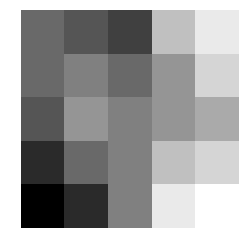

Kernel at coords 211,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     1.     0.   254. ]
 [ 126.5  127.5    0.5    1.     0. ]
 [ 126.   125.5    0.     2.     2. ]
 [   0.   126.5  127.5    0.5    1. ]
 [   2.     0.   255.   255.     0. ]]/[[ 1.   0.   0.5  2.5  3. ]
 [ 3.   1.   0.   1.   1. ]
 [ 3.   2.   2.   2.   1. ]
 [ 2.   3.   4.5  3.   1. ]
 [ 0.   1.5  4.   3.5  2. ]]
Angle=32.74875789728349


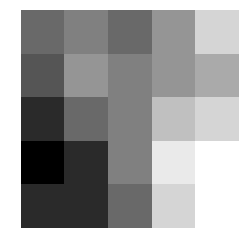

Kernel at coords 212,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.     0.     2.     2. ]
 [ 126.   125.5    0.     2.     2. ]
 [   0.   126.5  127.5    0.5    1. ]
 [   0.   127.5  127.5  127.5  127.5]
 [ 254.   255.     0.     0.   255. ]]/[[ 3.   1.   0.   1.   1. ]
 [ 3.   2.   2.   2.   1. ]
 [ 2.   3.   4.5  3.   1. ]
 [ 0.   1.5  4.   3.5  2. ]
 [ 1.   2.5  4.5  3.   1. ]]
Angle=24.90983883243494


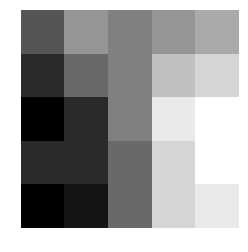

Kernel at coords 213,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   253.     0.     2.     2. ]
 [   0.   126.5  127.5    0.5    1. ]
 [   0.   127.5  127.5  127.5  127.5]
 [   0.     0.5    0.5  127.5  127. ]
 [   2.     2.     1.   255.   255. ]]/[[ 3.   2.   2.   2.   1. ]
 [ 2.   3.   4.5  3.   1. ]
 [ 0.   1.5  4.   3.5  2. ]
 [ 1.   2.5  4.5  3.   1. ]
 [ 1.   2.   3.   2.   1. ]]
Angle=31.380295289013816


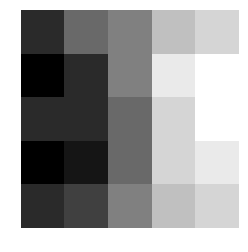

Kernel at coords 214,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     0.   255.   255.     0. ]
 [   0.   127.5  127.5  127.5  127.5]
 [   0.     0.5    0.5  127.5  127. ]
 [   2.     1.5    0.   127.   126.5]
 [   2.     1.   255.   255.   254. ]]/[[ 2.   3.   4.5  3.   1. ]
 [ 0.   1.5  4.   3.5  2. ]
 [ 1.   2.5  4.5  3.   1. ]
 [ 1.   2.   3.   2.   1. ]
 [ 0.   0.5  2.   1.5  0. ]]
Angle=27.367110353353265


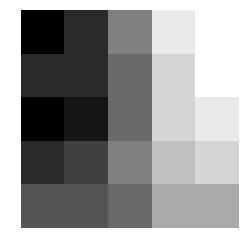

Kernel at coords 215,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.     0.     0.   255. ]
 [   0.     0.5    0.5  127.5  127. ]
 [   2.     1.5    0.   127.   126.5]
 [   0.   127.   126.   126.   127. ]
 [ 254.   253.   253.   253.     0. ]]/[[   0.     1.5    4.     3.5    2. ]
 [   1.     2.5    4.5    3.     1. ]
 [   1.     2.     3.     2.     1. ]
 [   0.     0.5    2.     1.5    0. ]
 [ 255.     0.     2.     3.     3. ]]
Angle=29.76189850884402


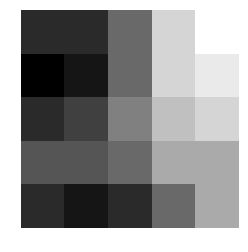

Kernel at coords 216,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     1.   255.   255. ]
 [   2.     1.5    0.   127.   126.5]
 [   0.   127.   126.   126.   127. ]
 [ 127.   126.5  127.   126.5  127.5]
 [   0.     0.     1.     0.   255. ]]/[[   1.     2.5    4.5    3.     1. ]
 [   1.     2.     3.     2.     1. ]
 [   0.     0.5    2.     1.5    0. ]
 [ 255.     0.     2.     3.     3. ]
 [ 255.     0.5    2.     2.     2. ]]
Angle=29.206413220171953


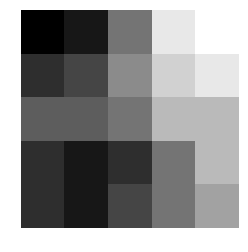

Kernel at coords 217,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.   255.   255.   254. ]
 [   0.   127.   126.   126.   127. ]
 [ 127.   126.5  127.   126.5  127.5]
 [   0.5    1.     1.5    0.   127. ]
 [   1.     2.     2.     0.   255. ]]/[[   1.     2.     3.     2.     1. ]
 [   0.     0.5    2.     1.5    0. ]
 [ 255.     0.     2.     3.     3. ]
 [ 255.     0.5    2.     2.     2. ]
 [   0.     1.     1.     0.5    1. ]]
Angle=22.565574217625326


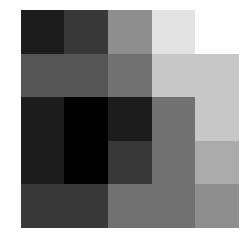

Kernel at coords 218,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   253.   253.   253.     0. ]
 [ 127.   126.5  127.   126.5  127.5]
 [   0.5    1.     1.5    0.   127. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 252.   254.     0.     1.     0. ]]/[[   0.     0.5    2.     1.5    0. ]
 [ 255.     0.     2.     3.     3. ]
 [ 255.     0.5    2.     2.     2. ]
 [   0.     1.     1.     0.5    1. ]
 [   2.     3.     2.5    0.5    0. ]]
Angle=25.066810022838855


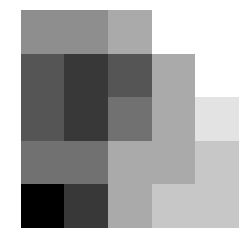

Kernel at coords 219,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     1.     0.   255. ]
 [   0.5    1.     1.5    0.   127. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 124.   127.     1.     1.5    0. ]
 [ 252.     0.     2.     2.     0. ]]/[[ 255.     0.     2.     3.     3. ]
 [ 255.     0.5    2.     2.     2. ]
 [   0.     1.     1.     0.5    1. ]
 [   2.     3.     2.5    0.5    0. ]
 [   6.     6.     3.5  127.5  254. ]]
Angle=44.18698098390752


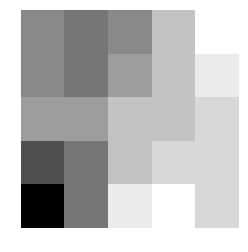

Kernel at coords 220,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     2.     2.     0.   255. ]
 [ 126.5    0.     1.     0.5  127.5]
 [ 124.   127.     1.     1.5    0. ]
 [ 125.5  127.   126.   126.5    1. ]
 [ 255.   254.   250.   251.     2. ]]/[[ 255.     0.5    2.     2.     2. ]
 [   0.     1.     1.     0.5    1. ]
 [   2.     3.     2.5    0.5    0. ]
 [   6.     6.     3.5  127.5  254. ]
 [   5.     3.5    2.     3.5    5. ]]
Angle=28.880913809666946


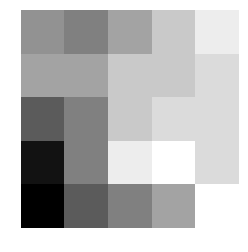

Kernel at coords 221,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   254.     0.     1.     0. ]
 [ 124.   127.     1.     1.5    0. ]
 [ 125.5  127.   126.   126.5    1. ]
 [ 120.   125.5  127.   127.     2.5]
 [ 241.   253.     4.     3.     3. ]]/[[   0.     1.     1.     0.5    1. ]
 [   2.     3.     2.5    0.5    0. ]
 [   6.     6.     3.5  127.5  254. ]
 [   5.     3.5    2.     3.5    5. ]
 [  17.    13.     5.     3.     5. ]]
Angle=26.799464362403555


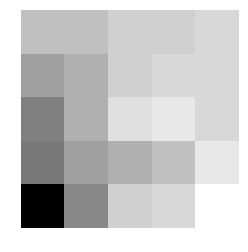

Kernel at coords 222,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     0.     2.     2.     0. ]
 [ 125.5  127.   126.   126.5    1. ]
 [ 120.   125.5  127.   127.     2.5]
 [ 115.   123.5    2.     2.5    1.5]
 [ 245.   250.     0.     2.     0. ]]/[[   2.     3.     2.5    0.5    0. ]
 [   6.     6.     3.5  127.5  254. ]
 [   5.     3.5    2.     3.5    5. ]
 [  17.    13.     5.     3.     5. ]
 [  22.    18.5    9.     3.     3. ]]
Angle=32.781939970434415


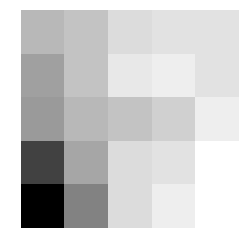

Kernel at coords 223,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   254.   250.   251.     2. ]
 [ 120.   125.5  127.   127.     2.5]
 [ 115.   123.5    2.     2.5    1.5]
 [ 123.   119.   120.5  125.5  126.5]
 [   1.   244.   241.   249.   253. ]]/[[   6.     6.     3.5  127.5  254. ]
 [   5.     3.5    2.     3.5    5. ]
 [  17.    13.     5.     3.     5. ]
 [  22.    18.5    9.     3.     3. ]
 [   9.    10.5   11.5    9.     7. ]]
Angle=20.579179251097177


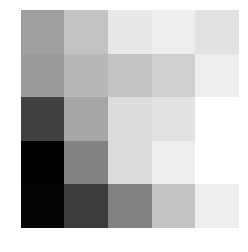

Kernel at coords 224,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 241.   253.     4.     3.     3. ]
 [ 115.   123.5    2.     2.5    1.5]
 [ 123.   119.   120.5  125.5  126.5]
 [ 125.   113.   113.5  123.5  126.5]
 [ 249.   238.   242.   254.     0. ]]/[[   5.     3.5    2.     3.5    5. ]
 [  17.    13.     5.     3.     5. ]
 [  22.    18.5    9.     3.     3. ]
 [   9.    10.5   11.5    9.     7. ]
 [ 254.     7.    19.5   16.     9. ]]
Angle=21.48331046597856


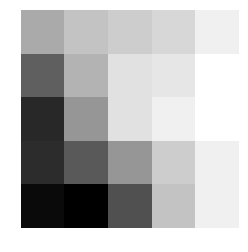

Kernel at coords 225,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 245.   250.     0.     2.     0. ]
 [ 123.   119.   120.5  125.5  126.5]
 [ 125.   113.   113.5  123.5  126.5]
 [ 120.   113.5  115.5  123.   125. ]
 [ 247.   245.   245.   248.   250. ]]/[[  17.    13.     5.     3.     5. ]
 [  22.    18.5    9.     3.     3. ]
 [   9.    10.5   11.5    9.     7. ]
 [ 254.     7.    19.5   16.     9. ]
 [ 252.     6.    21.    18.5   11. ]]
Angle=17.59183371848426


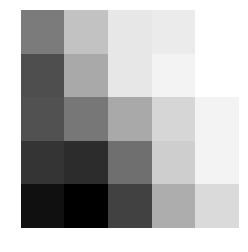

Kernel at coords 226,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   244.   241.   249.   253. ]
 [ 125.   113.   113.5  123.5  126.5]
 [ 120.   113.5  115.5  123.   125. ]
 [ 126.5  122.   116.   114.   119. ]
 [   6.   255.   243.   236.   244. ]]/[[  22.    18.5    9.     3.     3. ]
 [   9.    10.5   11.5    9.     7. ]
 [ 254.     7.    19.5   16.     9. ]
 [ 252.     6.    21.    18.5   11. ]
 [ 245.   124.5   11.5   19.    19. ]]
Angle=16.977937944667826


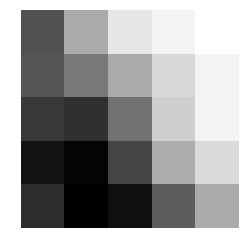

Kernel at coords 227,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 249.   238.   242.   254.     0. ]
 [ 120.   113.5  115.5  123.   125. ]
 [ 126.5  122.   116.   114.   119. ]
 [  20.     7.   119.5  107.   111.5]
 [  34.    15.   252.   234.   235. ]]/[[   9.    10.5   11.5    9.     7. ]
 [ 254.     7.    19.5   16.     9. ]
 [ 252.     6.    21.    18.5   11. ]
 [ 245.   124.5   11.5   19.    19. ]
 [ 226.   105.5  121.    10.5   20. ]]
Angle=26.936238269605923


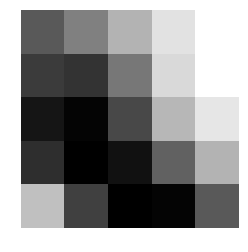

Kernel at coords 228,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 247.   245.   245.   248.   250. ]
 [ 126.5  122.   116.   114.   119. ]
 [  20.     7.   119.5  107.   111.5]
 [  20.5   14.5    5.5  116.5  107.5]
 [   7.    14.    15.   255.   236. ]]/[[ 254.     7.    19.5   16.     9. ]
 [ 252.     6.    21.    18.5   11. ]
 [ 245.   124.5   11.5   19.    19. ]
 [ 226.   105.5  121.    10.5   20. ]
 [ 233.   109.5  113.5  121.     1. ]]
Angle=35.80730385502568


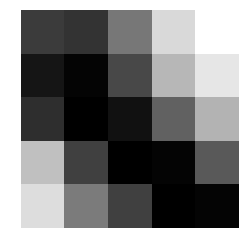

Kernel at coords 229,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   6.   255.   243.   236.   244. ]
 [  20.     7.   119.5  107.   111.5]
 [  20.5   14.5    5.5  116.5  107.5]
 [   5.5   16.    13.     0.   117. ]
 [   4.    18.    11.     1.   254. ]]/[[ 252.     6.    21.    18.5   11. ]
 [ 245.   124.5   11.5   19.    19. ]
 [ 226.   105.5  121.    10.5   20. ]
 [ 233.   109.5  113.5  121.     1. ]
 [ 247.   113.   105.   114.5  254. ]]
Angle=52.08987882476108


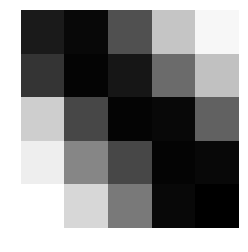

Kernel at coords 230,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[  34.    15.   252.   234.   235. ]
 [  20.5   14.5    5.5  116.5  107.5]
 [   5.5   16.    13.     0.   117. ]
 [   2.5   14.5   11.5    7.     3.5]
 [   1.    11.    12.    13.     9. ]]/[[ 245.   124.5   11.5   19.    19. ]
 [ 226.   105.5  121.    10.5   20. ]
 [ 233.   109.5  113.5  121.     1. ]
 [ 247.   113.   105.   114.5  254. ]
 [   1.   118.5  106.   113.   250. ]]
Angle=64.3063109421181


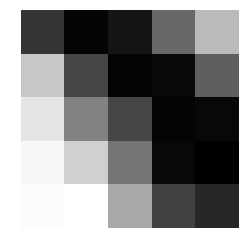

Kernel at coords 231,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   7.    14.    15.   255.   236. ]
 [   5.5   16.    13.     0.   117. ]
 [   2.5   14.5   11.5    7.     3.5]
 [   2.     6.5   14.    17.     6. ]
 [   3.     2.    16.    21.     3. ]]/[[ 226.   105.5  121.    10.5   20. ]
 [ 233.   109.5  113.5  121.     1. ]
 [ 247.   113.   105.   114.5  254. ]
 [   1.   118.5  106.   113.   250. ]
 [   0.   125.   115.5  106.5  232. ]]
Angle=69.6773655650678


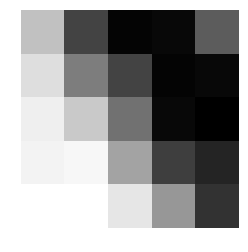

Kernel at coords 232,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]

--------------------------------------------------
gradients: [[   4.    18.    11.     1.   254. ]
 [   2.5   14.5   11.5    7.     3.5]
 [   2.     6.5   14.    17.     6. ]
 [   1.5  126.5   10.5   18.5    7.5]
 [   0.   251.     5.    16.    12. ]]/[[ 233.   109.5  113.5  121.     1. ]
 [ 247.   113.   105.   114.5  254. ]
 [   1.   118.5  106.   113.   250. ]
 [   0.   125.   115.5  106.5  232. ]
 [ 251.   127.5  126.   110.   228. ]]
Angle=72.50258461178501


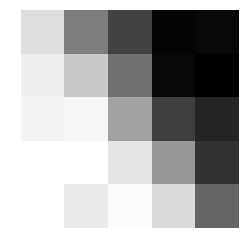

Kernel at coords 233,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]

--------------------------------------------------
gradients: [[   1.    11.    12.    13.     9. ]
 [   2.     6.5   14.    17.     6. ]
 [   1.5  126.5   10.5   18.5    7.5]
 [ 126.   125.5    0.5   11.    16. ]
 [ 252.     0.   252.     6.    20. ]]/[[ 247.   113.   105.   114.5  254. ]
 [   1.   118.5  106.   113.   250. ]
 [   0.   125.   115.5  106.5  232. ]
 [ 251.   127.5  126.   110.   228. ]
 [ 255.   127.5    1.   122.   242. ]]
Angle=70.79125504509462


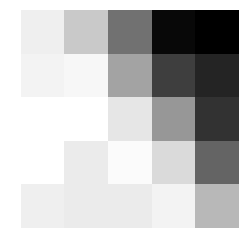

Kernel at coords 234,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]

--------------------------------------------------
gradients: [[   3.     2.    16.    21.     3. ]
 [   1.5  126.5   10.5   18.5    7.5]
 [ 126.   125.5    0.5   11.    16. ]
 [ 125.     2.5  127.     2.5   14.5]
 [ 254.     5.     2.   255.     9. ]]/[[   1.   118.5  106.   113.   250. ]
 [   0.   125.   115.5  106.5  232. ]
 [ 251.   127.5  126.   110.   228. ]
 [ 255.   127.5    1.   122.   242. ]
 [   6.     1.5  126.   125.5  252. ]]
Angle=62.967382397582504


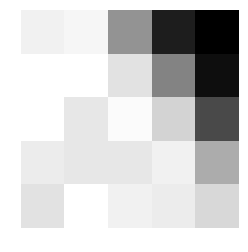

Kernel at coords 235,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   251.     5.    16.    12. ]
 [ 126.   125.5    0.5   11.    16. ]
 [ 125.     2.5  127.     2.5   14.5]
 [   1.     0.     0.5    1.     4.5]
 [   4.   251.   255.     3.     0. ]]/[[   0.   125.   115.5  106.5  232. ]
 [ 251.   127.5  126.   110.   228. ]
 [ 255.   127.5    1.   122.   242. ]
 [   6.     1.5  126.   125.5  252. ]
 [ 253.   127.     2.   126.   249. ]]
Angle=68.55177362041118


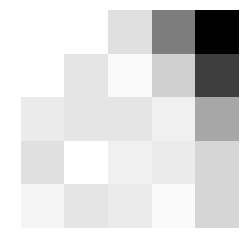

Kernel at coords 236,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  0.  1.  0.  0.]

--------------------------------------------------
gradients: [[ 252.     0.   252.     6.    20. ]
 [ 125.     2.5  127.     2.5   14.5]
 [   1.     0.     0.5    1.     4.5]
 [   2.   127.     0.5    1.5    0.5]
 [   0.     3.     2.     0.     1. ]]/[[ 251.   127.5  126.   110.   228. ]
 [ 255.   127.5    1.   122.   242. ]
 [   6.     1.5  126.   125.5  252. ]
 [ 253.   127.     2.   126.   249. ]
 [   0.     0.     0.5  125.5  250. ]]
Angle=67.37114076680989


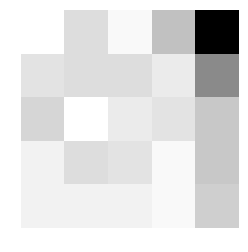

Kernel at coords 237,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     5.     2.   255.     9. ]
 [   1.     0.     0.5    1.     4.5]
 [   2.   127.     0.5    1.5    0.5]
 [ 127.     1.     0.5  126.5    0.5]
 [ 254.   255.   255.   253.     0. ]]/[[ 255.   127.5    1.   122.   242. ]
 [   6.     1.5  126.   125.5  252. ]
 [ 253.   127.     2.   126.   249. ]
 [   0.     0.     0.5  125.5  250. ]
 [   1.     0.5  127.5  126.   253. ]]
Angle=56.977992813506525


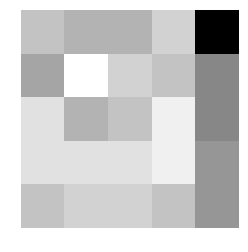

Kernel at coords 238,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.   251.   255.     3.     0. ]
 [   2.   127.     0.5    1.5    0.5]
 [ 127.     1.     0.5  126.5    0.5]
 [ 127.   127.5  127.5  127.     1.5]
 [   0.     0.     0.     1.     3. ]]/[[   6.     1.5  126.   125.5  252. ]
 [ 253.   127.     2.   126.   249. ]
 [   0.     0.     0.5  125.5  250. ]
 [   1.     0.5  127.5  126.   253. ]
 [   1.     0.5    0.   127.5  255. ]]
Angle=54.79743177103089


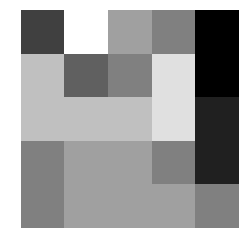

Kernel at coords 239,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     3.     2.     0.     1. ]
 [ 127.     1.     0.5  126.5    0.5]
 [ 127.   127.5  127.5  127.     1.5]
 [   0.5  127.5  127.5    1.     2.5]
 [   1.   255.   255.     1.     2. ]]/[[ 253.   127.     2.   126.   249. ]
 [   0.     0.     0.5  125.5  250. ]
 [   1.     0.5  127.5  126.   253. ]
 [   1.     0.5    0.   127.5  255. ]
 [ 255.   127.5    1.     1.     0. ]]
Angle=46.69592131156011


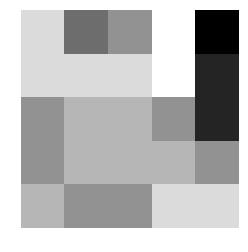

Kernel at coords 240,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   255.   255.   253.     0. ]
 [ 127.   127.5  127.5  127.     1.5]
 [   0.5  127.5  127.5    1.     2.5]
 [   0.5  127.5  127.     0.5    0.5]
 [   0.     0.   255.     0.   255. ]]/[[   0.     0.     0.5  125.5  250. ]
 [   1.     0.5  127.5  126.   253. ]
 [   1.     0.5    0.   127.5  255. ]
 [ 255.   127.5    1.     1.     0. ]
 [ 255.   127.     1.     1.   255. ]]
Angle=42.1301039317438


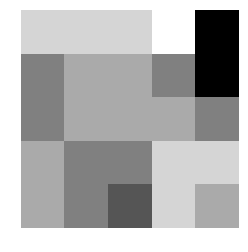

Kernel at coords 241,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     0.     1.     3. ]
 [   0.5  127.5  127.5    1.     2.5]
 [   0.5  127.5  127.     0.5    0.5]
 [   1.     2.     1.5    1.     0.5]
 [   2.     4.     4.     2.     2. ]]/[[   1.     0.5  127.5  126.   253. ]
 [   1.     0.5    0.   127.5  255. ]
 [ 255.   127.5    1.     1.     0. ]
 [ 255.   127.     1.     1.   255. ]
 [   1.     0.     0.     0.   255. ]]
Angle=54.154188673741835


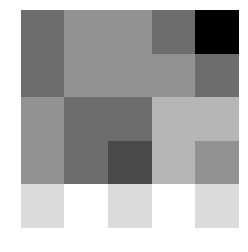

Kernel at coords 242,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   255.     1.     2. ]
 [   0.5  127.5  127.     0.5    0.5]
 [   1.     2.     1.5    1.     0.5]
 [   0.     2.5    2.5    0.5    0.5]
 [ 254.     1.     1.   255.   255. ]]/[[   1.     0.5    0.   127.5  255. ]
 [ 255.   127.5    1.     1.     0. ]
 [ 255.   127.     1.     1.   255. ]
 [   1.     0.     0.     0.   255. ]
 [   4.     1.5  127.   127.   255. ]]
Angle=46.74247750698826


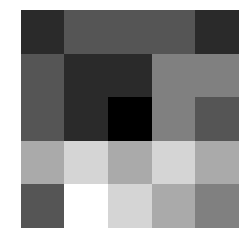

Kernel at coords 243,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.   255.     0.   255. ]
 [   1.     2.     1.5    1.     0.5]
 [   0.     2.5    2.5    0.5    0.5]
 [   0.   127.5  127.   126.5  127.5]
 [   2.   254.   253.   254.     0. ]]/[[ 255.   127.5    1.     1.     0. ]
 [ 255.   127.     1.     1.   255. ]
 [   1.     0.     0.     0.   255. ]
 [   4.     1.5  127.   127.   255. ]
 [   0.   127.   127.     0.5    1. ]]
Angle=47.40474224330729


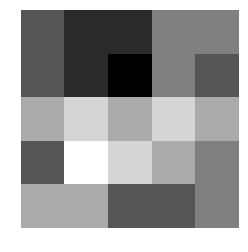

Kernel at coords 244,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     4.     4.     2.     2. ]
 [   0.     2.5    2.5    0.5    0.5]
 [   0.   127.5  127.   126.5  127.5]
 [ 127.   126.   127.5    0.5    1. ]
 [ 252.   254.     2.     3.     2. ]]/[[ 255.   127.     1.     1.   255. ]
 [   1.     0.     0.     0.   255. ]
 [   4.     1.5  127.   127.   255. ]
 [   0.   127.   127.     0.5    1. ]
 [   2.     2.     1.5    0.5    0. ]]
Angle=38.37440749953716


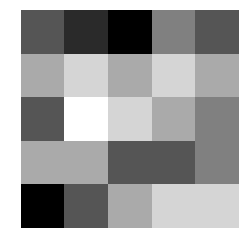

Kernel at coords 245,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     1.     1.   255.   255. ]
 [   0.   127.5  127.   126.5  127.5]
 [ 127.   126.   127.5    0.5    1. ]
 [ 127.   127.5    0.5    0.   127. ]
 [   2.     1.   255.   253.   252. ]]/[[   1.     0.     0.     0.   255. ]
 [   4.     1.5  127.   127.   255. ]
 [   0.   127.   127.     0.5    1. ]
 [   2.     2.     1.5    0.5    0. ]
 [   1.     0.5  127.5  127.   255. ]]
Angle=31.384686658497994


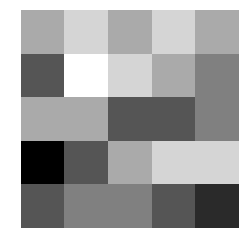

Kernel at coords 246,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.   254.   253.   254.     0. ]
 [ 127.   126.   127.5    0.5    1. ]
 [ 127.   127.5    0.5    0.   127. ]
 [   1.5    0.5  127.5  127.   126.5]
 [   1.     0.     0.     1.     1. ]]/[[   4.     1.5  127.   127.   255. ]
 [   0.   127.   127.     0.5    1. ]
 [   2.     2.     1.5    0.5    0. ]
 [   1.     0.5  127.5  127.   255. ]
 [   0.     0.     0.   127.5  255. ]]
Angle=38.48419079217049


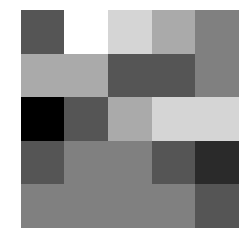

Kernel at coords 247,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   254.     2.     3.     2. ]
 [ 127.   127.5    0.5    0.   127. ]
 [   1.5    0.5  127.5  127.   126.5]
 [   1.   127.5  127.5    0.     0.5]
 [   1.   255.   255.   255.     0. ]]/[[   0.   127.   127.     0.5    1. ]
 [   2.     2.     1.5    0.5    0. ]
 [   1.     0.5  127.5  127.   255. ]
 [   0.     0.     0.   127.5  255. ]
 [ 254.   127.     0.     0.     0. ]]
Angle=33.73993586674123


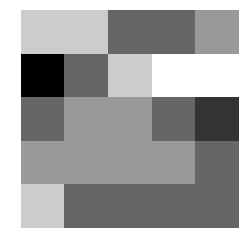

Kernel at coords 248,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.   255.   253.   252. ]
 [   1.5    0.5  127.5  127.   126.5]
 [   1.   127.5  127.5    0.     0.5]
 [   0.5  127.   127.   127.   127.5]
 [   0.   255.   255.   255.   255. ]]/[[   2.     2.     1.5    0.5    0. ]
 [   1.     0.5  127.5  127.   255. ]
 [   0.     0.     0.   127.5  255. ]
 [ 254.   127.     0.     0.     0. ]
 [ 253.   126.5    0.     0.     0. ]]
Angle=30.8940059093432


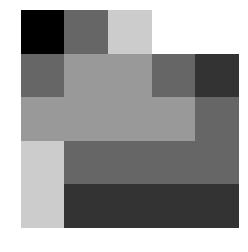

Kernel at coords 249,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     0.     1.     1. ]
 [   1.   127.5  127.5    0.     0.5]
 [   0.5  127.   127.   127.   127.5]
 [ 125.5  126.5    1.     2.     1. ]
 [ 251.   254.     3.     5.     3. ]]/[[   1.     0.5  127.5  127.   255. ]
 [   0.     0.     0.   127.5  255. ]
 [ 254.   127.     0.     0.     0. ]
 [ 253.   126.5    0.     0.     0. ]
 [   0.     2.5    3.5    0.   254. ]]
Angle=38.680055244273134


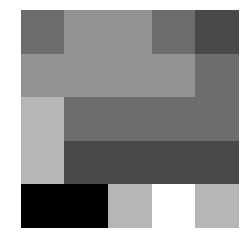

Kernel at coords 250,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   255.   255.     0. ]
 [   0.5  127.   127.   127.   127.5]
 [ 125.5  126.5    1.     2.     1. ]
 [ 126.5    0.     1.5    2.     0.5]
 [   2.     2.     0.   255.   254. ]]/[[   0.     0.     0.   127.5  255. ]
 [ 254.   127.     0.     0.     0. ]
 [ 253.   126.5    0.     0.     0. ]
 [   0.     2.5    3.5    0.   254. ]
 [   0.     1.5    2.   127.   253. ]]
Angle=32.19957151564457


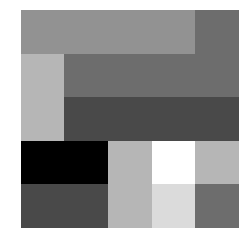

Kernel at coords 251,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   255.   255.   255.   255. ]
 [ 125.5  126.5    1.     2.     1. ]
 [ 126.5    0.     1.5    2.     0.5]
 [   0.5    1.   127.5  126.   125.5]
 [ 255.     0.   255.   253.   253. ]]/[[ 254.   127.     0.     0.     0. ]
 [ 253.   126.5    0.     0.     0. ]
 [   0.     2.5    3.5    0.   254. ]
 [   0.     1.5    2.   127.   253. ]
 [   1.     1.5    0.5  126.   253. ]]
Angle=31.985721969061714


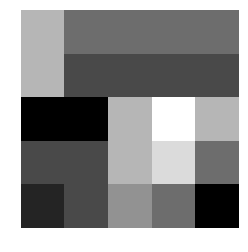

Kernel at coords 252,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 251.   254.     3.     5.     3. ]
 [ 126.5    0.     1.5    2.     0.5]
 [   0.5    1.   127.5  126.   125.5]
 [ 123.5  124.   122.5  122.   124. ]
 [ 248.   248.   246.   247.   251. ]]/[[ 253.   126.5    0.     0.     0. ]
 [   0.     2.5    3.5    0.   254. ]
 [   0.     1.5    2.   127.   253. ]
 [   1.     1.5    0.5  126.   253. ]
 [   1.     0.5    0.     0.5    1. ]]
Angle=23.85350310287242


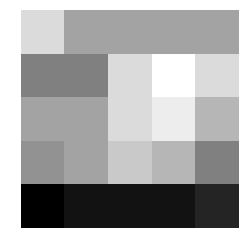

Kernel at coords 253,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     2.     0.   255.   254. ]
 [   0.5    1.   127.5  126.   125.5]
 [ 123.5  124.   122.5  122.   124. ]
 [ 117.5  117.5  115.5  116.   119.5]
 [ 243.   243.   241.   241.   244. ]]/[[   0.     2.5    3.5    0.   254. ]
 [   0.     1.5    2.   127.   253. ]
 [   1.     1.5    0.5  126.   253. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.   127.5  127.     2.     4. ]]
Angle=20.88712222874365


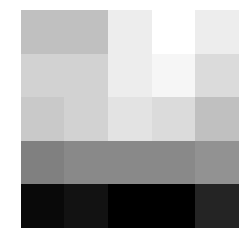

Kernel at coords 254,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.   255.   253.   253. ]
 [ 123.5  124.   122.5  122.   124. ]
 [ 117.5  117.5  115.5  116.   119.5]
 [ 119.5  120.   118.   117.   118.5]
 [ 252.   253.   251.   249.   249. ]]/[[   0.     1.5    2.   127.   253. ]
 [   1.     1.5    0.5  126.   253. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.   127.5  127.     2.     4. ]
 [   2.   127.   125.     1.     4. ]]
Angle=17.069331725789446


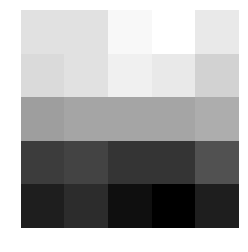

Kernel at coords 255,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 248.   248.   246.   247.   251. ]
 [ 117.5  117.5  115.5  116.   119.5]
 [ 119.5  120.   118.   117.   118.5]
 [ 126.   127.   126.   124.   123.5]
 [   0.     1.     1.   255.   254. ]]/[[   1.     1.5    0.5  126.   253. ]
 [   1.     0.5    0.     0.5    1. ]
 [   1.   127.5  127.     2.     4. ]
 [   2.   127.   125.     1.     4. ]
 [   3.   127.5  124.   127.5    3. ]]
Angle=22.438658937216257


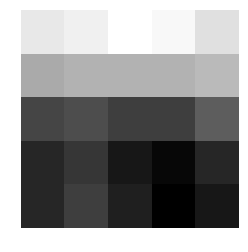

Kernel at coords 256,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 243.   243.   241.   241.   244. ]
 [ 119.5  120.   118.   117.   118.5]
 [ 126.   127.   126.   124.   123.5]
 [ 127.5  127.5    0.5    0.   126.5]
 [ 255.   254.     0.     1.   255. ]]/[[   1.     0.5    0.     0.5    1. ]
 [   1.   127.5  127.     2.     4. ]
 [   2.   127.   125.     1.     4. ]
 [   3.   127.5  124.   127.5    3. ]
 [   2.     0.   125.5  127.     1. ]]
Angle=23.945420080389848


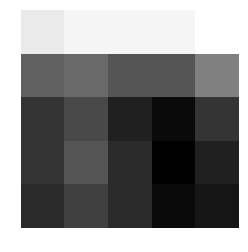

Kernel at coords 257,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.   253.   251.   249.   249. ]
 [ 126.   127.   126.   124.   123.5]
 [ 127.5  127.5    0.5    0.   126.5]
 [   0.   126.5    0.5    2.     1. ]
 [   1.   255.     1.     3.     3. ]]/[[   1.   127.5  127.     2.     4. ]
 [   2.   127.   125.     1.     4. ]
 [   3.   127.5  124.   127.5    3. ]
 [   2.     0.   125.5  127.     1. ]
 [   0.     0.   127.5    0.     1. ]]
Angle=31.90083547008611


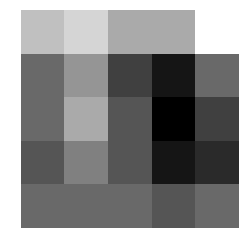

Kernel at coords 258,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     1.   255.   254. ]
 [ 127.5  127.5    0.5    0.   126.5]
 [   0.   126.5    0.5    2.     1. ]
 [   1.   127.     0.     2.5    2.5]
 [   1.   255.   255.     2.     2. ]]/[[   2.   127.   125.     1.     4. ]
 [   3.   127.5  124.   127.5    3. ]
 [   2.     0.   125.5  127.     1. ]
 [   0.     0.   127.5    0.     1. ]
 [ 254.   127.     1.     1.5    1. ]]
Angle=44.130915949504335


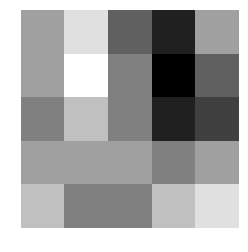

Kernel at coords 259,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   254.     0.     1.   255. ]
 [   0.   126.5    0.5    2.     1. ]
 [   1.   127.     0.     2.5    2.5]
 [ 127.5    1.     0.     1.5    2.5]
 [ 254.     3.     1.     1.     3. ]]/[[   3.   127.5  124.   127.5    3. ]
 [   2.     0.   125.5  127.     1. ]
 [   0.     0.   127.5    0.     1. ]
 [ 254.   127.     1.     1.5    1. ]
 [   3.     0.5    0.     2.5    3. ]]
Angle=42.650299913737875


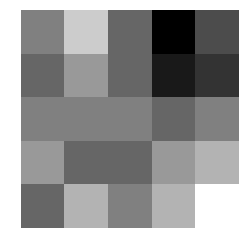

Kernel at coords 260,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.     1.     3.     3. ]
 [   1.   127.     0.     2.5    2.5]
 [ 127.5    1.     0.     1.5    2.5]
 [ 126.5    0.5  127.   126.   125.5]
 [ 255.   254.   253.   251.   248. ]]/[[   2.     0.   125.5  127.     1. ]
 [   0.     0.   127.5    0.     1. ]
 [ 254.   127.     1.     1.5    1. ]
 [   3.     0.5    0.     2.5    3. ]
 [   2.   127.5  126.5    0.     0. ]]
Angle=31.363633847449353


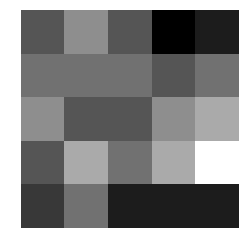

Kernel at coords 261,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   255.     2.     2. ]
 [ 127.5    1.     0.     1.5    2.5]
 [ 126.5    0.5  127.   126.   125.5]
 [   0.5  127.5    0.   127.5  125.5]
 [   2.     1.     3.     4.     3. ]]/[[   0.     0.   127.5    0.     1. ]
 [ 254.   127.     1.     1.5    1. ]
 [   3.     0.5    0.     2.5    3. ]
 [   2.   127.5  126.5    0.     0. ]
 [   1.     0.     0.     0.   255. ]]
Angle=29.54178017103055


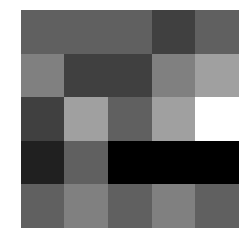

Kernel at coords 262,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     3.     1.     1.     3. ]
 [ 126.5    0.5  127.   126.   125.5]
 [   0.5  127.5    0.   127.5  125.5]
 [   1.   127.5    0.5    2.     2. ]
 [   0.   254.   254.     0.     1. ]]/[[ 254.   127.     1.     1.5    1. ]
 [   3.     0.5    0.     2.5    3. ]
 [   2.   127.5  126.5    0.     0. ]
 [   1.     0.     0.     0.   255. ]
 [ 255.   127.     1.     1.5    0. ]]
Angle=34.18245080919226


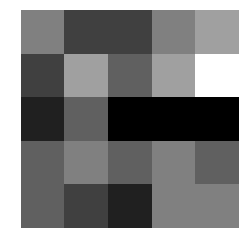

Kernel at coords 263,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   254.   253.   251.   248. ]
 [   0.5  127.5    0.   127.5  125.5]
 [   1.   127.5    0.5    2.     2. ]
 [   0.5  126.5  126.   126.5  127. ]
 [   1.   255.   254.   253.   253. ]]/[[   3.     0.5    0.     2.5    3. ]
 [   2.   127.5  126.5    0.     0. ]
 [   1.     0.     0.     0.   255. ]
 [ 255.   127.     1.     1.5    0. ]
 [ 253.   125.5    0.     1.     0. ]]
Angle=23.996163892553895


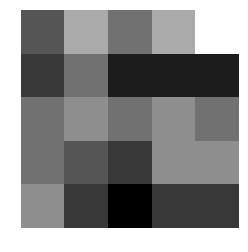

Kernel at coords 264,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.     3.     4.     3. ]
 [   1.   127.5    0.5    2.     2. ]
 [   0.5  126.5  126.   126.5  127. ]
 [ 127.5    0.     0.   127.5  126.5]
 [ 254.     1.     2.     2.     0. ]]/[[   2.   127.5  126.5    0.     0. ]
 [   1.     0.     0.     0.   255. ]
 [ 255.   127.     1.     1.5    0. ]
 [ 253.   125.5    0.     1.     0. ]
 [   0.   127.5    0.5    0.   254. ]]
Angle=33.64671109573547


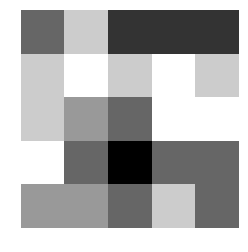

Kernel at coords 265,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   254.   254.     0.     1. ]
 [   0.5  126.5  126.   126.5  127. ]
 [ 127.5    0.     0.   127.5  126.5]
 [ 125.5    0.     0.5    1.     0. ]
 [ 253.   255.   255.     0.     0. ]]/[[   1.     0.     0.     0.   255. ]
 [ 255.   127.     1.     1.5    0. ]
 [ 253.   125.5    0.     1.     0. ]
 [   0.   127.5    0.5    0.   254. ]
 [   2.     0.5    1.     0.5  254. ]]
Angle=35.016137878413666


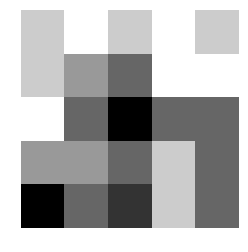

Kernel at coords 266,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   254.   253.   253. ]
 [ 127.5    0.     0.   127.5  126.5]
 [ 125.5    0.     0.5    1.     0. ]
 [ 127.5    0.   127.   127.     0. ]
 [   2.     1.   255.   254.     0. ]]/[[ 255.   127.     1.     1.5    0. ]
 [ 253.   125.5    0.     1.     0. ]
 [   0.   127.5    0.5    0.   254. ]
 [   2.     0.5    1.     0.5  254. ]
 [   1.   127.   127.5    1.     0. ]]
Angle=32.799961913100105


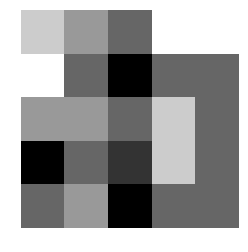

Kernel at coords 267,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.     1.     2.     2.     0. ]
 [ 125.5    0.     0.5    1.     0. ]
 [ 127.5    0.   127.   127.     0. ]
 [   1.5  125.5    1.     0.5  124. ]
 [   1.   250.     3.     3.   248. ]]/[[ 253.   125.5    0.     1.     0. ]
 [   0.   127.5    0.5    0.   254. ]
 [   2.     0.5    1.     0.5  254. ]
 [   1.   127.   127.5    1.     0. ]
 [ 250.     0.     4.   123.5  245. ]]
Angle=43.029906501341074


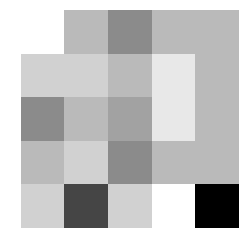

Kernel at coords 268,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   255.   255.     0.     0. ]
 [ 127.5    0.   127.   127.     0. ]
 [   1.5  125.5    1.     0.5  124. ]
 [   1.   127.     2.     1.5  126.5]
 [   1.     4.     1.     0.     5. ]]/[[   0.   127.5    0.5    0.   254. ]
 [   2.     0.5    1.     0.5  254. ]
 [   1.   127.   127.5    1.     0. ]
 [ 250.     0.     4.   123.5  245. ]
 [ 253.     0.     2.   125.5  250. ]]
Angle=46.70131680505452


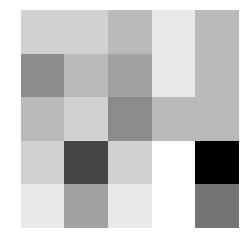

Kernel at coords 269,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   2.     1.   255.   254.     0. ]
 [   1.5  125.5    1.     0.5  124. ]
 [   1.   127.     2.     1.5  126.5]
 [   0.5    4.     1.   127.5    4.5]
 [   0.     4.     1.   255.     4. ]]/[[   2.     0.5    1.     0.5  254. ]
 [   1.   127.   127.5    1.     0. ]
 [ 250.     0.     4.   123.5  245. ]
 [ 253.     0.     2.   125.5  250. ]
 [   1.     0.5  127.5  127.   255. ]]
Angle=51.528383367758245


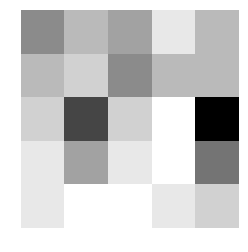

Kernel at coords 270,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   250.     3.     3.   248. ]
 [   1.   127.     2.     1.5  126.5]
 [   0.5    4.     1.   127.5    4.5]
 [   0.     2.   127.5  127.     2. ]
 [   0.     0.   254.   255.     0. ]]/[[   1.   127.   127.5    1.     0. ]
 [ 250.     0.     4.   123.5  245. ]
 [ 253.     0.     2.   125.5  250. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.   127.5  127.     0.     0. ]]
Angle=50.44834128686398


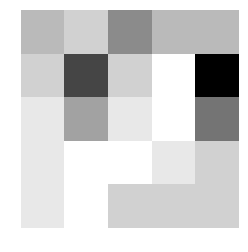

Kernel at coords 271,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     4.     1.     0.     5. ]
 [   0.5    4.     1.   127.5    4.5]
 [   0.     2.   127.5  127.     2. ]
 [   0.   127.   126.5  127.   127. ]
 [   0.   254.   255.   255.   254. ]]/[[ 250.     0.     4.   123.5  245. ]
 [ 253.     0.     2.   125.5  250. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 255.   127.   127.5  127.5  255. ]]
Angle=52.40092738078648


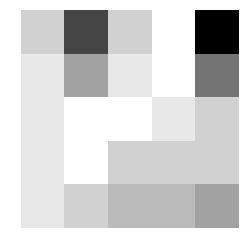

Kernel at coords 272,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     4.     1.   255.     4. ]
 [   0.     2.   127.5  127.     2. ]
 [   0.   127.   126.5  127.   127. ]
 [   0.5  126.   127.5  127.5  126. ]
 [   1.   254.     0.     0.   254. ]]/[[ 253.     0.     2.   125.5  250. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 255.   127.   127.5  127.5  255. ]
 [ 252.   126.5    0.5  126.5  253. ]]
Angle=54.499554910175085


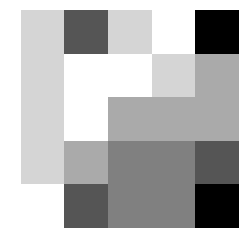

Kernel at coords 273,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.   254.   255.     0. ]
 [   0.   127.   126.5  127.   127. ]
 [   0.5  126.   127.5  127.5  126. ]
 [   0.   127.5    0.     0.   126.5]
 [ 255.     1.     0.     0.   255. ]]/[[   1.     0.5  127.5  127.   255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 255.   127.   127.5  127.5  255. ]
 [ 252.   126.5    0.5  126.5  253. ]
 [ 254.   127.     0.   126.   252. ]]
Angle=57.579274675222344


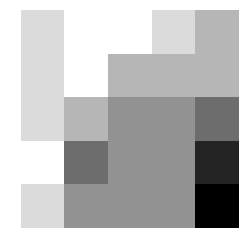

Kernel at coords 274,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   254.   255.   255.   254. ]
 [   0.5  126.   127.5  127.5  126. ]
 [   0.   127.5    0.     0.   126.5]
 [ 127.     1.     0.5  127.5  127.5]
 [ 255.     1.     1.   255.     0. ]]/[[   1.   127.5  127.     0.     0. ]
 [ 255.   127.   127.5  127.5  255. ]
 [ 252.   126.5    0.5  126.5  253. ]
 [ 254.   127.     0.   126.   252. ]
 [   0.     0.   127.   125.5  253. ]]
Angle=51.06879405510937


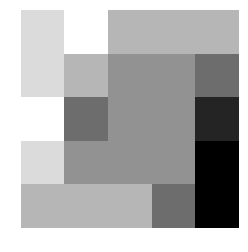

Kernel at coords 275,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   254.     0.     0.   254. ]
 [   0.   127.5    0.     0.   126.5]
 [ 127.     1.     0.5  127.5  127.5]
 [   0.     0.   127.5    0.     1.5]
 [   1.   255.   254.     1.     3. ]]/[[ 255.   127.   127.5  127.5  255. ]
 [ 252.   126.5    0.5  126.5  253. ]
 [ 254.   127.     0.   126.   252. ]
 [   0.     0.   127.   125.5  253. ]
 [ 254.   126.5    0.     0.   255. ]]
Angle=56.42012003240208


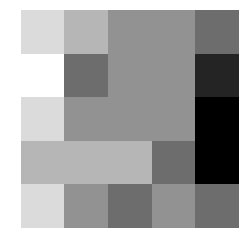

Kernel at coords 276,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     0.     0.   255. ]
 [ 127.     1.     0.5  127.5  127.5]
 [   0.     0.   127.5    0.     1.5]
 [ 127.   126.5  126.5    0.     1. ]
 [ 253.   254.   255.   255.   255. ]]/[[ 252.   126.5    0.5  126.5  253. ]
 [ 254.   127.     0.   126.   252. ]
 [   0.     0.   127.   125.5  253. ]
 [ 254.   126.5    0.     0.   255. ]
 [ 255.   127.5    0.5    0.   255. ]]
Angle=46.381646287541805


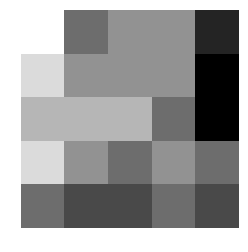

Kernel at coords 277,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     1.     1.   255.     0. ]
 [   0.     0.   127.5    0.     1.5]
 [ 127.   126.5  126.5    0.     1. ]
 [ 126.5  127.5    0.   127.   127.5]
 [   0.     1.     1.   255.     0. ]]/[[ 254.   127.     0.   126.   252. ]
 [   0.     0.   127.   125.5  253. ]
 [ 254.   126.5    0.     0.   255. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   0.     0.   127.5  127.5    0. ]]
Angle=42.06618800112229


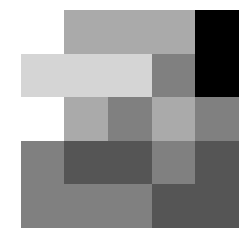

Kernel at coords 278,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.   255.   254.     1.     3. ]
 [ 127.   126.5  126.5    0.     1. ]
 [ 126.5  127.5    0.   127.   127.5]
 [   1.5    2.     2.     0.5    0.5]
 [   3.     3.     3.     2.     1. ]]/[[   0.     0.   127.   125.5  253. ]
 [ 254.   126.5    0.     0.   255. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   0.     0.   127.5  127.5    0. ]
 [   0.     0.   127.   126.5  255. ]]
Angle=44.483292359259295


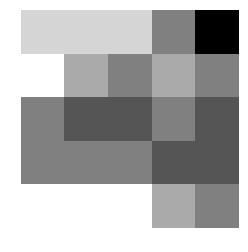

Kernel at coords 279,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   254.   255.   255.   255. ]
 [ 126.5  127.5    0.   127.   127.5]
 [   1.5    2.     2.     0.5    0.5]
 [   1.5    2.     2.     1.     0.5]
 [   0.     1.     1.     0.     0. ]]/[[ 254.   126.5    0.     0.   255. ]
 [ 255.   127.5    0.5    0.   255. ]
 [   0.     0.   127.5  127.5    0. ]
 [   0.     0.   127.   126.5  255. ]
 [   1.     0.5  126.5  126.   255. ]]
Angle=48.48635844861955


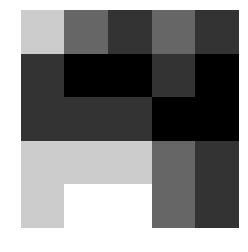

Kernel at coords 280,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     1.   255.     0. ]
 [   1.5    2.     2.     0.5    0.5]
 [   1.5    2.     2.     1.     0.5]
 [ 127.   127.5  127.5    0.     0. ]
 [ 254.   254.   254.     0.     0. ]]/[[ 255.   127.5    0.5    0.   255. ]
 [   0.     0.   127.5  127.5    0. ]
 [   0.     0.   127.   126.5  255. ]
 [   1.     0.5  126.5  126.   255. ]
 [   1.     0.5  127.5  127.   255. ]]
Angle=47.03874583398978


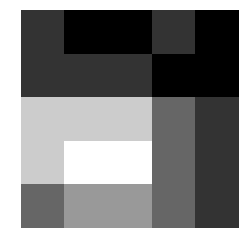

Kernel at coords 281,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     3.     3.     2.     1. ]
 [   1.5    2.     2.     1.     0.5]
 [ 127.   127.5  127.5    0.     0. ]
 [ 126.   126.   126.5    0.     0. ]
 [ 254.   254.   255.     0.     0. ]]/[[   0.     0.   127.5  127.5    0. ]
 [   0.     0.   127.   126.5  255. ]
 [   1.     0.5  126.5  126.   255. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.     1.     0.5  127.5  255. ]]
Angle=43.128293617877425


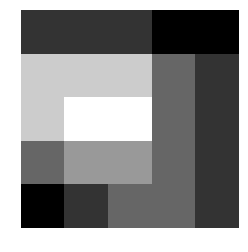

Kernel at coords 282,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     1.     1.     0.     0. ]
 [ 127.   127.5  127.5    0.     0. ]
 [ 126.   126.   126.5    0.     0. ]
 [ 127.   127.   127.5    1.     1. ]
 [   0.     0.     0.     2.     2. ]]/[[   0.     0.   127.   126.5  255. ]
 [   1.     0.5  126.5  126.   255. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.     1.     0.5  127.5  255. ]
 [   1.     1.     1.5    0.5  255. ]]
Angle=50.997862068655735


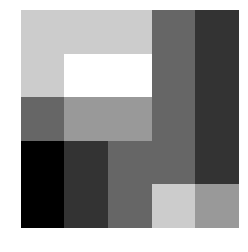

Kernel at coords 283,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   254.     0.     0. ]
 [ 126.   126.   126.5    0.     0. ]
 [ 127.   127.   127.5    1.     1. ]
 [   1.5    2.     1.     0.5    0. ]
 [   3.     4.     2.   255.   254. ]]/[[   1.     0.5  126.5  126.   255. ]
 [   1.     0.5  127.5  127.   255. ]
 [   1.     1.     0.5  127.5  255. ]
 [   1.     1.     1.5    0.5  255. ]
 [   2.     0.5  127.   126.5  254. ]]
Angle=42.64146416969586


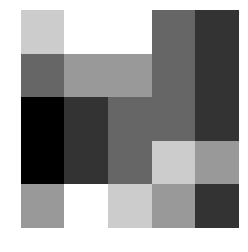

Kernel at coords 284,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 254.   254.   255.     0.     0. ]
 [ 127.   127.   127.5    1.     1. ]
 [   1.5    2.     1.     0.5    0. ]
 [   1.     2.     1.   127.5  127. ]
 [ 255.     0.     0.     0.     0. ]]/[[   1.     0.5  127.5  127.   255. ]
 [   1.     1.     0.5  127.5  255. ]
 [   1.     1.     1.5    0.5  255. ]
 [   2.     0.5  127.   126.5  254. ]
 [   3.     1.   127.   126.5  254. ]]
Angle=50.9929934514341


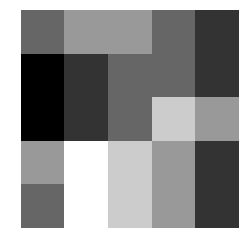

Kernel at coords 285,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.     0.     0.     2.     2. ]
 [   1.5    2.     1.     0.5    0. ]
 [   1.     2.     1.   127.5  127. ]
 [ 127.5  127.5  127.5    0.     0.5]
 [   0.   255.   255.     0.     1. ]]/[[   1.     1.     0.5  127.5  255. ]
 [   1.     1.     1.5    0.5  255. ]
 [   2.     0.5  127.   126.5  254. ]
 [   3.     1.   127.   126.5  254. ]
 [   2.     0.5  127.5  127.5  255. ]]
Angle=59.93884160375575


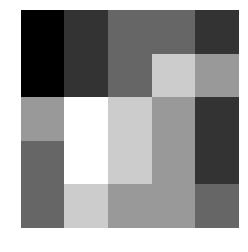

Kernel at coords 286,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   3.     4.     2.   255.   254. ]
 [   1.     2.     1.   127.5  127. ]
 [ 127.5  127.5  127.5    0.     0.5]
 [   0.5    0.   127.5  127.5    0. ]
 [   1.     1.     0.   255.   255. ]]/[[   1.     1.     1.5    0.5  255. ]
 [   2.     0.5  127.   126.5  254. ]
 [   3.     1.   127.   126.5  254. ]
 [   2.     0.5  127.5  127.5  255. ]
 [   2.     0.   126.5  127.   255. ]]
Angle=47.48964577960458


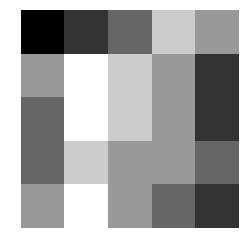

Kernel at coords 287,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     0.     0.     0. ]
 [ 127.5  127.5  127.5    0.     0.5]
 [   0.5    0.   127.5  127.5    0. ]
 [   1.     0.5  127.5  127.   127. ]
 [   1.     0.   255.   255.   255. ]]/[[   2.     0.5  127.   126.5  254. ]
 [   3.     1.   127.   126.5  254. ]
 [   2.     0.5  127.5  127.5  255. ]
 [   2.     0.   126.5  127.   255. ]
 [   1.   127.   126.   127.   255. ]]
Angle=55.29956787097505


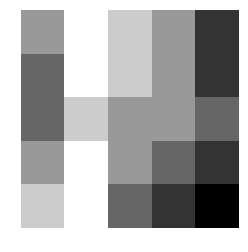

Kernel at coords 288,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   0.   255.   255.     0.     1. ]
 [   0.5    0.   127.5  127.5    0. ]
 [   1.     0.5  127.5  127.   127. ]
 [   1.     0.   127.5  127.5  127.5]
 [   1.     0.     0.     0.     0. ]]/[[   3.     1.   127.   126.5  254. ]
 [   2.     0.5  127.5  127.5  255. ]
 [   2.     0.   126.5  127.   255. ]
 [   1.   127.   126.   127.   255. ]
 [   0.   126.5  126.   127.   255. ]]
Angle=60.28622429026005


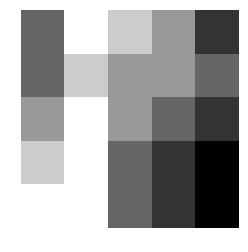

Kernel at coords 289,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     1.     0.   255.   255. ]
 [   1.     0.5  127.5  127.   127. ]
 [   1.     0.   127.5  127.5  127.5]
 [   0.     0.     0.     0.5    0.5]
 [ 255.     0.     0.     1.     1. ]]/[[   2.     0.5  127.5  127.5  255. ]
 [   2.     0.   126.5  127.   255. ]
 [   1.   127.   126.   127.   255. ]
 [   0.   126.5  126.   127.   255. ]
 [   1.   127.   126.5  127.5  255. ]]
Angle=59.0198157911656


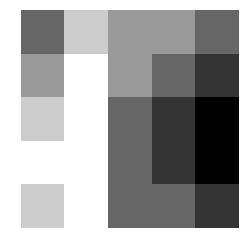

Kernel at coords 290,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.   255.   255.   255. ]
 [   1.     0.   127.5  127.5  127.5]
 [   0.     0.     0.     0.5    0.5]
 [ 127.   127.5    0.     0.5    1. ]
 [ 255.   255.     0.     0.     1. ]]/[[   2.     0.   126.5  127.   255. ]
 [   1.   127.   126.   127.   255. ]
 [   0.   126.5  126.   127.   255. ]
 [   1.   127.   126.5  127.5  255. ]
 [   1.   127.5  127.     0.     0. ]]
Angle=49.624777998811645


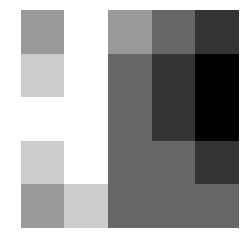

Kernel at coords 291,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   1.     0.     0.     0.     0. ]
 [   0.     0.     0.     0.5    0.5]
 [ 127.   127.5    0.     0.5    1. ]
 [   1.5  127.   127.   126.5  126.5]
 [   4.   255.   254.   253.   252. ]]/[[   1.   127.   126.   127.   255. ]
 [   0.   126.5  126.   127.   255. ]
 [   1.   127.   126.5  127.5  255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 252.   124.5  126.   127.   255. ]]
Angle=56.673867732623684


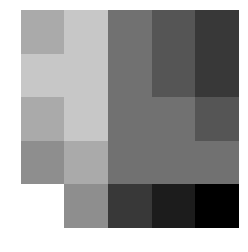

Kernel at coords 292,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.     0.     0.     1.     1. ]
 [ 127.   127.5    0.     0.5    1. ]
 [   1.5  127.   127.   126.5  126.5]
 [   1.5  126.   125.5  126.   126.5]
 [ 255.   253.   253.   255.     1. ]]/[[   0.   126.5  126.   127.   255. ]
 [   1.   127.   126.5  127.5  255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 252.   124.5  126.   127.   255. ]
 [ 250.   123.5  127.     1.     1. ]]
Angle=49.1447671383381


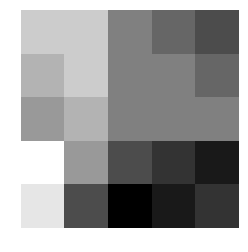

Kernel at coords 293,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   255.     0.     0.     1. ]
 [   1.5  127.   127.   126.5  126.5]
 [   1.5  126.   125.5  126.   126.5]
 [ 126.   126.   126.5    0.     1.5]
 [ 253.   255.     0.     1.     2. ]]/[[   1.   127.   126.5  127.5  255. ]
 [   1.   127.5  127.     0.     0. ]
 [ 252.   124.5  126.   127.   255. ]
 [ 250.   123.5  127.     1.     1. ]
 [ 252.   125.     0.     2.     2. ]]
Angle=46.57861023731002


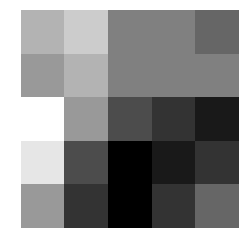

Kernel at coords 294,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[   4.   255.   254.   253.   252. ]
 [   1.5  126.   125.5  126.   126.5]
 [ 126.   126.   126.5    0.     1.5]
 [ 124.5  127.5    2.     2.     0.5]
 [ 252.     0.     4.     3.   255. ]]/[[   1.   127.5  127.     0.     0. ]
 [ 252.   124.5  126.   127.   255. ]
 [ 250.   123.5  127.     1.     1. ]
 [ 252.   125.     0.     2.     2. ]
 [   0.     1.     1.5  127.5  254. ]]
Angle=44.2047590873892


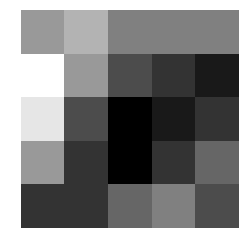

Kernel at coords 295,0 has size (5, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 255.   253.   253.   255.     1. ]
 [ 126.   126.   126.5    0.     1.5]
 [ 124.5  127.5    2.     2.     0.5]
 [ 252.     0.     4.     3.   255. ]]/[[ 252.   124.5  126.   127.   255. ]
 [ 250.   123.5  127.     1.     1. ]
 [ 252.   125.     0.     2.     2. ]
 [   0.     1.     1.5  127.5  254. ]]
Angle=48.1634375641417


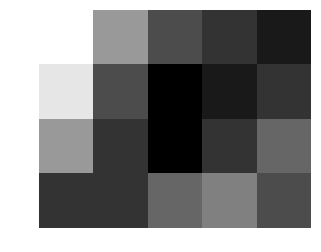

Kernel at coords 296,0 has size (4, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 253.   255.     0.     1.     2. ]
 [ 124.5  127.5    2.     2.     0.5]
 [ 252.     0.     4.     3.   255. ]]/[[ 250.   123.5  127.     1.     1. ]
 [ 252.   125.     0.     2.     2. ]
 [   0.     1.     1.5  127.5  254. ]]
Angle=47.01769283703747


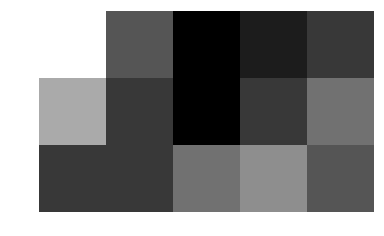

Kernel at coords 297,0 has size (3, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------
gradients: [[ 252.    0.    4.    3.  255.]
 [ 252.    0.    4.    3.  255.]]/[[ 252.   125.     0.     2.     2. ]
 [   0.     1.     1.5  127.5  254. ]]
Angle=41.323502967675125


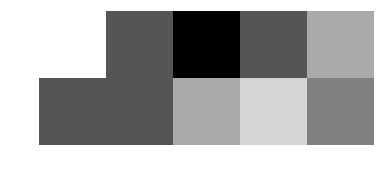

Kernel at coords 298,0 has size (2, 5) and orientation [ 0.  0.  0.  0.  1.  0.  0.  0.]

--------------------------------------------------


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [15]:
for x in range(size_x - stride):
    #for y in range(0, size_y, stride):
        print ('\n--------------------------------------------------')
        y = 0
        x_end = x + stride
        y_end = y + stride
        kernel = face[x:x_end, y:y_end]
        orientation = s1(kernel)
        plt.axis('off')
        plt.imshow(kernel, cmap="gray")
        plt.show()
        print ('Kernel at coords {},{} has size {} and orientation {}'
               .format(x, y, kernel.shape, orientation))

        